<div style="text-align: center;">
    <font size="7"><b>Preparing Salaries Data</b></font>
</div>

<div class="c">
This notebook is for preparing data for Analysis and Prediction. <br>
Classical preparation steps are taken here: <br>
    - Uniformization of terminology/ columns/ values/ units of measurement. <br>
    - Handling missing and mistyped values. <br>
    - Detecting outliers. <br>
    - Deriving new variables. <br>
    - Reporting the data quality metrics.<br>
<br>
A few words about the sources:<br>
Three main sources were used for salary data; which repeated the survey yearly.<br>
    1.) Kaggle.com, a central professional social-network for anything that is data-related. <br>
&nbsp;&nbsp;&nbsp;&nbsp The data from Kaggle is enormous, and is filled out by individualy coming from a wide variaty of tech discciplines.<br>
    2.) AI-Jobs.net, which is also centered around data-professionals, but not exclusively. This is a private recruitment & job-listing company.<br>
    3.) Germany IT-Survey, a germany-specific survey targeting tech professionals. This is quite welcome, as I'm specifically interested in germany's IT landscape.
</div>

<font size="6"><b>Table of Content:</b></font>

In [6]:
import sys
sys.path.append('../')
from scripts.tableofcontent_generator import generate_toc, generate_toc_withanchors
notebook_path = '../notebooks/Salaries_Preparation.ipynb'

In [7]:
toc_content = generate_toc(notebook_path)
print(toc_content)

     1 Import libraries & data, general settings
         1.1 Styles
         1.2 Basic standardization
         1.3 Downcasting data types for better memory usage
             1.3.1 Kaggle
             1.3.2 Germany IT survey
             1.3.3 AI-Jobs.net
     2 Comprehending the data. Uniformization.
             2.0.1 Importing the Clean_Salary function
         2.1 AI-Jobs.net
             2.1.1 Exchange rates
         2.2 Germany IT survey
             2.2.1 Year: 2018
             2.2.2 Year: 2019
             2.2.3 Year: 2020
                 2.2.3.1 Renaming the columns
                 2.2.3.2 Checking cleanliness
                 2.2.3.3 Converting to USD
             2.2.4 Year: 2021
                 2.2.4.1 checking cleanliness
             2.2.5 Year: 2022
             2.2.6 Year: 2023
         2.3 Kaggle
             2.3.1 Year: 2019
             2.3.2 Year: 2020
             2.3.3 Year: 2021
             2.3.4 Year: 2022
         2.4 Final checking uniformity
         2

# Import libraries & data, general settings

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import re
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from scipy.stats import levene, shapiro

# If the notebook is opened from the "notebooks" folder, we need to append the main directory to the "python path" so it sees all subfolders.
import sys
sys.path.append('../')

In [10]:
df_it18_ini = pd.read_csv('../data/raw/IT_Salary_Survey_EU_2018.csv', low_memory=False)
df_it19_ini = pd.read_csv('../data/raw/IT_Salary_Survey_EU_2019.csv', low_memory=False)
df_it20_ini = pd.read_csv('../data/raw/IT_Salary_Survey_EU_2020.csv', low_memory=False)
df_it21_ini = pd.read_csv('../data/raw/IT_Salary_Survey_EU_2021.csv', low_memory=False)
df_it22_ini = pd.read_csv('../data/raw/IT_Salary_Survey_EU_2022.csv', low_memory=False)
df_it23_ini = pd.read_csv('../data/raw/IT_Salary_Survey_EU_2023.csv', low_memory=False)

df_k19_ini = pd.read_csv('../data/raw/kaggle_survey_2019_responses.csv', low_memory=False)
df_k20_ini = pd.read_csv('../data/raw/kaggle_survey_2020_responses.csv', low_memory=False)
df_k21_ini = pd.read_csv('../data/raw/kaggle_survey_2021_responses.csv', low_memory=False)
df_k22_ini = pd.read_csv('../data/raw/kaggle_survey_2022_responses.csv', low_memory=False)

df_ai_ini = pd.read_csv('../data/raw/ai-jobsnet_salaries_2024.csv', low_memory=False)

In [11]:
country_salary_stats = pd.read_csv('../data/world_economic_indices/country_salary_stats.csv', sep=';', low_memory=False)

In [12]:
dfs_ini = [
    df_it18_ini,
    df_it19_ini,
    df_it20_ini,
    df_it21_ini,
    df_it22_ini,
    df_it23_ini,
    df_k19_ini,
    df_k20_ini,
    df_k21_ini,
    df_k22_ini,
    df_ai_ini,
    country_salary_stats]

In [13]:
len_it18_ini = len(df_it18_ini)
len_it19_ini = len(df_it19_ini)
len_it20_ini = len(df_it20_ini)
len_it21_ini = len(df_it21_ini)
len_it22_ini = len(df_it22_ini)
len_it23_ini = len(df_it23_ini)

len_k19_ini = len(df_k19_ini)
len_k20_ini = len(df_k20_ini)
len_k21_ini = len(df_k21_ini)
len_k22_ini = len(df_k22_ini)

len_ai_ini = len(df_ai_ini)

## Styles

In [15]:
# General Display settings

# Column display is supressed by default
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#changing the display format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Plotting format
#print(plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')

In [16]:
style_light_theme = """
<style>
h1 {
    background-color: #0e2e3b;
    color: white;
    font-size: 40px !important;
    font-weight: 700 !important;
    padding: 10px;
}
h2 {
    background-color: #07447E;
    color: white;
    font-size: 35px !important;
    font-weight: 700 !important;
    padding: 10px;
}
h3 {
    background-color: #047c98;
    color: white;
    font-size: 30px !important;
    font-weight: 700 !important;
    padding: 10px;
}
h4 {
    background-color: #0AB89E;
    color: white;
    font-size: 25px !important;
    font-weight: 700 !important;
    padding: 5px;
}
/* ----------------------------------  Conclusion class */
.c {
    background-color: #f7fe9a;
    color: black;
    padding: 10px 10px 10px 20px;        /* Top, Right, Bottom, Left */
    font-size: 16px;
    font-style: italic;
}
/* ----------------------------------  Note class */
.note {
    background-color: #f4fcc0;
    color: black;
    padding: 2px 10px 2px 20px;        /* Top, Right, Bottom, Left */
    font-size: 14px;
    font-style: italic;
}
</style>
"""

In [17]:
#display(HTML(style_dark_theme))
display(HTML(style_light_theme))

## Basic standardization

In [19]:
# Column names to lowercase
for df in dfs_ini:
    df.columns = df.columns.str.lower()

## Values to lowercase
#for i in range(len(dfs)):
#    dfs[i] = dfs[i].applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Whitespaces in column names
for df in dfs_ini:
    df.columns = df.columns.str.replace(' ', '_')

In [20]:
df_it20_ini.head(2)

,timestamp,age,gender,city,position_,total_years_of_experience,years_of_experience_in_germany,seniority_level,your_main_technology_/_programming_language,other_technologies/programming_languages_you_use_often,yearly_brutto_salary_(without_bonus_and_stocks)_in_eur,yearly_bonus_+_stocks_in_eur,annual_brutto_salary_(without_bonus_and_stocks)_one_year_ago._only_answer_if_staying_in_the_same_country,annual_bonus+stocks_one_year_ago._only_answer_if_staying_in_same_country,number_of_vacation_days,employment_status,сontract_duration,main_language_at_work,company_size,company_type,have_you_lost_your_job_due_to_the_coronavirus_outbreak?,"have_you_been_forced_to_have_a_shorter_working_week_(kurzarbeit)?_if_yes,_how_many_hours_per_week","have_you_received_additional_monetary_support_from_your_employer_due_to_work_from_home?_if_yes,_how_much_in_2020_in_eur"
0,24/11/2020 11:14:15,26.00,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.00,5000,75000.00,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.00,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.00,NaN,82000.00,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [21]:
# # Every datapoints to lowercase
# 
# df_it18_ini =df_it18_ini.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# df_it19_ini =df_it19_ini.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# df_it20_ini =df_it20_ini.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# df_it21_ini =df_it21_ini.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# df_it22_ini =df_it22_ini.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# df_it23_ini =df_it23_ini.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# df_k19_ini = df_k19_ini.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# df_k20_ini = df_k20_ini.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# df_k21_ini = df_k21_ini.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# df_k22_ini = df_k22_ini.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# df_ai_ini =df_ai_ini.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# country_salary_stats = country_salary_stats.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [22]:
for df in dfs_ini:
    str_columns = df.select_dtypes(include=['object']).columns
    df[str_columns] = df[str_columns].map(lambda x: x.lower() if isinstance(x, str) else x)

## Downcasting data types for better memory usage

In [24]:
from scripts.memory_summary import memory_summary

In [25]:
?? memory_summary

Signature:  memory_summary(df, num_rows=None)
Source:   
def memory_summary(df, num_rows=None):
    """ A simple function to list out the memory usage of each column.
    Inputs: (df, an integer to control how many columns should be printed)"""
    # Calculate Total memory usage:
    print("Total memory Usage:")
    print(f"\t{round(df.memory_usage(deep=True).sum() / (1024 * 1024), 2)} MB")
    
    # Calculate memory usage for each column
    memory_usage_per_column = {column: round(df[column].memory_usage(deep=True) / (1024 * 1024), 2) for column in df.columns}
    # Sort columns by memory usage in descending order
    sorted_columns_by_memory = sorted(memory_usage_per_column.items(), key=lambda x: x[1], reverse=True)
    
    # Print detailed memory usage in descending order
    print(f"Detailed memory Usage [{len(sorted_columns_by_memory)} columns] (descending order):")
    if num_rows is None:
        num_rows = len(sorted_columns_by_memory)
    for i in range(min(num_rows, len(so

### Kaggle 

In [27]:
memory_summary(df_k21_ini, 10)

Total memory Usage:
	336.53 MB
Detailed memory Usage [369 columns] (descending order):
	q4: 2.47 MB
	q41: 2.11 MB
	q23: 1.96 MB
	q11: 1.64 MB
	q24_part_1: 1.55 MB
	q5: 1.54 MB
	q15: 1.52 MB
	q6: 1.46 MB
	q42_part_6: 1.46 MB
	q3: 1.44 MB


In [28]:
df_k21_ini = df_k21_ini.astype('category')

In [29]:
memory_summary(df_k21_ini, 10)

Total memory Usage:
	9.67 MB
Detailed memory Usage [369 columns] (descending order):
	time_from_start_to_finish_(seconds): 0.4 MB
	q1: 0.03 MB
	q2: 0.03 MB
	q3: 0.03 MB
	q4: 0.03 MB
	q5: 0.03 MB
	q6: 0.03 MB
	q7_part_1: 0.03 MB
	q7_part_2: 0.03 MB
	q7_part_3: 0.03 MB


<div class="c">
Categorical conversion made a significant impact on memory usage.<br>
It's logical since the survey contained fixed-choice questions.<br>
I proceed by converting all the remaining Kaggle datasets.
</div>

In [31]:
df_k19_ini = df_k19_ini.astype('category')
df_k20_ini = df_k20_ini.astype('category')
#df_k21_ini = df_k21_ini.astype('category')
df_k22_ini = df_k22_ini.astype('category')

### Germany IT survey 

In [33]:
memory_summary(df_it23_ini, 10)

Total memory Usage:
	1.05 MB
Detailed memory Usage [41 columns] (descending order):
	company_industry: 0.07 MB
	employment_status: 0.05 MB
	position: 0.05 MB
	other_technologies/programming_languages_you_use_often: 0.05 MB
	city: 0.04 MB
	seniority_level: 0.04 MB
	main_technology_/_programming_language: 0.04 MB
	what_languages_do_you_speak_and_use_at_work?: 0.04 MB
	company_size: 0.04 MB
	company_layoffs: 0.04 MB


It already requires so little memory usage, that I do not proceed with downcasting

### AI-Jobs.net 

In [36]:
memory_summary(df_ai_ini, 10)

Total memory Usage:
	6.14 MB
Detailed memory Usage [11 columns] (descending order):
	job_title: 0.99 MB
	salary_currency: 0.79 MB
	experience_level: 0.78 MB
	employment_type: 0.78 MB
	employee_residence: 0.78 MB
	company_location: 0.78 MB
	company_size: 0.76 MB
	work_year: 0.12 MB
	salary: 0.12 MB
	salary_in_usd: 0.12 MB


<div class="c">
It already uses an insignificant amount of memory, but I proceed with downcasting to have consistent variable types.
</div>

In [38]:
df_ai_ini = df_ai_ini.astype('category')

# Comprehending the data. Uniformization. 

<div class="c">
The different surveys store the same data under differently named columns.<br>
Furthermore, even the same source, as it repeats the survey yearly, the format is changed up.<br>
Uniformization requires now <u>a lot of manual work</u>, as there is no common structure.<br>
<br>
Uniformization goal:<br>
    - "salary": Yearly gross salary with bonuses included [int, in USD],<br>
    - "year": Year in which the datapoint was recorded [int],<br>
    - "job_title": The title of the job eg.: "Data Engineer"[str],<br>
    - "job_group": An arbitrary grouping of similar job titles: "Data Engineer" & "Database Engineer" --> "DA" [str],<br>
</div> 

In [41]:
# A simple function to list out the column names and the most frequent values.

def top_5_values_per_column(df):
    # Create an empty DataFrame to store the result
    result_df = pd.DataFrame(columns=['column_name', 'top_5_values'])

    # Iterate through each column
    for column in df.columns:
        # Find the five most common values in the column
        top_5_values = df[column].value_counts().head(5).index.tolist()

        # Create a DataFrame with the current column name and top 5 values
        data_to_append = pd.DataFrame({'column_name': [column], 'top_5_values': [top_5_values]})

        # Concatenate the new DataFrame with the result DataFrame
        result_df = pd.concat([result_df, data_to_append], ignore_index=True)

    return result_df

### Importing the Clean_Salary function

In [43]:
# Reloading a module
import importlib
import sys
import scripts.clean_salary

# Add the parent directory of 'scripts' to the module search path
sys.path.append('../')

# Reload the module
importlib.reload(scripts.clean_salary)
from scripts.clean_salary import clean_salary_0616
df_report = pd.DataFrame(index=[0])

In [44]:
?? clean_salary_0616

Signature:  clean_salary_0616(x, df_report, prefix)
Source:   
def clean_salary_0616(x, df_report, prefix):
    """ A cleaning function for salary with reporting. 
    Fills an empty df (df_report) with statistics of what modifications this function made.
    Keeps track of which column the statistics was gathered from (prefix).
    Usage example: df['cleaned_salary'] = df['dirty_salary'].apply(clean_salary, df_report=df_report, prefix='mydf_dirty_salary')
    
    Tip: Should be used before pd.to_numeric()
    Tip: Handling none-s should be done separately, this function skips nones.
    """
    # Initialize columns if they don't exist
    columns_to_initialize = [
        prefix + '_null_values_encountered',
        prefix + '_strings_encountered',
        prefix + '_leading_trailing_whitespace',
        prefix + '_+-_characters_removed',
        prefix + '_commas_replaced'
    ]
    for column in columns_to_initialize:
        if column not in df_report.columns:
            df_repor

## AI-Jobs.net

In [46]:
top_5_values_per_column(df_ai_ini)

,column_name,top_5_values
0,work_year,"[2023, 2024, 2022, 2021, 2020]"
1,experience_level,"[se, mi, en, ex]"
2,employment_type,"[ft, pt, ct, fl]"
3,job_title,"[data engineer, data scientist, data analyst, ..."
4,salary,"[150000, 100000, 130000, 160000, 120000]"
5,salary_currency,"[usd, gbp, eur, inr, cad]"
6,salary_in_usd,"[150000, 100000, 130000, 160000, 140000]"
7,employee_residence,"[us, gb, ca, es, de]"
8,remote_ratio,"[0, 100, 50]"
9,company_location,"[us, gb, ca, es, de]"


In [47]:
# Define column name mappings
column_mappings = {
    'work_year': 'year',
    'experience_level': 'seniority_level',
    'employment_type': 'employment_status',
    'employee_residence': 'country',
    'salary': 'salary_in_currency',
    'salary_in_usd': 'salary'
}

# Rename columns using the mappings
df_ai_u = df_ai_ini.rename(columns=column_mappings)
df_ai_u.head(5)

,year,seniority_level,employment_status,job_title,salary_in_currency,salary_currency,salary,country,remote_ratio,company_location,company_size
0,2024,en,ft,data analyst,20000,usd,20000,ke,100,ke,m
1,2024,se,ft,data analyst,147500,usd,147500,us,0,us,m
2,2024,se,ft,data analyst,85000,usd,85000,us,0,us,m
3,2024,se,ft,data architect,175000,usd,175000,us,0,us,m
4,2024,se,ft,data architect,117000,usd,117000,us,0,us,m


In [48]:
df_ai_u['salary'] = df_ai_u['salary'].apply(clean_salary_0616, df_report=df_report, prefix='df_ai_salary')
print(df_report)

   df_ai_salary_null_values_encountered  df_ai_salary_strings_encountered  \
0                                     0                                 0   

   df_ai_salary_leading_trailing_whitespace  \
0                                         0   

   df_ai_salary_+-_characters_removed  df_ai_salary_commas_replaced  
0                                   0                             0  


In [49]:
df_ai_u['salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15965 entries, 0 to 15964
Series name: salary
Non-Null Count  Dtype   
--------------  -----   
15965 non-null  category
dtypes: category(1)
memory usage: 118.2 KB


<div class="c">
There are no Null values, so we do not need to drop them.
</div> 

### Exchange rates 

<div class="c">
<b>EUR --> USD exchange ratio calculations </b>.
I'm using the ratios that AI-Jobs.net used, since I can calculate it reversely and reuse those rates.<br>
The rates they used was a fixed rate for the entire year, and aligns with the "Average" exchange rates for that year available online.
</div> 

In [52]:
# Converting salary and salary_in_currency back to numeric
df_ai_u['salary'] = pd.to_numeric(df_ai_u['salary'], errors='coerce')
df_ai_u['salary_in_currency'] = pd.to_numeric(df_ai_u['salary_in_currency'], errors='coerce')

# Calculating the ratios
df_ai_u['ratio'] = df_ai_u['salary'] / df_ai_u['salary_in_currency']

#changing the display format
pd.set_option('display.float_format', lambda x: '%.6f' % x)

#listing out the calculated ratios. Within each year, they're almost the same, except the rounding error.
df_ai_u[(df_ai_u['salary_currency'] == 'eur') & (df_ai_u['year'] == 2020)].value_counts('ratio').head(10)

ratio
1.140452    2
1.140473    2
1.140471    2
1.140467    2
1.140450    2
1.140429    1
1.140464    1
1.140472    1
1.140471    1
1.140470    1
Name: count, dtype: int64

<div class="c">
Most probably they <b>rounded</b>  the values after conversion, and this resulted in the slightly different ratios above.<br>
For methodology's sake I calculate the exchange ratio for USD columns and take their mean.
</div> 

In [54]:
eur2usd_2020 = df_ai_u[(df_ai_u['salary_currency'] == 'eur') & (df_ai_u['year'] == 2020)]['ratio'].mean()
eur2usd_2021 = df_ai_u[(df_ai_u['salary_currency'] == 'eur') & (df_ai_u['year'] == 2021)]['ratio'].mean()
eur2usd_2022 = df_ai_u[(df_ai_u['salary_currency'] == 'eur') & (df_ai_u['year'] == 2022)]['ratio'].mean()
eur2usd_2023 = df_ai_u[(df_ai_u['salary_currency'] == 'eur') & (df_ai_u['year'] == 2023)]['ratio'].mean()
eur2usd_2024 = df_ai_u[(df_ai_u['salary_currency'] == 'eur') & (df_ai_u['year'] == 2024)]['ratio'].mean()

# For other years that are not present in the AI-Jobs.net dataset, I use sources available online
eur2usd_2019 = 1.1199 # Source: https://www.exchangerates.org.uk/EUR-USD-spot-exchange-rates-history-2019.html
eur2usd_2018 = 1.1811 # Source: https://www.exchangerates.org.uk/EUR-USD-spot-exchange-rates-history-2018.html

#changing back the display format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Germany IT survey 

### Year: 2018

In [57]:
top_5_values_per_column(df_it18_ini)

,column_name,top_5_values
0,timestamp,"[14/12/2018 13:43:50, 14/12/2018 12:53:47, 14/..."
1,age,"[30.0, 31.0, 32.0, 33.0, 34.0]"
2,gender,"[m, f]"
3,city,"[berlin, münchen, frankfurt, köln, hamburg]"
4,position,"[java developer, software engineer, senior sof..."
5,years_of_experience,"[10.0, 5.0, 8.0, 7.0, 6.0]"
6,your_level,"[senior, middle, junior]"
7,current_salary,"[60000.0, 65000.0, 70000.0, 75000.0, 55000.0]"
8,salary_one_year_ago,"[65000.0, 55000.0, 60000.0, 70000.0, 50000.0]"
9,salary_two_years_ago,"[60000.0, 55000.0, 65000.0, 50000.0, 70000.0]"


In [58]:
# Adding year and country
df_it18_ini['year'] = 2018
df_it18_ini['country'] = "de"

# Define column name mappings
column_mappings = {
    'position': 'job_title',
    'years_of_experience': 'experience',
    'your_level': 'seniority_level',
    'current_salary': 'salary_eur',
    'main_language_at_work': 'language_at_work'
}

# Rename columns using the mappings
df_it18_u = df_it18_ini.rename(columns=column_mappings)
df_it18_u.head(2)

,timestamp,age,gender,city,job_title,experience,seniority_level,salary_eur,salary_one_year_ago,salary_two_years_ago,are_you_getting_any_stock_options?,language_at_work,company_size,company_type,year,country
0,14/12/2018 12:41:33,43.00,m,münchen,qa ingenieur,11.00,senior,77000.00,76200.00,68000.00,no,deutsch,100-1000,product,2018,de
1,14/12/2018 12:42:09,33.00,f,münchen,senior php magento developer,8.00,senior,65000.00,55000.00,55000.00,no,deutsch,50-100,product,2018,de


In [59]:
# Cleaning report
df_it18_u['salary_eur'] = df_it18_u['salary_eur'].apply(clean_salary_0616, df_report=df_report, prefix='df_it18_salary')
df_report

,df_ai_salary_null_values_encountered,df_ai_salary_strings_encountered,df_ai_salary_leading_trailing_whitespace,df_ai_salary_+-_characters_removed,df_ai_salary_commas_replaced,df_it18_salary_null_values_encountered,df_it18_salary_strings_encountered,df_it18_salary_leading_trailing_whitespace,df_it18_salary_+-_characters_removed,df_it18_salary_commas_replaced
0,0,0,0,0,0,16,0,0,0,0


In [60]:
len_it18_salarydrop1 = len(df_it18_u) # For data quality report

# Comverting to numeric
df_it18_u['salary_eur'] = df_it18_u['salary_eur'].apply(pd.to_numeric, errors='raise')
# same appraoch: df_it18_u['salary_eur'] = pd.to_numeric(df_it18_u['salary_eur'], errors='raise')

# Dropping rows where salary is Null
df_it18_u.dropna(subset=['salary_eur'], inplace=True)

# Assigning 'int64' datatype. This serves as a self-check
df_it18_u['salary_eur'] = df_it18_u['salary_eur'].astype('int64')

# Create a new 'salary' column that will represent the salary in USD
df_it18_u['salary'] = df_it18_u['salary_eur'] * eur2usd_2018

len_it18_salarydrop2 = len(df_it18_u) # For data quality report

df_it18_u.head(2)

,timestamp,age,gender,city,job_title,experience,seniority_level,salary_eur,salary_one_year_ago,salary_two_years_ago,are_you_getting_any_stock_options?,language_at_work,company_size,company_type,year,country,salary
0,14/12/2018 12:41:33,43.00,m,münchen,qa ingenieur,11.00,senior,77000,76200.00,68000.00,no,deutsch,100-1000,product,2018,de,90944.70
1,14/12/2018 12:42:09,33.00,f,münchen,senior php magento developer,8.00,senior,65000,55000.00,55000.00,no,deutsch,50-100,product,2018,de,76771.50


In [61]:
df_it18_u[['salary_eur','salary']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 0 to 772
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   salary_eur  757 non-null    int64  
 1   salary      757 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.7 KB


### Year: 2019

In [63]:
top_5_values_per_column(df_it19_ini)

,column_name,top_5_values
0,zeitstempel,"[02/12/2019 11:18:26, 07/12/2019 09:39:37, 07/..."
1,age,"[30.0, 33.0, 32.0, 31.0, 29.0]"
2,gender,"[male, female]"
3,city,"[berlin, munich, amsterdam, frankfurt, hamburg]"
4,seniority_level,"[senior, middle, junior, lead, head]"
5,position_(without_seniority),"[backend developer, data scientist, fullstack ..."
6,years_of_experience,"[10, 8, 7, 5, 6]"
7,your_main_technology_/_programming_language,"[python, java, not relevant, javascript / type..."
8,yearly_brutto_salary_(without_bonus_and_stocks),"[70000.0, 65000.0, 60000.0, 75000.0, 80000.0]"
9,yearly_bonus,"[0.0, 5000.0, 3000.0, 10000.0, 6000.0]"


In [64]:
# Adding year and country
df_it19_ini['year'] = 2019
df_it19_ini['country'] = "de"

# Define column name mappings
column_mappings = {
    'position_(without_seniority)': 'job_title',
    'years_of_experience': 'experience',
    'your_main_technology_/_programming_language': 'skills',
    'yearly_brutto_salary_(without_bonus_and_stocks)': 'base_salary',
    'yearly_bonus': 'bonus',
    'yearly_stocks': 'stocks',
    'yearly_brutto_salary_(without_bonus_and_stocks)_one_year_ago._only_answer_if_staying_in_same_country': 'salary_1y_ago',
    'yearly_bonus_one_year_ago._only_answer_if_staying_in_same_country':'bonus_1y_ago',
    'yearly_stocks_one_year_ago._only_answer_if_staying_in_same_country':'stocks_1y_ago',
    'main_language_at_work': 'language_at_work'
}

# Rename columns using the mappings
df_it19_u = df_it19_ini.rename(columns=column_mappings)

In [65]:
# Cleaning report

df_it19_u['base_salary'] = df_it19_u['base_salary'].apply(clean_salary_0616, df_report=df_report, prefix='df_it19_u_salary')
df_it19_u['bonus'] = df_it19_u['bonus'].apply(clean_salary_0616, df_report=df_report, prefix='df_it19_u_bonus')
df_it19_u['stocks'] = df_it19_u['stocks'].apply(clean_salary_0616, df_report=df_report, prefix='df_it19_u_stocks')
df_report

,df_ai_salary_null_values_encountered,df_ai_salary_strings_encountered,df_ai_salary_leading_trailing_whitespace,df_ai_salary_+-_characters_removed,df_ai_salary_commas_replaced,df_it18_salary_null_values_encountered,df_it18_salary_strings_encountered,df_it18_salary_leading_trailing_whitespace,df_it18_salary_+-_characters_removed,df_it18_salary_commas_replaced,df_it19_u_salary_null_values_encountered,df_it19_u_salary_strings_encountered,df_it19_u_salary_leading_trailing_whitespace,df_it19_u_salary_+-_characters_removed,df_it19_u_salary_commas_replaced,df_it19_u_bonus_null_values_encountered,df_it19_u_bonus_strings_encountered,df_it19_u_bonus_leading_trailing_whitespace,df_it19_u_bonus_+-_characters_removed,df_it19_u_bonus_commas_replaced,df_it19_u_stocks_null_values_encountered,df_it19_u_stocks_strings_encountered,df_it19_u_stocks_leading_trailing_whitespace,df_it19_u_stocks_+-_characters_removed,df_it19_u_stocks_commas_replaced
0,0,0,0,0,0,16,0,0,0,0,1,0,0,0,0,461,0,0,0,0,788,0,0,0,0


<div class=c>
There is a Null value in 'base_salary', that will need to be dropped. The cleaning function itself does not drop Null values, so I drop it separately.<br>
There are hundreds of null values in 'bonus' and 'stocks', I'll convert them to zeroes.
</div>

In [67]:
# Dropping values

len_it19_salarydrop1 = len(df_it19_u) # For data quality report

df_it19_u = df_it19_u.dropna(subset=['base_salary'])
#df_salary_conversion['base_salary'].fillna(0, inplace=True)
df_it19_u['bonus'] = df_it19_u['bonus'].fillna(0)
df_it19_u['stocks'] = df_it19_u['stocks'].fillna(0)

df_it19_u['base_salary'].apply(pd.to_numeric, errors='coerce')
df_it19_u['bonus'].apply(pd.to_numeric, errors='coerce')
df_it19_u['stocks'].apply(pd.to_numeric, errors='coerce')
df_it19_u[['base_salary','bonus','stocks']] = df_it19_u[['base_salary','bonus','stocks']].astype('int64')

# Create a new 'salary' column by adding the three columns together
df_it19_u['salary_eur'] = df_it19_u['base_salary'] + df_it19_u['bonus'] + df_it19_u['stocks']
df_it19_u['salary'] = df_it19_u['salary_eur'] * eur2usd_2019

len_it19_salarydrop2 = len(df_it19_u) # For data quality report

df_it19_u.head(2)

,zeitstempel,age,gender,city,seniority_level,job_title,experience,skills,base_salary,bonus,stocks,salary_1y_ago,bonus_1y_ago,stocks_1y_ago,number_of_vacation_days,number_of_home_office_days_per_month,language_at_work,company_name_,company_size,company_type,сontract_duration,company_business_sector,0,year,country,salary_eur,salary
0,02/12/2019 11:18:26,33.00,male,berlin,senior,fullstack developer,13,php,64000,1000,0,58000.00,1000.00,NaN,29.00,4.00,english,NaN,50-100,startup,unlimited,tourism,NaN,2019,de,65000,72793.50
1,02/12/2019 11:18:35,29.00,male,berlin,middle,backend developer,3,python,55000,0,0,55000.00,NaN,NaN,22.00,4.00,english,NaN,10-50,product,unlimited,scientific activities,NaN,2019,de,55000,61594.50


In [68]:
df_it19_u[['base_salary','bonus','stocks','salary']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 990
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   base_salary  990 non-null    int64  
 1   bonus        990 non-null    int64  
 2   stocks       990 non-null    int64  
 3   salary       990 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 38.7 KB


### Year: 2020

In [70]:
top_5_values_per_column(df_it20_ini)

,column_name,top_5_values
0,timestamp,"[25/11/2020 08:47:37, 25/11/2020 18:28:01, 24/..."
1,age,"[30.0, 33.0, 32.0, 29.0, 28.0]"
2,gender,"[male, female, diverse]"
3,city,"[berlin, munich, frankfurt, hamburg, stuttgart]"
4,position_,"[software engineer, backend developer, data sc..."
5,total_years_of_experience,"[10, 5, 6, 8, 7]"
6,years_of_experience_in_germany,"[2, 1, 3, 5, 4]"
7,seniority_level,"[senior, middle, lead, junior, head]"
8,your_main_technology_/_programming_language,"[java, python, javascript, php, c++]"
9,other_technologies/programming_languages_you_u...,"[javascript / typescript, python, sql, aws, do..."


#### Renaming the columns

In [72]:
# Adding year and country
df_it20_ini['year'] = 2020
df_it20_ini['country'] = "de"

# Define column name mappings
column_mappings = {
    'position_': 'job_title',
    'total_years_of_experience': 'experience',
    'your_main_technology_/_programming_language': 'skills',
    'other_technologies/programming_languages_you_use_often': 'skills_2',
    'yearly_brutto_salary_(without_bonus_and_stocks)_in_eur': 'base_salary',
    'yearly_bonus_+_stocks_in_eur': 'bonus',
    'annual_brutto_salary_(without_bonus_and_stocks)_one_year_ago._only_answer_if_staying_in_the_same_country': 'salary_1y_ago',
    'annual_bonus+stocks_one_year_ago._only_answer_if_staying_in_same_country': 'bonus_1y_ago',
    'yearly_stocks_one_year_ago._only_answer_if_staying_in_same_country':'stocks_1y_ago',
    'main_language_at_work': 'language_at_work'
}

# Rename columns using the mappings
df_it20_u = df_it20_ini.rename(columns=column_mappings)
df_it20_u.head(2)

,timestamp,age,gender,city,job_title,experience,years_of_experience_in_germany,seniority_level,skills,skills_2,base_salary,bonus,salary_1y_ago,bonus_1y_ago,number_of_vacation_days,employment_status,сontract_duration,language_at_work,company_size,company_type,have_you_lost_your_job_due_to_the_coronavirus_outbreak?,"have_you_been_forced_to_have_a_shorter_working_week_(kurzarbeit)?_if_yes,_how_many_hours_per_week","have_you_received_additional_monetary_support_from_your_employer_due_to_work_from_home?_if_yes,_how_much_in_2020_in_eur",year,country
0,24/11/2020 11:14:15,26.00,male,munich,software engineer,5,3,senior,typescript,"kotlin, javascript / typescript",80000.00,5000,75000.00,10000,30,full-time employee,unlimited contract,english,51-100,product,no,NaN,NaN,2020,de
1,24/11/2020 11:14:16,26.00,male,berlin,backend developer,7,4,senior,ruby,NaN,80000.00,NaN,82000.00,5000,28,full-time employee,unlimited contract,english,101-1000,product,no,NaN,NaN,2020,de


#### Checking cleanliness

In [74]:
# Cleaning report

df_it20_u['base_salary'] = df_it20_u['base_salary'].apply(clean_salary_0616, df_report=df_report, prefix='df_it20_u_salary')
df_it20_u['bonus'] = df_it20_u['bonus'].apply(clean_salary_0616, df_report=df_report, prefix='df_it20_u_bonus')
df_report

,df_ai_salary_null_values_encountered,df_ai_salary_strings_encountered,df_ai_salary_leading_trailing_whitespace,df_ai_salary_+-_characters_removed,df_ai_salary_commas_replaced,df_it18_salary_null_values_encountered,df_it18_salary_strings_encountered,df_it18_salary_leading_trailing_whitespace,df_it18_salary_+-_characters_removed,df_it18_salary_commas_replaced,df_it19_u_salary_null_values_encountered,df_it19_u_salary_strings_encountered,df_it19_u_salary_leading_trailing_whitespace,df_it19_u_salary_+-_characters_removed,df_it19_u_salary_commas_replaced,df_it19_u_bonus_null_values_encountered,df_it19_u_bonus_strings_encountered,df_it19_u_bonus_leading_trailing_whitespace,df_it19_u_bonus_+-_characters_removed,df_it19_u_bonus_commas_replaced,df_it19_u_stocks_null_values_encountered,df_it19_u_stocks_strings_encountered,df_it19_u_stocks_leading_trailing_whitespace,df_it19_u_stocks_+-_characters_removed,df_it19_u_stocks_commas_replaced,df_it20_u_salary_null_values_encountered,df_it20_u_salary_strings_encountered,df_it20_u_salary_leading_trailing_whitespace,df_it20_u_salary_+-_characters_removed,df_it20_u_salary_commas_replaced,df_it20_u_bonus_null_values_encountered,df_it20_u_bonus_strings_encountered,df_it20_u_bonus_leading_trailing_whitespace,df_it20_u_bonus_+-_characters_removed,df_it20_u_bonus_commas_replaced
0,0,0,0,0,0,16,0,0,0,0,1,0,0,0,0,461,0,0,0,0,788,0,0,0,0,0,0,0,0,0,434,872,0,2,0


#### Converting to USD

In [76]:
len_it20_salarydrop1 = len(df_it20_u)

df_it20_u = df_it20_u.dropna(subset=['base_salary'])
df_it20_u['bonus'] = df_it20_u['bonus'].fillna(0)

#df_it20_u['bonus'] = df_it20_u['bonus'].str.replace('$', '')
#df_it20_u['bonus'] = df_it20_u['bonus'].str.replace('> ', '')

df_it20_u['base_salary'] = pd.to_numeric(df_it20_u['base_salary'], errors='coerce')
df_it20_u['bonus'] = pd.to_numeric(df_it20_u['bonus'], errors='coerce')

df_it20_u['base_salary'] = df_it20_u['base_salary'].fillna(0)
df_it20_u['bonus'] = df_it20_u['bonus'].fillna(0)

#df_it20_u['base_salary'] = df_it20_u['base_salary'].astype('int64')
#df_it20_u['bonus'] = df_it20_u['bonus'].astype('int64')

# Create a new 'salary' column by adding the columns together
df_it20_u['salary_eur'] = df_it20_u['base_salary'] + df_it20_u['bonus']
df_it20_u['salary'] = df_it20_u['salary_eur'] * eur2usd_2020

len_it20_salarydrop2 = len(df_it20_u)

df_it20_u.head(2)

,timestamp,age,gender,city,job_title,experience,years_of_experience_in_germany,seniority_level,skills,skills_2,base_salary,bonus,salary_1y_ago,bonus_1y_ago,number_of_vacation_days,employment_status,сontract_duration,language_at_work,company_size,company_type,have_you_lost_your_job_due_to_the_coronavirus_outbreak?,"have_you_been_forced_to_have_a_shorter_working_week_(kurzarbeit)?_if_yes,_how_many_hours_per_week","have_you_received_additional_monetary_support_from_your_employer_due_to_work_from_home?_if_yes,_how_much_in_2020_in_eur",year,country,salary_eur,salary
0,24/11/2020 11:14:15,26.00,male,munich,software engineer,5,3,senior,typescript,"kotlin, javascript / typescript",80000.00,5000.00,75000.00,10000,30,full-time employee,unlimited contract,english,51-100,product,no,NaN,NaN,2020,de,85000.00,96939.28
1,24/11/2020 11:14:16,26.00,male,berlin,backend developer,7,4,senior,ruby,NaN,80000.00,0.00,82000.00,5000,28,full-time employee,unlimited contract,english,101-1000,product,no,NaN,NaN,2020,de,80000.00,91236.97


In [77]:
df_it20_u[['base_salary','bonus','salary']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   base_salary  1306 non-null   float64
 1   bonus        1306 non-null   float64
 2   salary       1306 non-null   float64
dtypes: float64(3)
memory usage: 30.7 KB


### Year: 2021

In [79]:
top_5_values_per_column(df_it21_ini)

,column_name,top_5_values
0,name,[]
1,city,"[berlin, munich, other, hamburg, frankfurt]"
2,attachments,[]
3,status,[]
4,gender,[]
5,your_city,"[bremen, hannover, würzburg, erfurt, schleswig..."
6,employment_status,"[full-time employee, self-employed (freelancer..."
7,your_employment_status,[]
8,position,"[software engineer, backend developer, tech le..."
9,your_position,"[data analyst, project manager, cto, sap consu..."


In [80]:
# In some cases the answer were given only in 'annual_brutto_salary_without_bonus_and_stocks_in_eur', and nothing in 'annual_brutto_salary_with_bonus_and_stocks_in_eur'
# Therefore I take the larger of the two
df_it21_ini['salary_eur'] = df_it21_ini[['annual_brutto_salary_without_bonus_and_stocks_in_eur', 'annual_brutto_salary_with_bonus_and_stocks_in_eur']].max(axis=1)

In [81]:
df_it21_ini['year'] = 2021
df_it21_ini['country'] = "de"

# Define column name mappings
column_mappings = {
    'position': 'job_title',
    'your_position': 'job_title_2',
    'total_years_of_experience': 'experience',
    'main_technology_/_programming_language': 'skills',
    'other_technologies/programming_languages_you_use_often': 'skills_2',
    'annual_brutto_salary_without_bonus_and_stocks_in_eur': 'base_salary',
    #'annual_brutto_salary_with_bonus_and_stocks_in_eur': 'salary_eur',
    'annual_bonus+stocks_one_year_ago.': 'salary_w_bonus_1y_ago',
    'what_languages_do_you_speak_and_use_at_work?': 'language_at_work'
}

# Rename columns using the mappings
df_it21_u = df_it21_ini.rename(columns=column_mappings)
df_it21_u.head(2)

,name,city,attachments,status,gender,your_city,employment_status,your_employment_status,job_title,job_title_2,experience,years_of_experience_in_germany,seniority_level,your_seniority_level,skills,skills_2,years_in_the_current_workplace,language_at_work,have_you_completed_your_higher_education_in_germany?,your_main_technology,just_a_few_more_general_questions,company_size,base_salary,annual_brutto_salary_with_bonus_and_stocks_in_eur,salary_w_bonus_1y_ago,number_of_vacation_days,hourly_rate_in_eur,working_hours_for_the_last_year,number_of_days_off_in_the_last_year,"third-party_income_from_small_customers_or_own_projects_(annualy,_in_eur)",about_you_(anonymously),working_hours_per_week,salary_eur,year,country
0,NaN,NaN,NaN,NaN,NaN,NaN,full-time employee,NaN,other,product specialist,16,8,senior,NaN,nodejs,"sap / abap,kubernetes,docker,javascript / type...",0.00,"german,english",no,NaN,NaN,1000+,74000.00,84000.00,75000.00,30,NaN,NaN,NaN,NaN,NaN,NaN,84000.00,2021,de
1,NaN,NaN,NaN,NaN,NaN,NaN,full-time employee,NaN,software engineer,NaN,6,6,senior,NaN,c# / .net,"javascript / typescript,angular,azure",0.00,german,yes,NaN,NaN,101-1000,65000.00,75000.00,65000.00,30,NaN,NaN,NaN,NaN,NaN,NaN,75000.00,2021,de


#### checking cleanliness

In [83]:
df_it21_u['salary_eur'] = df_it21_u['salary_eur'].apply(clean_salary_0616, df_report=df_report, prefix='df_it21_u_salary')
df_report

,df_ai_salary_null_values_encountered,df_ai_salary_strings_encountered,df_ai_salary_leading_trailing_whitespace,df_ai_salary_+-_characters_removed,df_ai_salary_commas_replaced,df_it18_salary_null_values_encountered,df_it18_salary_strings_encountered,df_it18_salary_leading_trailing_whitespace,df_it18_salary_+-_characters_removed,df_it18_salary_commas_replaced,df_it19_u_salary_null_values_encountered,df_it19_u_salary_strings_encountered,df_it19_u_salary_leading_trailing_whitespace,df_it19_u_salary_+-_characters_removed,df_it19_u_salary_commas_replaced,df_it19_u_bonus_null_values_encountered,df_it19_u_bonus_strings_encountered,df_it19_u_bonus_leading_trailing_whitespace,df_it19_u_bonus_+-_characters_removed,df_it19_u_bonus_commas_replaced,df_it19_u_stocks_null_values_encountered,df_it19_u_stocks_strings_encountered,df_it19_u_stocks_leading_trailing_whitespace,df_it19_u_stocks_+-_characters_removed,df_it19_u_stocks_commas_replaced,df_it20_u_salary_null_values_encountered,df_it20_u_salary_strings_encountered,df_it20_u_salary_leading_trailing_whitespace,df_it20_u_salary_+-_characters_removed,df_it20_u_salary_commas_replaced,df_it20_u_bonus_null_values_encountered,df_it20_u_bonus_strings_encountered,df_it20_u_bonus_leading_trailing_whitespace,df_it20_u_bonus_+-_characters_removed,df_it20_u_bonus_commas_replaced,df_it21_u_salary_null_values_encountered,df_it21_u_salary_strings_encountered,df_it21_u_salary_leading_trailing_whitespace,df_it21_u_salary_+-_characters_removed,df_it21_u_salary_commas_replaced
0,0,0,0,0,0,16,0,0,0,0,1,0,0,0,0,461,0,0,0,0,788,0,0,0,0,0,0,0,0,0,434,872,0,2,0,21,0,0,0,0


In [84]:
len_it21_salarydrop1 = len(df_it21_u)

# dropping initial Nones, that wouldn't be converted with pd.to_numeric errors='raise'
df_it21_u = df_it21_u.dropna(subset=['salary_eur'])

df_it21_u['salary_eur'].apply(pd.to_numeric, errors='raise')

# dropping Nones that is the result of pd.to_numeric
df_it21_u = df_it21_u.dropna(subset=['salary_eur'])

df_it21_u['salary_eur'] = df_it21_u['salary_eur'].astype('int64') # float64 can contain Nones, which is annoying. The data should be convertible to int64 (The only exception is if the answer was given as a float.)

# Create a new 'salary' column by adding the columns together
df_it21_u['salary'] = df_it21_u['salary_eur'] * eur2usd_2021

len_it21_salarydrop2 = len(df_it21_u)

df_it21_u.head(2)

,name,city,attachments,status,gender,your_city,employment_status,your_employment_status,job_title,job_title_2,experience,years_of_experience_in_germany,seniority_level,your_seniority_level,skills,skills_2,years_in_the_current_workplace,language_at_work,have_you_completed_your_higher_education_in_germany?,your_main_technology,just_a_few_more_general_questions,company_size,base_salary,annual_brutto_salary_with_bonus_and_stocks_in_eur,salary_w_bonus_1y_ago,number_of_vacation_days,hourly_rate_in_eur,working_hours_for_the_last_year,number_of_days_off_in_the_last_year,"third-party_income_from_small_customers_or_own_projects_(annualy,_in_eur)",about_you_(anonymously),working_hours_per_week,salary_eur,year,country,salary
0,NaN,NaN,NaN,NaN,NaN,NaN,full-time employee,NaN,other,product specialist,16,8,senior,NaN,nodejs,"sap / abap,kubernetes,docker,javascript / type...",0.00,"german,english",no,NaN,NaN,1000+,74000.00,84000.00,75000.00,30,NaN,NaN,NaN,NaN,NaN,NaN,84000,2021,de,99292.01
1,NaN,NaN,NaN,NaN,NaN,NaN,full-time employee,NaN,software engineer,NaN,6,6,senior,NaN,c# / .net,"javascript / typescript,angular,azure",0.00,german,yes,NaN,NaN,101-1000,65000.00,75000.00,65000.00,30,NaN,NaN,NaN,NaN,NaN,NaN,75000,2021,de,88653.58


In [85]:
df_it21_u[['salary_eur','salary']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1186 entries, 0 to 1206
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   salary_eur  1186 non-null   int64  
 1   salary      1186 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 27.8 KB


### Year: 2022 

In [87]:
top_5_values_per_column(df_it22_ini)

,column_name,top_5_values
0,city,"[berlin, munich, other, hamburg, stuttgart]"
1,your_city,"[friedrichshafen, leipzig, remote, paris, schl..."
2,employment_status,"[full-time employee, self-employed (freelancer..."
3,your_employment_status,[]
4,position,"[software engineer, backend developer, data sc..."
5,your_position,"[data analyst, sre, support engineer, technica..."
6,total_years_of_experience,"[10, 15, 5, 6, 8]"
7,years_of_experience_in_germany,"[4, 1, 0, 3, 5]"
8,seniority_level,"[senior, middle, lead / staff, head / principa..."
9,your_seniority_level,"[working student, chief]"


In [88]:
# In some cases the answer were given only in 'annual_brutto_salary_without_bonus_and_stocks_in_eur', and nothing in 'annual_brutto_salary_with_bonus_and_stocks_in_eur'
# Therefore I take the larger of the two
df_it22_ini['salary_eur'] = df_it22_ini[['annual_gross_salary_without_bonus_and_stocks_in_eur', 'annual_brutto_salary_with_bonus_and_stocks_in_eur']].max(axis=1)

In [89]:
df_it22_ini['year'] = 2022
df_it22_ini['country'] = "de"

# Define column name mappings
column_mappings = {
    'position': 'job_title',
    'your_position': 'job_title_2',
    'total_years_of_experience': 'experience',
    'main_technology_/_programming_language': 'skills',
    'other_technologies/programming_languages_you_use_often':'skills_2',
    'your_main_technology':'skills_3',
    'annual_gross_salary_without_bonus_and_stocks_in_eur': 'base_salary',
    'annual_brutto_salary_with_bonus_and_stocks_in_eur': 'salary_w_bonus',
    'annual_bonus+stocks_one_year_ago.':'bonus_1y_ago',
    'what_languages_do_you_speak_and_use_at_work?': 'language_at_work'
}

# Rename columns using the mappings
df_it22_u = df_it22_ini.rename(columns=column_mappings)

In [90]:
df_it22_u['salary_eur'] = df_it22_u['salary_eur'].apply(clean_salary_0616, df_report=df_report, prefix='df_it22_u_salary_eur')
df_report

,df_ai_salary_null_values_encountered,df_ai_salary_strings_encountered,df_ai_salary_leading_trailing_whitespace,df_ai_salary_+-_characters_removed,df_ai_salary_commas_replaced,df_it18_salary_null_values_encountered,df_it18_salary_strings_encountered,df_it18_salary_leading_trailing_whitespace,df_it18_salary_+-_characters_removed,df_it18_salary_commas_replaced,df_it19_u_salary_null_values_encountered,df_it19_u_salary_strings_encountered,df_it19_u_salary_leading_trailing_whitespace,df_it19_u_salary_+-_characters_removed,df_it19_u_salary_commas_replaced,df_it19_u_bonus_null_values_encountered,df_it19_u_bonus_strings_encountered,df_it19_u_bonus_leading_trailing_whitespace,df_it19_u_bonus_+-_characters_removed,df_it19_u_bonus_commas_replaced,df_it19_u_stocks_null_values_encountered,df_it19_u_stocks_strings_encountered,df_it19_u_stocks_leading_trailing_whitespace,df_it19_u_stocks_+-_characters_removed,df_it19_u_stocks_commas_replaced,df_it20_u_salary_null_values_encountered,df_it20_u_salary_strings_encountered,df_it20_u_salary_leading_trailing_whitespace,df_it20_u_salary_+-_characters_removed,df_it20_u_salary_commas_replaced,df_it20_u_bonus_null_values_encountered,df_it20_u_bonus_strings_encountered,df_it20_u_bonus_leading_trailing_whitespace,df_it20_u_bonus_+-_characters_removed,df_it20_u_bonus_commas_replaced,df_it21_u_salary_null_values_encountered,df_it21_u_salary_strings_encountered,df_it21_u_salary_leading_trailing_whitespace,df_it21_u_salary_+-_characters_removed,df_it21_u_salary_commas_replaced,df_it22_u_salary_eur_null_values_encountered,df_it22_u_salary_eur_strings_encountered,df_it22_u_salary_eur_leading_trailing_whitespace,df_it22_u_salary_eur_+-_characters_removed,df_it22_u_salary_eur_commas_replaced
0,0,0,0,0,0,16,0,0,0,0,1,0,0,0,0,461,0,0,0,0,788,0,0,0,0,0,0,0,0,0,434,872,0,2,0,21,0,0,0,0,14,0,0,0,0


In [91]:
# 
# 
# df_it22_u = df_it22_u.dropna(subset=['salary_eur'])
# df_it22_u['salary_eur'].apply(pd.to_numeric, errors='coerce')
# 
# # Create a new 'salary' column by adding the columns together
# df_it22_u['salary'] = df_it22_u['salary_eur'] * eur2usd_2022
# df_it22_u.head(2)

In [92]:
len_it22_salarydrop1 = len(df_it22_u)

# dropping initial Nones, that wouldn't be converted with pd.to_numeric errors='raise'
df_it22_u = df_it22_u.dropna(subset=['salary_eur'])
df_it22_u['salary_eur'].apply(pd.to_numeric, errors='raise')

# dropping Nones that is the result of pd.to_numeric
df_it22_u = df_it22_u.dropna(subset=['salary_eur'])

df_it22_u['salary_eur'] = df_it22_u['salary_eur'].astype('int64') # float64 can contain Nones, which is annoying. The data should be convertible to int64 (The only exception is if the answer was given as a float.)

# Create a new 'salary' column by adding the columns together
df_it22_u['salary'] = df_it22_u['salary_eur'] * eur2usd_2022
len_it22_salarydrop2 = len(df_it22_u)

df_it22_u.head(2)

,city,your_city,employment_status,your_employment_status,job_title,job_title_2,experience,years_of_experience_in_germany,seniority_level,your_seniority_level,skills,skills_2,years_in_the_current_workplace,language_at_work,skills_3,just_a_few_more_general_questions,company_size,base_salary,salary_w_bonus,bonus_1y_ago,number_of_vacation_days,hourly_rate_in_eur,working_hours_for_the_last_year,number_of_days_off_in_the_last_year,"third-party_income_from_small_customers_or_own_projects_(annualy,_in_eur)",working_hours_per_week,layoff_affects_you,company_layoffs,work_from_home_allowance,salary_eur,year,country,salary
0,berlin,NaN,full-time employee,NaN,backend developer,NaN,5,1,middle,NaN,go,"javascript / typescript,nodejs, react,go,sql,k...",5.00,english,NaN,NaN,1000+,92000.00,0.00,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,no,100 - 500,92000,2022,de,96660.87
1,other,friedrichshafen,full-time employee,NaN,tech lead / team lead,NaN,18,10,head / principal,NaN,c / c++,other,9.00,german,NaN,NaN,11-50,84000.00,91000.00,89000.00,30,NaN,NaN,NaN,NaN,NaN,NaN,no,no,91000,2022,de,95610.21


In [93]:
df_it22_u[['salary_eur','salary']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 0 to 772
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   salary_eur  759 non-null    int64  
 1   salary      759 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.8 KB


### Year: 2023

In [95]:
top_5_values_per_column(df_it23_ini)

,column_name,top_5_values
0,city,"[berlin, munich, frankfurt, other, dusseldorf]"
1,your_city,"[essen, kempten, bamberg, wiesbaden, paderborn]"
2,employment_status,"[full/part-time employee, unemployed, self-emp..."
3,position,"[software engineer, backend developer, tech le..."
4,your_position,"[data analyst, business analyst, infrascructur..."
5,total_years_of_experience,"[15, 10, 5, 7, 12]"
6,years_of_experience_in_germany,"[1, 2, 5, 3, 4]"
7,seniority_level,"[senior, middle, lead / staff, head / principa..."
8,your_seniority_level,"[director of engineering, working student, c-l..."
9,main_technology_/_programming_language,"[python, java, javascript / typescript, other,..."


In [96]:
# In some cases the answer were given only in 'annual_brutto_salary_without_bonus_and_stocks_in_eur', and nothing in 'annual_brutto_salary_with_bonus_and_stocks_in_eur'
# Therefore I take the larger of the two
df_it23_ini['salary_eur'] = df_it23_ini[['annual_gross_salary_without_bonus_and_stocks_in_eur', 'annual_gross_salary_with_bonus_and_stocks_in_eur']].max(axis=1)

In [97]:
df_it23_ini['year'] = 2023
df_it23_ini['country'] = "de"

# Define column name mappings
column_mappings = {
    'position': 'job_title',
    'your_position': 'job_title_2',
    'total_years_of_experience': 'experience',
    'main_technology_/_programming_language': 'skills',
    'other_technologies/programming_languages_you_use_often':'skills_2',
    'your_main_technology':'skills_3',
    'annual_gross_salary_without_bonus_and_stocks_in_eur': 'base_salary',
    'annual_gross_salary_with_bonus_and_stocks_in_eur': 'salary_w_bonus',
    'annual_gross_salary+bonus+stocks_one_year_ago.':'salary_w_bonus_1y_ago',
    'what_languages_do_you_speak_and_use_at_work?': 'language_at_work'
}

# Rename columns using the mappings
df_it23_u = df_it23_ini.rename(columns=column_mappings)

In [98]:
# Cleaning & report
df_it23_u['salary_eur'] = df_it23_u['salary_eur'].apply(clean_salary_0616, df_report=df_report, prefix='df_it23_u_salary_eur')
df_report

,df_ai_salary_null_values_encountered,df_ai_salary_strings_encountered,df_ai_salary_leading_trailing_whitespace,df_ai_salary_+-_characters_removed,df_ai_salary_commas_replaced,df_it18_salary_null_values_encountered,df_it18_salary_strings_encountered,df_it18_salary_leading_trailing_whitespace,df_it18_salary_+-_characters_removed,df_it18_salary_commas_replaced,df_it19_u_salary_null_values_encountered,df_it19_u_salary_strings_encountered,df_it19_u_salary_leading_trailing_whitespace,df_it19_u_salary_+-_characters_removed,df_it19_u_salary_commas_replaced,df_it19_u_bonus_null_values_encountered,df_it19_u_bonus_strings_encountered,df_it19_u_bonus_leading_trailing_whitespace,df_it19_u_bonus_+-_characters_removed,df_it19_u_bonus_commas_replaced,df_it19_u_stocks_null_values_encountered,df_it19_u_stocks_strings_encountered,df_it19_u_stocks_leading_trailing_whitespace,df_it19_u_stocks_+-_characters_removed,df_it19_u_stocks_commas_replaced,df_it20_u_salary_null_values_encountered,df_it20_u_salary_strings_encountered,df_it20_u_salary_leading_trailing_whitespace,df_it20_u_salary_+-_characters_removed,df_it20_u_salary_commas_replaced,df_it20_u_bonus_null_values_encountered,df_it20_u_bonus_strings_encountered,df_it20_u_bonus_leading_trailing_whitespace,df_it20_u_bonus_+-_characters_removed,df_it20_u_bonus_commas_replaced,df_it21_u_salary_null_values_encountered,df_it21_u_salary_strings_encountered,df_it21_u_salary_leading_trailing_whitespace,df_it21_u_salary_+-_characters_removed,df_it21_u_salary_commas_replaced,df_it22_u_salary_eur_null_values_encountered,df_it22_u_salary_eur_strings_encountered,df_it22_u_salary_eur_leading_trailing_whitespace,df_it22_u_salary_eur_+-_characters_removed,df_it22_u_salary_eur_commas_replaced,df_it23_u_salary_eur_null_values_encountered,df_it23_u_salary_eur_strings_encountered,df_it23_u_salary_eur_leading_trailing_whitespace,df_it23_u_salary_eur_+-_characters_removed,df_it23_u_salary_eur_commas_replaced
0,0,0,0,0,0,16,0,0,0,0,1,0,0,0,0,461,0,0,0,0,788,0,0,0,0,0,0,0,0,0,434,872,0,2,0,21,0,0,0,0,14,0,0,0,0,20,0,0,0,0


In [99]:
len_it23_salarydrop1 = len(df_it23_u)

# dropping initial Nones, that wouldn't be converted with pd.to_numeric errors='raise'
df_it23_u = df_it23_u.dropna(subset=['salary_eur'])

df_it23_u['salary_eur'].apply(pd.to_numeric, errors='raise')

# dropping Nones that is the result of pd.to_numeric
df_it23_u = df_it23_u.dropna(subset=['salary_eur'])

df_it23_u['salary_eur'] = df_it23_u['salary_eur'].astype('int64') # float64 can contain Nones, which is annoying. The data should be convertible to int64 (The only exception is if the answer was given as a float.)

# Create a new 'salary' column by adding the columns together
df_it23_u['salary'] = df_it23_u['salary_eur'] * eur2usd_2023

len_it23_salarydrop2 = len(df_it23_u)

df_it23_u.head(2)

,city,your_city,employment_status,job_title,job_title_2,experience,years_of_experience_in_germany,seniority_level,your_seniority_level,skills,skills_3,skills_2,years_in_the_current_workplace,language_at_work,company_size,base_salary,salary_w_bonus,salary_w_bonus_1y_ago,number_of_vacation_days,hourly_rate_in_eur,working_hours_for_the_last_year,number_of_days_off_in_the_last_year,"third-party_income_from_small_customers_or_own_projects_(annualy,_in_eur)",working_hours_per_week,layoff_affects_you,company_layoffs,work_from_home_allowance,did_you_already_find_a_new_job?,employment_status_change_in_2023,do_you_currently_search_for_a_job?,how_long_have_you_been_unemployed?_(in_months),company_hire_in_2023,company_industry,change_jobs,tc_new_job,change_jobs_voluntary,how_long_find_job,ai_impact,ai_use,ai_tool,ai_other_tools,salary_eur,year,country,salary
0,berlin,NaN,full/part-time employee,software engineer,NaN,15,1,senior,NaN,kotlin,NaN,"sql,python,java / scala",4.00,english,1000+,100000.00,110000.00,NaN,NaN,NaN,NaN,NaN,NaN,40.00,NaN,no,no,NaN,no,NaN,NaN,yes,"information services, it, software development...",no,NaN,NaN,NaN,great,yes,"other,chatgpt",NaN,110000,2023,de,118764.02
1,berlin,NaN,full/part-time employee,software engineer,NaN,14,4,senior,NaN,go,NaN,"kubernetes,docker",1.50,english,1000+,95000.00,95000.00,88000.00,27,NaN,NaN,NaN,NaN,40.00,NaN,"yes, in 2022",no,NaN,no,NaN,NaN,yes,financial services,no,NaN,NaN,NaN,invisible,no,NaN,NaN,95000,2023,de,102568.93


In [100]:
df_it23_u[['salary_eur','salary']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 713
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   salary_eur  694 non-null    int64  
 1   salary      694 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 16.3 KB


## Kaggle 

In [102]:
def kaggle_summary(df):
    # Create an empty DataFrame to store the result
    result_df = pd.DataFrame(columns=['column_name', 'second_row_values', 'top_5_values'])
    
    # Iterate through each column
    for column in df.columns:
        # Find the five most common values in the column
        top_5_values = df[column].value_counts().head(5).index.tolist()
        
        # Get the value of the second row for the current column
        second_row_value = df.iloc[0][column]
        
        # Create a DataFrame with the current column name, top 5 values, and second row value
        data_to_append = pd.DataFrame({'column_name': [column],
                                       'second_row_values': [second_row_value],
                                       'top_5_values': [top_5_values]
                                       })
        
        # Concatenate the new DataFrame with the result DataFrame
        result_df = pd.concat([result_df, data_to_append], ignore_index=True)
    
    return result_df

### Year: 2019 

In [104]:
result_df = kaggle_summary(df_k19_ini)
result_df.to_csv('../results/df_k19_structure.txt', sep='\t', index=True)
result_df.head(10)

,column_name,second_row_values,top_5_values
0,time_from_start_to_finish_(seconds),duration (in seconds),"[450, 434, 462, 398, 335]"
1,q1,what is your age (# years)?,"[25-29, 22-24, 30-34, 18-21, 35-39]"
2,q2,what is your gender? - selected choice,"[male, female, prefer not to say, prefer to se..."
3,q2_other_text,what is your gender? - prefer to self-describe...,"[-1, 0, 1, 9, 30]"
4,q3,in which country do you currently reside?,"[india, united states of america, other, brazi..."
5,q4,what is the highest level of formal education ...,"[master’s degree, bachelor’s degree, doctoral ..."
6,q5,select the title most similar to your current ...,"[data scientist, student, software engineer, o..."
7,q5_other_text,select the title most similar to your current ...,"[-1, 34, 46, 64, 7]"
8,q6,what is the size of the company where you are ...,"[0-49 employees, > 10,000 employees, 1000-9,99..."
9,q7,approximately how many individuals are respons...,"[20+, 1-2, 3-4, 0, 5-9]"


In [105]:
# Select only the relevant columns
df_k19_u1 = df_k19_ini[['q1', 'q3', 'q4', 'q5', 'q5_other_text', 'q6', 'q10', 'q15',]]
# Drop the first row as it's only an elaboration on the questionnaire.
df_k19_u1 = df_k19_u1.drop(df_k19_u1.index[0])

# Define column name mappings
column_mappings = {
    'q1': 'age',
    'q3': 'country',
    'q4': 'education_level',
    'q5': 'job_title',
    'q5_other_text': 'job_title_2',
    'q6': 'company_size',
    'q10': 'salary_range',
    'q15': 'experience'
}

# Rename columns using the mappings
df_k19_u = df_k19_u1.rename(columns=column_mappings)
#df_k19_u = df_k19_u1.drop(df_k19_u1.index[0])
df_k19_u['year'] = 2019
df_k19_u.head(3)

,age,country,education_level,job_title,job_title_2,company_size,salary_range,experience,year
1,22-24,france,master’s degree,software engineer,-1,"1000-9,999 employees","30,000-39,999",1-2 years,2019
2,40-44,india,professional degree,software engineer,-1,"> 10,000 employees","5,000-7,499",i have never written code,2019
3,55-59,germany,professional degree,NaN,-1,NaN,NaN,NaN,2019


In [106]:
len_k19_salarydrop1 = len(df_k19_u)

df_k19_u['salary_range'] = df_k19_u['salary_range'].str.replace('$', '', regex=False)
df_k19_u['salary_range'] = df_k19_u['salary_range'].str.replace('> ', '', regex=False)

# Dropping rows where salary is Null
df_k19_u.dropna(subset=['salary_range'], inplace=True)

# Split the salary_range column on the dash ('-') and convert to numeric values
df_k19_u[['lower_salary', 'upper_salary']] = df_k19_u['salary_range'].str.split('-', expand=True)
df_k19_u['lower_salary'] = df_k19_u['lower_salary'].str.replace(',', '').astype(float)
df_k19_u['upper_salary'] = df_k19_u['upper_salary'].str.replace(',', '').astype(float)

df_k19_u['salary'] = df_k19_u[['lower_salary', 'upper_salary']].mean(axis=1)

len_k19_salarydrop2 = len(df_k19_u)
df_k19_u.head()

,age,country,education_level,job_title,job_title_2,company_size,salary_range,experience,year,lower_salary,upper_salary,salary
1,22-24,france,master’s degree,software engineer,-1,"1000-9,999 employees","30,000-39,999",1-2 years,2019,30000.00,39999.00,34999.50
2,40-44,india,professional degree,software engineer,-1,"> 10,000 employees","5,000-7,499",i have never written code,2019,5000.00,7499.00,6249.50
4,40-44,australia,master’s degree,other,0,"> 10,000 employees","250,000-299,999",1-2 years,2019,250000.00,299999.00,274999.50
5,22-24,india,bachelor’s degree,other,1,0-49 employees,"4,000-4,999",< 1 years,2019,4000.00,4999.00,4499.50
6,50-54,france,master’s degree,data scientist,-1,0-49 employees,"60,000-69,999",20+ years,2019,60000.00,69999.00,64999.50


### Year: 2020 

In [108]:
result_df = kaggle_summary(df_k20_ini)
result_df.to_csv('../results/df_k20_structure.txt', sep='\t', index=True)
result_df.head(10)

,column_name,second_row_values,top_5_values
0,time_from_start_to_finish_(seconds),duration (in seconds),"[565, 469, 491, 478, 641]"
1,q1,what is your age (# years)?,"[25-29, 22-24, 18-21, 30-34, 35-39]"
2,q2,what is your gender? - selected choice,"[man, woman, prefer not to say, prefer to self..."
3,q3,in which country do you currently reside?,"[india, united states of america, other, brazi..."
4,q4,what is the highest level of formal education ...,"[master’s degree, bachelor’s degree, doctoral ..."
5,q5,select the title most similar to your current ...,"[student, data scientist, software engineer, o..."
6,q6,for how many years have you been writing code ...,"[3-5 years, 1-2 years, < 1 years, 5-10 years, ..."
7,q7_part_1,what programming languages do you use on a reg...,"[python, what programming languages do you use..."
8,q7_part_2,what programming languages do you use on a reg...,"[r, what programming languages do you use on a..."
9,q7_part_3,what programming languages do you use on a reg...,"[sql, what programming languages do you use on..."


In [109]:
# Select only the important columns
df_k20_u1 = df_k20_ini[['q1', 'q3', 'q4', 'q5', 'q6', 'q20', 'q24']]

# Drop the first row as it's only an elaboration on the questionnaire.
df_k20_u1 = df_k20_u1.drop(df_k20_u1.index[0])

# Define column name mappings
column_mappings = {
    'q1': 'age',
    'q3': 'country',
    'q4': 'education_level',
    'q5': 'job_title',
    'q6': 'experience',
    'q20': 'company_size',
    'q24': 'salary_range'
}

# Rename columns using the mappings
df_k20_u = df_k20_u1.rename(columns=column_mappings)
df_k20_u['year'] = 2020
df_k20_u.head(2)

,age,country,education_level,job_title,experience,company_size,salary_range,year
1,35-39,colombia,doctoral degree,student,5-10 years,NaN,NaN,2020
2,30-34,united states of america,master’s degree,data engineer,5-10 years,"10,000 or more employees","100,000-124,999",2020


In [110]:
len_k20_salarydrop1 = len(df_k20_u)

df_k20_u['salary_range'] = df_k20_u['salary_range'].str.replace('$', '', regex=False)
df_k20_u['salary_range'] = df_k20_u['salary_range'].str.replace('> ', '', regex=False)

# Dropping rows where salary is Null
df_k20_u.dropna(subset=['salary_range'], inplace=True)

# Split the salary_range column on the dash ('-') and convert to numeric values
df_k20_u[['lower_salary', 'upper_salary']] = df_k20_u['salary_range'].str.split('-', expand=True)
df_k20_u['lower_salary'] = df_k20_u['lower_salary'].str.replace(',', '').astype(float)
df_k20_u['upper_salary'] = df_k20_u['upper_salary'].str.replace(',', '').astype(float)

df_k20_u['salary'] = df_k20_u[['lower_salary', 'upper_salary']].mean(axis=1)

len_k20_salarydrop2 = len(df_k20_u)
df_k20_u.head(2)

,age,country,education_level,job_title,experience,company_size,salary_range,year,lower_salary,upper_salary,salary
2,30-34,united states of america,master’s degree,data engineer,5-10 years,"10,000 or more employees","100,000-124,999",2020,100000.00,124999.00,112499.50
3,35-39,argentina,bachelor’s degree,software engineer,10-20 years,"1000-9,999 employees","15,000-19,999",2020,15000.00,19999.00,17499.50


### Year: 2021

In [112]:
result_df = kaggle_summary(df_k21_ini)
result_df.to_csv('../results/df_k21_structure.txt', sep='\t', index=True)
result_df.head(10)

,column_name,second_row_values,top_5_values
0,time_from_start_to_finish_(seconds),duration (in seconds),"[484, 394, 512, 481, 498]"
1,q1,what is your age (# years)?,"[25-29, 18-21, 22-24, 30-34, 35-39]"
2,q2,what is your gender? - selected choice,"[man, woman, prefer not to say, nonbinary, pre..."
3,q3,in which country do you currently reside?,"[india, united states of america, other, japan..."
4,q4,what is the highest level of formal education ...,"[master’s degree, bachelor’s degree, doctoral ..."
5,q5,select the title most similar to your current ...,"[student, data scientist, software engineer, o..."
6,q6,for how many years have you been writing code ...,"[1-3 years, < 1 years, 3-5 years, 5-10 years, ..."
7,q7_part_1,what programming languages do you use on a reg...,"[python, what programming languages do you use..."
8,q7_part_2,what programming languages do you use on a reg...,"[r, what programming languages do you use on a..."
9,q7_part_3,what programming languages do you use on a reg...,"[sql, what programming languages do you use on..."


In [113]:
# Select only the relevant columns
df_k21_u1 = df_k21_ini[['q1', 'q3', 'q4', 'q5', 'q6', 'q20', 'q21', 'q25']]

# Drop the first row as it's only an elaboration on the questionnaire.
df_k21_u1 = df_k21_u1.drop(df_k21_u1.index[0])

# Define column name mappings
column_mappings = {
    'q1': 'age',
    'q3': 'country',
    'q4': 'education_level',
    'q5': 'job_title',
    'q6': 'experience',
    'q20': 'industry',
    'q21': 'company_size',
    'q25': 'salary_range'
}

# Rename columns using the mappings
df_k21_u = df_k21_u1.rename(columns=column_mappings)
df_k21_u['year'] = 2021
df_k21_u.head(2)

,age,country,education_level,job_title,experience,industry,company_size,salary_range,year
1,50-54,india,bachelor’s degree,other,5-10 years,manufacturing/fabrication,50-249 employees,"25,000-29,999",2021
2,50-54,indonesia,master’s degree,program/project manager,20+ years,manufacturing/fabrication,"1000-9,999 employees","60,000-69,999",2021


In [114]:
len_k21_salarydrop1 = len(df_k21_u)

df_k21_u['salary_range'] = df_k21_u['salary_range'].str.replace('$', '', regex=False)
df_k21_u['salary_range'] = df_k21_u['salary_range'].str.replace('>', '', regex=False)

# Dropping rows where salary is Null
df_k21_u.dropna(subset=['salary_range'], inplace=True)

# Split the salary_range column on the dash ('-') and convert to numeric values
df_k21_u[['lower_salary', 'upper_salary']] = df_k21_u['salary_range'].str.split('-', expand=True)
df_k21_u['lower_salary'] = df_k21_u['lower_salary'].str.replace(',', '').astype(float)
df_k21_u['upper_salary'] = df_k21_u['upper_salary'].str.replace(',', '').astype(float)

df_k21_u['salary'] = df_k21_u[['lower_salary', 'upper_salary']].mean(axis=1)

len_k21_salarydrop2 = len(df_k21_u)
df_k21_u.head(3)

,age,country,education_level,job_title,experience,industry,company_size,salary_range,year,lower_salary,upper_salary,salary
1,50-54,india,bachelor’s degree,other,5-10 years,manufacturing/fabrication,50-249 employees,"25,000-29,999",2021,25000.00,29999.00,27499.50
2,50-54,indonesia,master’s degree,program/project manager,20+ years,manufacturing/fabrication,"1000-9,999 employees","60,000-69,999",2021,60000.00,69999.00,64999.50
3,22-24,pakistan,master’s degree,software engineer,1-3 years,academics/education,"1000-9,999 employees",0-999,2021,0.00,999.00,499.50


### Year: 2022 

In [116]:
result_df = kaggle_summary(df_k22_ini)
result_df.to_csv('../results/df_k22_structure.txt', sep='\t', index=True)
result_df.head(10)

,column_name,second_row_values,top_5_values
0,duration_(in_seconds),duration (in seconds),"[272, 264, 252, 303, 230]"
1,q2,what is your age (# years)?,"[18-21, 25-29, 22-24, 30-34, 35-39]"
2,q3,what is your gender? - selected choice,"[man, woman, prefer not to say, nonbinary, pre..."
3,q4,in which country do you currently reside?,"[india, united states of america, other, brazi..."
4,q5,"are you currently a student? (high school, uni...","[no, yes, are you currently a student? (high s..."
5,q6_1,on which platforms have you begun or completed...,"[coursera, on which platforms have you begun o..."
6,q6_2,on which platforms have you begun or completed...,"[edx, on which platforms have you begun or com..."
7,q6_3,on which platforms have you begun or completed...,"[kaggle learn courses, on which platforms have..."
8,q6_4,on which platforms have you begun or completed...,"[datacamp, on which platforms have you begun o..."
9,q6_5,on which platforms have you begun or completed...,"[fast.ai, on which platforms have you begun or..."


In [117]:
# Select only the relevant columns
df_k22_u1 = df_k22_ini[['q2', 'q4', 'q5', 'q8', 'q11', 'q23', 'q24', 'q25', 'q29']]

# Drop the first row as it's only an elaboration on the questionnaire
df_k22_u1 = df_k22_u1.drop(df_k22_u1.index[0])

# Define column name mappings
column_mappings = {
    'q2': 'age',
    'q4': 'country',
    'q5': 'are_you_student',
    'q8': 'education_level',
    'q11': 'experience',
    'q23': 'job_title',
    'q24': 'industry',
    'q25': 'company_size',
    'q29': 'salary_range'
}

# Rename columns using the mappings
df_k22_u = df_k22_u1.rename(columns=column_mappings)
df_k22_u['year'] = 2022
df_k22_u.head(3)

,age,country,are_you_student,education_level,experience,job_title,industry,company_size,salary_range,year
1,30-34,india,no,NaN,NaN,NaN,NaN,NaN,NaN,2022
2,30-34,algeria,no,master’s degree,1-3 years,NaN,NaN,NaN,NaN,2022
3,18-21,egypt,yes,bachelor’s degree,1-3 years,NaN,NaN,NaN,NaN,2022


In [118]:
len_k22_salarydrop1 = len(df_k22_u)

df_k22_u['salary_range'] = df_k22_u['salary_range'].str.replace('$', '', regex=False)
df_k22_u['salary_range'] = df_k22_u['salary_range'].str.replace('>', '', regex=False)

# Dropping rows where salary is Null
df_k22_u.dropna(subset=['salary_range'], inplace=True)

# Split the salary_range column on the dash ('-') and convert to numeric values
df_k22_u[['lower_salary', 'upper_salary']] = df_k22_u['salary_range'].str.split('-', expand=True)
df_k22_u['lower_salary'] = df_k22_u['lower_salary'].str.replace(',', '').astype(float)
df_k22_u['upper_salary'] = df_k22_u['upper_salary'].str.replace(',', '').astype(float)

df_k22_u['salary'] = df_k22_u[['lower_salary', 'upper_salary']].mean(axis=1)

len_k22_salarydrop2 = len(df_k22_u)
df_k22_u.head(3)

,age,country,are_you_student,education_level,experience,job_title,industry,company_size,salary_range,year,lower_salary,upper_salary,salary
4,55-59,france,no,some college/university study without earning ...,10-20 years,data scientist,online service/internet-based services,0-49 employees,"25,000-29,999",2022,25000.00,29999.00,27499.50
8,30-34,germany,no,bachelor’s degree,10-20 years,software engineer,insurance/risk assessment,250-999 employees,"100,000-124,999",2022,100000.00,124999.00,112499.50
9,70+,australia,no,doctoral degree,20+ years,research scientist,government/public service,"1000-9,999 employees","100,000-124,999",2022,100000.00,124999.00,112499.50


## Final checking uniformity

In [120]:
df_ai_u['salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15965 entries, 0 to 15964
Series name: salary
Non-Null Count  Dtype
--------------  -----
15965 non-null  int64
dtypes: int64(1)
memory usage: 124.9 KB


In [121]:
df_it18_u['salary'].info()

<class 'pandas.core.series.Series'>
Index: 757 entries, 0 to 772
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
757 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [122]:
df_it19_u['salary'].info()

<class 'pandas.core.series.Series'>
Index: 990 entries, 0 to 990
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
990 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB


In [123]:
df_it20_u['salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1306 entries, 0 to 1305
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
1306 non-null   float64
dtypes: float64(1)
memory usage: 10.3 KB


In [124]:
df_it21_u['salary'].info()

<class 'pandas.core.series.Series'>
Index: 1186 entries, 0 to 1206
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
1186 non-null   float64
dtypes: float64(1)
memory usage: 18.5 KB


In [125]:
df_it22_u['salary'].info()

<class 'pandas.core.series.Series'>
Index: 759 entries, 0 to 772
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
759 non-null    float64
dtypes: float64(1)
memory usage: 11.9 KB


In [126]:
df_it23_u['salary'].info()

<class 'pandas.core.series.Series'>
Index: 694 entries, 0 to 713
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
694 non-null    float64
dtypes: float64(1)
memory usage: 10.8 KB


In [127]:
df_k19_u['salary'].info()

<class 'pandas.core.series.Series'>
Index: 12497 entries, 1 to 19717
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
12497 non-null  float64
dtypes: float64(1)
memory usage: 195.3 KB


In [128]:
df_k20_u['salary'].info()

<class 'pandas.core.series.Series'>
Index: 10729 entries, 2 to 20036
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
10729 non-null  float64
dtypes: float64(1)
memory usage: 167.6 KB


In [129]:
df_k21_u['salary'].info()

<class 'pandas.core.series.Series'>
Index: 15391 entries, 1 to 25973
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
15391 non-null  float64
dtypes: float64(1)
memory usage: 240.5 KB


In [130]:
df_k22_u['salary'].info()

<class 'pandas.core.series.Series'>
Index: 8136 entries, 4 to 23996
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
8136 non-null   float64
dtypes: float64(1)
memory usage: 127.1 KB


<div class="c">
There are no null values in any of the 'salary' columns in any dataframe.<br>
Also, they're all float64, which means that all values are recognized as numbers.<br>

Brief note:<br>
Python's Dtypes in relation to NaN and mixed values:<br>
-> NaN can be contained in everything without the dtype reflecting it.<br>
-> When a column contains mixed values (eg.: string and int/float), it is stored as <b>object</b> dtype.
</div> 

## Final cleaning report

In [133]:
df_report_t = df_report.T
df_report_t.rename(columns={0: 'Occurrence'}, inplace=True)
df_report_t.to_csv('../results/Cleaning_report.txt', sep='\t', index=True)

In [134]:
len_it18_u = len(df_it18_u)
len_it19_u = len(df_it19_u)
len_it20_u = len(df_it20_u)
len_it21_u = len(df_it21_u)
len_it22_u = len(df_it22_u)
len_it23_u = len(df_it23_u)

len_k19_u = len(df_k19_u)
len_k20_u = len(df_k20_u)
len_k21_u = len(df_k21_u)
len_k22_u = len(df_k22_u)

len_ai_u = len(df_ai_u)

In [135]:
print(len_it18_u / len_it18_ini),
print(len_it19_u / len_it19_ini),
print(len_it20_u / len_it20_ini),
print(len_it21_u / len_it21_ini),
print(len_it22_u / len_it22_ini),
print(len_it23_u / len_it23_ini),
print(len_k19_u  / len_k19_ini ),
print(len_k20_u  / len_k20_ini ),
print(len_k21_u  / len_k21_ini ),
print(len_k22_u  / len_k22_ini ),
print(len_ai_u   / len_ai_ini  )

0.9793014230271668
0.9989909182643795
1.0
0.9826014913007457
0.981888745148771
0.9719887955182073
0.6337863880718125
0.5354594001097969
0.5925540925540925
0.33902825235436285
1.0


<div class="c">
Conclusion:<br>
Throghout the cleaning process, the 'clean_salary' function was used, which not only cleaned irregularities in data, <br>
but upon encountering those irregularities, a counter increased in a reporting dataframe.<br>
Those counters are exported as a <b> cleaning report </b> to the 'results' folder.
</div> 

# Union of the yearly dataframes

<div class="c">
The survey data have been cleaned and prepared now for merging.<br>
These dataframes may contain many interesting and nuanced questions, but for this project, only the common questions will be kept and merged.<br>
Therefore some columns will need to be dropped.<br>
</div> 

In [139]:
top_5_values_per_column(df_it23_u)

,column_name,top_5_values
0,city,"[berlin, munich, frankfurt, other, dusseldorf]"
1,your_city,"[essen, kempten, bamberg, wiesbaden, paderborn]"
2,employment_status,"[full/part-time employee, founder, working stu..."
3,job_title,"[software engineer, backend developer, tech le..."
4,job_title_2,"[data analyst, business analyst, hardware engi..."
5,experience,"[15, 10, 5, 7, 12]"
6,years_of_experience_in_germany,"[1, 2, 5, 3, 4]"
7,seniority_level,"[senior, middle, lead / staff, head / principa..."
8,your_seniority_level,"[director of engineering, working student, c-l..."
9,skills,"[python, java, javascript / typescript, other,..."


## Germany IT Survey

In [141]:
df_it18_u = df_it18_u[['age', 'city', 'job_title', 'seniority_level', 'language_at_work', 'company_size', 'company_type', 'salary', 'year', 'country']]

df_it19_u = df_it19_u[['age', 'city', 'job_title', 'seniority_level', 'experience', 'language_at_work', 'company_size', 'company_type', 'salary', 'year', 'country'
                      , 'skills']]

df_it20_u = df_it20_u[['age', 'city', 'job_title', 'seniority_level', 'experience', 'language_at_work', 'company_size', 'company_type', 'salary', 'year', 'country'
                      , 'skills', 'skills_2', 'employment_status', 'years_of_experience_in_germany']]

df_it21_u = df_it21_u[['city', 'job_title', 'job_title_2', 'seniority_level', 'experience', 'language_at_work', 'company_size', 'salary', 'year', 'country'
                      , 'skills', 'skills_2', 'employment_status', 'years_of_experience_in_germany', 'your_seniority_level']]
                       
df_it22_u = df_it22_u[['city', 'job_title', 'job_title_2', 'seniority_level', 'experience', 'language_at_work', 'company_size', 'salary', 'year', 'country'
                      , 'skills', 'skills_2', 'skills_3', 'employment_status', 'years_of_experience_in_germany', 'your_seniority_level']]                       

df_it23_u = df_it23_u[['city', 'job_title', 'job_title_2', 'seniority_level', 'experience', 'language_at_work', 'company_size', 'salary', 'year', 'country'
                      , 'skills', 'skills_2', 'skills_3', 'employment_status', 'years_of_experience_in_germany', 'your_seniority_level', 'company_industry']]                       

In [142]:
df_it_uni = pd.concat([df_it18_u, df_it19_u, df_it20_u, df_it21_u, df_it22_u, df_it23_u])  #concat creates a copy
df_it_uni['survey'] = 'it'
df_it_uni = df_it_uni.reset_index(drop=True)
len_it_uni = len(df_it_uni)

In [143]:
df_it_uni.head(2)

,age,city,job_title,seniority_level,language_at_work,company_size,company_type,salary,year,country,experience,skills,skills_2,employment_status,years_of_experience_in_germany,job_title_2,your_seniority_level,skills_3,company_industry,survey
0,43.00,münchen,qa ingenieur,senior,deutsch,100-1000,product,90944.70,2018,de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,it
1,33.00,münchen,senior php magento developer,senior,deutsch,50-100,product,76771.50,2018,de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,it


## Kaggle

In [145]:
df_k_uni = pd.concat([df_k19_u, df_k20_u, df_k21_u, df_k22_u]) #concat creates a copy
df_k_uni['survey'] = 'k'
len_k_uni = len(df_k_uni)

In [146]:
df_k_uni.head(2)

,age,country,education_level,job_title,job_title_2,company_size,salary_range,experience,year,lower_salary,upper_salary,salary,industry,are_you_student,survey
1,22-24,france,master’s degree,software engineer,-1,"1000-9,999 employees","30,000-39,999",1-2 years,2019,30000.00,39999.00,34999.50,NaN,NaN,k
2,40-44,india,professional degree,software engineer,-1,"> 10,000 employees","5,000-7,499",i have never written code,2019,5000.00,7499.00,6249.50,NaN,NaN,k


## AI-Jobs.net

In [148]:
df_ai_uni = df_ai_u.copy() #For naming convention's sake, I create a copy, since for the previous surveys I needed a concat method, which also created copies.
df_ai_uni['survey'] = 'ai'
len_ai_uni = len(df_ai_uni)

# Transformations after union

## Dropping values based on project scope

<div class="c">
Uknown salary values were dropped already. <br>
But furthermore, we need to know the <b>Country, Seniority, Job title</b>. If any of those is missing, I'll drop the row from further investigation.
</div> 

### Employment status

#### AI-Jobs.net

In [154]:
df_ai_uni['employment_status'].unique()

['ft', 'pt', 'fl', 'ct']
Categories (4, object): ['ct', 'fl', 'ft', 'pt']

In [155]:
len_ai_employmentdrop1 = len(df_ai_uni)
df_ai_uni = df_ai_uni[df_ai_uni['employment_status'] == 'ft']
len_ai_employmentdrop2 = len(df_ai_uni)

There are no students in this dataset, therefore I set the dropped student counter to 0.

In [157]:
len_ai_studentdrop1 = 0
len_ai_studentdrop2 = 0

#### DE IT-Survey

<div class="c">
Dropping Nulls
</div> 

In [160]:
df_it_uni['employment_status'][df_it_uni['year'] == 2020].unique()

array(['full-time employee', 'self-employed (freelancer)',
       'company director', nan, 'founder', 'part-time employee',
       'working student',
       'full-time position, part-time position, & self-employed (freelancing, tutoring)',
       'intern',
       "full-time, but 32 hours per week (it was my request, i'm a student)",
       'werkstudent'], dtype=object)

In [161]:
len_it_employmentdrop1 = len(df_it_uni)

# Define the years to filter
years_to_filter = [2020, 2021, 2022, 2023]

# Separate the rows where the year is in the specified range
df_filtered_years = df_it_uni[df_it_uni['year'].isin(years_to_filter)]

# Drop rows with NaN employment_status in the filtered subset
df_filtered_years = df_filtered_years.dropna(subset=['employment_status'])

# Combine back the filtered rows with the rest of the DataFrame
df_it_uni = pd.concat([df_filtered_years, df_it_uni[~df_it_uni['year'].isin(years_to_filter)]], ignore_index=True)

len_it_employmentdrop2 = len(df_it_uni)

In [162]:
df_it_uni['employment_status'][df_it_uni['year'] == 2020].unique()

array(['full-time employee', 'self-employed (freelancer)',
       'company director', 'founder', 'part-time employee',
       'working student',
       'full-time position, part-time position, & self-employed (freelancing, tutoring)',
       'intern',
       "full-time, but 32 hours per week (it was my request, i'm a student)",
       'werkstudent'], dtype=object)

<div class="c">
Dropping freelance, parttime, student
</div> 

In [164]:
df_it_uni['employment_status'].unique()

array(['full-time employee', 'self-employed (freelancer)',
       'company director', 'founder', 'part-time employee',
       'working student',
       'full-time position, part-time position, & self-employed (freelancing, tutoring)',
       'intern',
       "full-time, but 32 hours per week (it was my request, i'm a student)",
       'werkstudent', 'other', 'full/part-time employee', nan],
      dtype=object)

In [165]:
df_it_uni = df_it_uni.reset_index(drop=True)

In [166]:
len_it_studentdrop1 = len(df_it_uni)
df_it_uni = df_it_uni[df_it_uni['employment_status'].isin(['full-time employee', 'founder', 'full-time position, part-time position, & self-employed (freelancing, tutoring)', 'full/part-time employee']) | df_it_uni['employment_status'].isna()]
len_it_studentdrop2 = len(df_it_uni)

In [167]:
df_it_uni['employment_status'].unique()

array(['full-time employee', 'founder',
       'full-time position, part-time position, & self-employed (freelancing, tutoring)',
       'full/part-time employee', nan], dtype=object)

#### Kaggle

In [169]:
df_k_uni['are_you_student'].unique()

[NaN, 'no']
Categories (3, object): ['are you currently a student? (high school, un..., 'no', 'yes']

In [170]:
#df_k_uni[ (df_k_uni['are_you_student'].notna()) & (df_k_uni['are_you_student'] != 'no') ].head()

In [171]:
# This drops row number 70k --> 10k !
# df_k_uni = df_k_uni[(df_k_uni['are_you_student'] == 'no')]

# By manual inspection it seems that many people left it unanswered. It's better to just filter out the explicit 'yes'.

In [172]:
df_k_uni[df_k_uni['are_you_student'] == 'yes'].head()

,age,country,education_level,job_title,job_title_2,company_size,salary_range,experience,year,lower_salary,upper_salary,salary,industry,are_you_student,survey


<div class="c">
The dedicated 'are_you_student' column is **not** filled properly, therefore I omit this counter.<br>
Furthermore, there is no dedicated employment status category, therefore I also omit this counter.
</div>

In [174]:
#len_k_studentdrop1 = 
#df_k_uni = df_k_uni[df_k_uni['are_you_student'].isin(['yes'])]
#len_k_studentdrop2 = 

<div class="c">
Dropping from 'experience' column
</div> 

In [176]:
df_k_uni['experience'].unique()

array(['1-2 years', 'i have never written code', '< 1 years', '20+ years',
       '3-5 years', '5-10 years', '10-20 years', nan, '1-3 years'],
      dtype=object)

In [177]:
len_k_noncoderdrop1 = len(df_k_uni)
df_k_uni = df_k_uni[df_k_uni['experience'] != 'i have never written code']
len_k_noncoderdrop2 = len(df_k_uni)

### Country

#### AI-Jobs

In [180]:
df_ai_uni['country'].sort_values().unique()

['ad', 'ae', 'am', 'ar', 'at', ..., 'ug', 'us', 'uz', 'vn', 'za']
Length: 83
Categories (88, object): ['ad', 'ae', 'am', 'ar', ..., 'us', 'uz', 'vn', 'za']

In [181]:
len_ai_countrydrop1 = len(df_ai_uni)
df_ai_uni.dropna(subset=['country'], inplace=True)
len_ai_countrydrop2 = len(df_ai_uni)

#### Kaggle

In [183]:
df_k_uni['country'].sort_values().unique()

array(['algeria', 'argentina', 'australia', 'austria', 'bangladesh',
       'belarus', 'belgium', 'brazil', 'cameroon', 'canada', 'chile',
       'china', 'colombia', 'czech republic', 'denmark', 'ecuador',
       'egypt', 'ethiopia', 'france', 'germany', 'ghana', 'greece',
       'hong kong (s.a.r.)', 'hungary',
       'i do not wish to disclose my location', 'india', 'indonesia',
       'iran, islamic republic of...', 'iraq', 'ireland', 'israel',
       'italy', 'japan', 'kazakhstan', 'kenya', 'malaysia', 'mexico',
       'morocco', 'nepal', 'netherlands', 'new zealand', 'nigeria',
       'norway', 'other', 'pakistan', 'peru', 'philippines', 'poland',
       'portugal', 'republic of korea', 'romania', 'russia',
       'saudi arabia', 'singapore', 'south africa', 'south korea',
       'spain', 'sri lanka', 'sweden', 'switzerland', 'taiwan',
       'thailand', 'tunisia', 'turkey', 'uganda', 'ukraine',
       'united arab emirates',
       'united kingdom of great britain and northern i

In [184]:
len_k_countrydrop1 = len(df_k_uni)
df_k_uni = df_k_uni[df_k_uni['country'] != 'i do not wish to disclose my location']
df_k_uni = df_k_uni[df_k_uni['country'] != 'other']
len_k_countrydrop2 = len(df_k_uni)

#### Germany IT-Survey

This is a germany-specific survey, therefore I just set the counter to 0.

In [187]:
len_it_countrydrop1 = 0
len_it_countrydrop2 = 0

### Seniority_level

#### Ai-Jobs

In [190]:
len_ai_senioritydrop1 = len(df_ai_uni)
df_ai_uni.dropna(subset=['seniority_level'], inplace=True)
len_ai_senioritydrop2 = len(df_ai_uni)

#### Germany IT-Survey

In [192]:
len_it_senioritydrop1 = len(df_it_uni)
df_it_uni.dropna(subset=['seniority_level'], inplace=True)
len_it_senioritydrop2 = len(df_it_uni)

#### Kaggle

I'll later transform 'experience' into seniority, therefore, for the counter I add this to the senioritydrop

In [195]:
len_k_senioritydrop1 = len(df_k_uni)
df_k_uni.dropna(subset=['experience'], inplace=True)
len_k_senioritydrop2 = len(df_k_uni)

### Job-title

#### AI-jobs.net

In [198]:
len_ai_jobtitledrop1 = len(df_ai_uni)
df_ai_uni.dropna(subset=['job_title'], inplace=True)
len_ai_jobtitledrop2 = len(df_ai_uni)

#### Germany IT-Survey

In [200]:
len_it_jobtitledrop1 = len(df_it_uni)
df_it_uni.dropna(subset=['job_title'], inplace=True)
len_it_jobtitledrop2 = len(df_it_uni)

#### Kaggle

In [202]:
len_k_jobtitledrop1 = len(df_k_uni)
df_k_uni.dropna(subset=['job_title'], inplace=True)
len_k_jobtitledrop2 = len(df_k_uni)

## Uniformization

### Country Codes

#### Kaggle

In [206]:
df_k_uni['country'].sort_values().unique()

array(['algeria', 'argentina', 'australia', 'austria', 'bangladesh',
       'belarus', 'belgium', 'brazil', 'cameroon', 'canada', 'chile',
       'china', 'colombia', 'czech republic', 'denmark', 'ecuador',
       'egypt', 'ethiopia', 'france', 'germany', 'ghana', 'greece',
       'hong kong (s.a.r.)', 'hungary', 'india', 'indonesia',
       'iran, islamic republic of...', 'iraq', 'ireland', 'israel',
       'italy', 'japan', 'kazakhstan', 'kenya', 'malaysia', 'mexico',
       'morocco', 'nepal', 'netherlands', 'new zealand', 'nigeria',
       'norway', 'pakistan', 'peru', 'philippines', 'poland', 'portugal',
       'republic of korea', 'romania', 'russia', 'saudi arabia',
       'singapore', 'south africa', 'south korea', 'spain', 'sri lanka',
       'sweden', 'switzerland', 'taiwan', 'thailand', 'tunisia', 'turkey',
       'uganda', 'ukraine', 'united arab emirates',
       'united kingdom of great britain and northern ireland',
       'united states of america', 'viet nam', 'zimbabw

In [207]:
# Dictionary to map country names to 2-letter country codes
country_to_code = {
    'france': 'fr',
    'india': 'in',
    'indonesia': 'id',
    'united states of america': 'us',
    'australia': 'au',
    'mexico': 'mx',
    'germany': 'de',
    'turkey': 'tr',
    'netherlands': 'nl',
    'nigeria': 'ng',
    'canada': 'ca',
    'greece': 'gr',
    'belgium': 'be',
    'singapore': 'sg',
    'italy': 'it',
    'ireland': 'ie',
    'taiwan': 'tw',
    'russia': 'ru',
    'brazil': 'br',
    'south africa': 'za',
    'poland': 'pl',
    'iran, islamic republic of...': 'ir',
    'ukraine': 'ua',
    'pakistan': 'pk',
    'chile': 'cl',
    'japan': 'jp',
    'egypt': 'eg',
    'south korea': 'kr',
    'belarus': 'by',
    'viet nam': 'vn',
    'colombia': 'co',
    'israel': 'il',
    'china': 'cn',
    'united kingdom of great britain and northern ireland': 'gb',
    'sweden': 'se',
    'bangladesh': 'bd',
    'portugal': 'pt',
    'tunisia': 'tn',
    'argentina': 'ar',
    'czech republic': 'cz',
    'spain': 'es',
    'hong kong (s.a.r.)': 'hk',
    'cameroon': 'cm',
    'saudi arabia': 'sa',
    'austria': 'at',
    'kenya': 'ke',
    'morocco': 'ma',
    'romania': 'ro',
    'hungary': 'hu',
    'republic of korea': 'kr',
    'norway': 'no',
    'ethiopia': 'et',
    'philippines': 'ph',
    'thailand': 'th',
    'denmark': 'dk',
    'switzerland': 'ch',
    'peru': 'pe',
    'sri lanka': 'lk',
    'ghana': 'gh',
    'malaysia': 'my',
    'united arab emirates': 'ae',
    'nepal': 'np',
    'iraq': 'iq',
    'new zealand': 'nz',
    'algeria': 'dz',
    'ecuador': 'ec',
    'uganda': 'ug',
    'kazakhstan': 'kz',
    'zimbabwe': 'zw',
    'latvia': 'lv'
}

In [208]:
# Transform country names to 2-letter country codes
df_k_uni['country'] = df_k_uni['country'].map(country_to_code)
df_k_uni['country'].unique()

array(['fr', 'au', 'in', 'us', 'nl', 'de', 'ie', 'ru', 'gr', 'ua', 'pk',
       'jp', 'br', 'kr', 'by', 'ng', 'gb', 'se', 'mx', 'ca', 'pt', 'pl',
       'id', 'it', 'cz', 'es', 'cl', 'hk', 'za', 'ar', 'tr', 'il', 'tw',
       'eg', 'ma', 'hu', 'co', 'no', 'th', 'ch', 'vn', 'sg', 'bd', 'ir',
       'pe', 'ke', 'ro', 'cn', 'be', 'at', 'dz', 'nz', 'tn', 'ph', 'my',
       'dk', 'sa', 'ae', 'np', 'lk', 'gh', 'et', 'iq', 'ec', 'kz', 'ug',
       'cm', 'zw'], dtype=object)

### Seniority level

#### De-IT

In [211]:
df_it_uni['seniority_level'].unique()

array(['senior', 'junior', 'middle', 'lead', 'head', 'no level', 'vp',
       'manager', 'work center manager', 'cto', 'director', 'key',
       'c-level executive manager', 'principal', 'intern',
       'no idea, there are no ranges in the firm ', 'c-level',
       'entry level', '800', 'other', 'head / principal', 'lead / staff'],
      dtype=object)

In [212]:
# Define the mapping dictionary
seniority_mapping_it = {
    'head / principal': 'executive',
    'lead / staff': 'executive',
    'c-level executive manager': 'executive',
    'head': 'executive',
    'lead': 'executive',
    'director': 'executive',
    'manager': 'executive',
    'vp': 'executive',
    'c-level executive manager':'executive',
    'cto': 'executive',  # direCTOr
    'principal': 'executive',
    'c-level': 'executive',
    'middle': 'medior',
    'entry level': 'junior',
    'intern': 'other',
    'working student': 'other',
    'student': 'other',
    '800': 'other',
    'key': 'other',
    'no idea, there are no ranges in the firm ': 'other',
    'self employed': 'other',
    'work center executive': 'other',
    'no level ': 'other',
    'no level': 'other',
    'work center manager':'other'
}

In [213]:
# Replace the seniority levels using the mapping dictionary
df_it_uni['seniority_level'] = df_it_uni['seniority_level'].replace(seniority_mapping_it)
df_it_uni['seniority_level'].unique()

array(['senior', 'junior', 'medior', 'executive', 'other'], dtype=object)

#### AI-Jobs.net

In [215]:
df_ai_uni['seniority_level'].unique()

['en', 'se', 'mi', 'ex']
Categories (4, object): ['en', 'ex', 'mi', 'se']

In [216]:
# Define the mapping dictionary
seniority_mapping_ai = {
    'mi':'medior',
    'en': 'junior',
    'se': 'senior',
    'ex': 'executive'
}

In [217]:
# Replace the seniority levels using the mapping dictionary
df_ai_uni['seniority_level'] = df_ai_uni['seniority_level'].replace(seniority_mapping_ai)
#df_ai_uni['seniority_level'] = df_ai_uni['seniority_level'].cat.rename_categories(seniority_mapping_ai)
df_ai_uni['seniority_level'].unique()

C:\Users\Viktor\AppData\Local\Temp\ipykernel_25148\1934354632.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_ai_uni['seniority_level'] = df_ai_uni['seniority_level'].replace(seniority_mapping_ai)


['junior', 'senior', 'medior', 'executive']
Categories (4, object): ['junior', 'executive', 'medior', 'senior']

#### Kaggle

In [219]:
df_k_uni['experience'].unique()

array(['1-2 years', '< 1 years', '20+ years', '3-5 years', '5-10 years',
       '10-20 years', '1-3 years'], dtype=object)

In [220]:
# Mapping of experience intervals to seniority levels
experience_to_seniority = {
    '< 1 years': 'junior',
    '1-2 years': 'junior',
    '1-3 years': 'junior',
    '3-5 years': 'medior',
    '5-10 years': 'senior',
    '10-20 years': 'senior',
    '20+ years': 'executive'
}

In [221]:
# Create the seniority_level column
df_k_uni['seniority_level'] = df_k_uni['experience'].map(experience_to_seniority)
df_k_uni.head()

,age,country,education_level,job_title,job_title_2,company_size,salary_range,experience,year,lower_salary,upper_salary,salary,industry,are_you_student,survey,seniority_level
1,22-24,fr,master’s degree,software engineer,-1,"1000-9,999 employees","30,000-39,999",1-2 years,2019,30000.00,39999.00,34999.50,NaN,NaN,k,junior
4,40-44,au,master’s degree,other,0,"> 10,000 employees","250,000-299,999",1-2 years,2019,250000.00,299999.00,274999.50,NaN,NaN,k,junior
5,22-24,in,bachelor’s degree,other,1,0-49 employees,"4,000-4,999",< 1 years,2019,4000.00,4999.00,4499.50,NaN,NaN,k,junior
6,50-54,fr,master’s degree,data scientist,-1,0-49 employees,"60,000-69,999",20+ years,2019,60000.00,69999.00,64999.50,NaN,NaN,k,executive
7,22-24,in,master’s degree,data scientist,-1,50-249 employees,"10,000-14,999",3-5 years,2019,10000.00,14999.00,12499.50,NaN,NaN,k,medior


## Additonal cleaning

### Germany-IT

In [224]:
df_it_uni.head(1)

,age,city,job_title,seniority_level,language_at_work,company_size,company_type,salary,year,country,experience,skills,skills_2,employment_status,years_of_experience_in_germany,job_title_2,your_seniority_level,skills_3,company_industry,survey
0,26.00,munich,software engineer,senior,english,51-100,product,96939.28,2020,de,5,typescript,"kotlin, javascript / typescript",full-time employee,3,NaN,NaN,NaN,NaN,it


#### 'experience' and 'years_of_experience_in_germany'

<div class="c">
'experience' and 'years_of_experience_in_germany' columns are filled with unclean answers
</div> 

In [227]:
df_it_uni['experience'].unique()

array(['5', '7', '4', '17', '6', '8', '15', '2', nan, '14', '11', '18',
       '13', '30', '10', '12', '25', '3', '40', '26', '9', '19', '20',
       '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5', '2.5',
       '28', '29', '23', '1,5', '24', '0', '4.5', '27',
       '1 (as qa engineer) / 11 in total', '2,5', '15, thereof 8 as cto',
       '31', '6 (not as a data scientist, but as a lab scientist)', '3.5',
       '7,5', '5000', '800', 16, 6, 2, 5, 17, 12, 7, 20, 9, 10, 8, 11, 15,
       13, 14, 18, 23, 60000, 4, 75300, 30, 3, 1, 0, 21, 19, 25, 140000,
       27, 22, 24, 32, 28, 31, 33, 26, 45, 65], dtype=object)

In [228]:
df_it_uni['years_of_experience_in_germany'].unique()

array(['3', '4', '1', '6', '0.4', '2', nan, '5', '9', '30', '7', '15',
       '11', '10', '18', '0', '8', '2.5', '1,5', '1.5', '0.5', '13', '14',
       '4,5', '3.5', '0.8', '1,7', '12', '3,5', '20', '0.9', '25', '< 1',
       '0.25', '4 (in switzerland), 0 (in germany)', '16', '17',
       '4 month', '19', '2,5', '0,5', '26', '3 months', '4.5', '0.1',
       '2.6', '3 (in poland)', '<1', '0,3', '-',
       '6 (not as a data scientist, but as a lab scientist)', '800', 8, 6,
       2, 5, 3, 10, 1, 4, 7, 9, 45, 12, 0, 13, 15, 16, 25, 11, 14, 20, 23,
       22, 21, 30, 17, 18, 19, 31, 24], dtype=object)

In [229]:
df_report_additional = pd.DataFrame(index=[0])

In [230]:
df_it_uni['experience'] = df_it_uni['experience'].apply(clean_salary_0616, df_report=df_report_additional, prefix='experience')
df_report_additional

,experience_null_values_encountered,experience_strings_encountered,experience_leading_trailing_whitespace,experience_+-_characters_removed,experience_commas_replaced
0,746,1223,0,0,6


In [231]:
df_it_uni['experience'] = df_it_uni['experience'].apply(pd.to_numeric, errors='coerce')
df_it_uni['experience'] = df_it_uni['experience'][(df_it_uni['experience'] <= 100)]

In [232]:
df_it_uni['years_of_experience_in_germany'] = df_it_uni['years_of_experience_in_germany'].apply(clean_salary_0616, df_report=df_report_additional, prefix='experience_in_de')
df_report_additional

,experience_null_values_encountered,experience_strings_encountered,experience_leading_trailing_whitespace,experience_+-_characters_removed,experience_commas_replaced,experience_in_de_null_values_encountered,experience_in_de_strings_encountered,experience_in_de_leading_trailing_whitespace,experience_in_de_+-_characters_removed,experience_in_de_commas_replaced
0,746,1223,0,0,6,1735,1208,0,1,20


In [233]:
df_it_uni['years_of_experience_in_germany'] = df_it_uni['years_of_experience_in_germany'].apply(pd.to_numeric, errors='coerce')
df_it_uni['years_of_experience_in_germany'] = df_it_uni['years_of_experience_in_germany'][(df_it_uni['years_of_experience_in_germany'] <= 100)]

In [234]:
df_it_uni['experience'].describe()

count   4778.00
mean       9.39
std        5.46
min        0.00
25%        5.00
50%        9.00
75%       13.00
max       65.00
Name: experience, dtype: float64

#### City

In [236]:
df_it_uni.groupby('city')['salary'].count().sort_values(ascending=False).head(6)

city
berlin       2877
munich       1064
münchen       242
frankfurt     196
hamburg       168
stuttgart     109
Name: salary, dtype: int64

In [237]:
df_it_uni.loc[df_it_uni['city'] == 'münchen', 'city'] = 'munich'

In [238]:
df_it_uni.groupby('city')['salary'].count().sort_values(ascending=False).head(6)

city
berlin       2877
munich       1306
frankfurt     196
hamburg       168
stuttgart     109
amsterdam     104
Name: salary, dtype: int64

In [239]:
# Define the major cities to keep
major_cities = ['berlin', 'munich', 'frankfurt', 'hamburg', 'stuttgart']

# Create the 'city_category' column
df_it_uni['city_category'] = df_it_uni['city'].apply(lambda x: x if x in major_cities else 'other')

#### Language at work

In [241]:
df_it_uni['language_at_work'].unique()

array(['english', 'german', nan, 'english and german', 'russian',
       'polish', 'русский', 'czech', 'italian', 'french', 'both',
       'spanish', 'russian, english', 'russian ', 'german,english',
       'english,german', 'english,russian', 'english,german,russian',
       'russian,english', 'german,russian', 'russian,german,english',
       'english,russian,german', 'german,english,russian',
       'russian,german', 'german,russian,english',
       'russian,english,german', 'english,russian,other',
       'english,other,russian', 'english,german,other', 'english,other',
       'english,german,russian,other', 'deutsch',
       'team - russian; cross-team - english;', 'deutsch/englisch',
       'english+deutsch', 'dutch', 'polish+english', 'ukrainian'],
      dtype=object)

In [242]:
def categorize_language(language_entry, categories):
    language_entry = str(language_entry).lower()  # Convert language_entry to lower case string
    for category, keywords in categories.items():
        for keyword in keywords:
            pattern = re.escape(keyword.lower())  # Create regex pattern for keyword
            if re.search(pattern, language_entry):
                return category
    return 'Only other languages'  # For entries that don't match any category

In [243]:
language_categories = {
    'German-speaking': ['german', 'deutsch'],
    'English-speaking (but not german)': ['english']
}

df_it_uni['language_category'] = df_it_uni['language_at_work'].apply(lambda x: categorize_language(x, language_categories))

In [244]:
df_it_uni['language_category'].unique()

array(['English-speaking (but not german)', 'German-speaking',
       'Only other languages'], dtype=object)

In [245]:
df_it_uni.groupby('language_category')['salary'].count().sort_values(ascending=False).head(6)

language_category
English-speaking (but not german)    4167
German-speaking                      1229
Only other languages                  136
Name: salary, dtype: int64

#### company_size

In [247]:
df_it_uni.groupby('company_size')['salary'].count().sort_values(ascending=False)

company_size
1000+       2132
101-1000    1262
100-1000     621
11-50        433
51-100       429
50-100       249
10-50        217
up to 10     167
Name: salary, dtype: int64

In [248]:
df_it_uni['company_size'] = df_it_uni['company_size'].replace({'10-50': '11-50'})
df_it_uni['company_size'] = df_it_uni['company_size'].replace({'50-100': '51-100'})
df_it_uni['company_size'] = df_it_uni['company_size'].replace({'100-1000': '101-1000'})

In [249]:
df_it_uni.groupby('company_size')['salary'].count().sort_values(ascending=False)

company_size
1000+       2132
101-1000    1883
51-100       678
11-50        650
up to 10     167
Name: salary, dtype: int64

In [250]:
def categorize_company_size(size):
    """
    Categorize company size into small (s), medium (m), or large (l).
    Handles NaN values and unknown categories.
    
    Parameters:
    size: Company size value (string or NaN)
    
    Returns:
    string: 's', 'm', 'l', or 'unknown'
    """
    # Handle NaN values first using pandas.isna()
    if pd.isna(size):
        return 'unknown'
        
    # Convert to string to handle any numeric inputs
    size = str(size).lower().strip()
    
    # Direct mapping for known categories
    if size in ['s', 'm', 'l']:
        return size
        
    # Large companies
    elif size in ['1000+', '1000-9,999 employees', '10,000 or more employees', 
                 '> 10,000 employees', '>1000', '1000 or more employees']:
        return 'l'
        
    # Medium companies
    elif size in ['101-1000', '250-999 employees', '50-249 employees', '51-100',
                 '100-999', '51-1000']:
        return 'm'
        
    # Small companies
    elif size in ['11-50', 'up to 10', '0-49 employees', '<50', '1-50',
                 '0-50', 'under 50 employees']:
        return 's'
        
    # Any other value is considered unknown
    return 'unknown'

In [251]:
# Apply the function to both DataFrames
df_it_uni['company_size_category'] = df_it_uni['company_size'].apply(categorize_company_size)
df_it_uni['company_size_category'].unique()

array(['m', 's', 'l', 'unknown'], dtype=object)

#### 'company_industry'

In [253]:
df_it_uni.groupby('company_industry')['salary'].count().sort_values(ascending=False)

company_industry
information services, it, software development, or other technology    408
financial services                                                      74
retail and consumer services                                            66
other                                                                   42
manufacturing, transportation, or supply chain                          38
healthcare                                                              23
advertising services                                                    15
insurance                                                               11
higher education                                                         3
legal services                                                           3
oil & gas                                                                3
wholesale                                                                3
Name: salary, dtype: int64

In [254]:
# Define the function to categorize industries
def categorize_industry(industry):
    if industry in ['information services, it, software development, or other technology']:
        return 'information technology'
    elif industry in ['financial services', 'insurance']:
        return 'financial services'
    elif industry == 'retail and consumer services':
        return 'retail and consumer services'
    elif industry == 'manufacturing, transportation, or supply chain':
        return 'manufacturing, transportation, or supply chain'
    elif industry == 'healthcare':
        return 'healthcare'
    else:
        return 'other'

# Create the 'industry_category' column
df_it_uni['industry_category'] = df_it_uni['company_industry'].apply(categorize_industry)

#### company_type

In [256]:
len(df_it_uni['company_type'].unique())

97

<div class="c">
This is a free-string cell. I will not try to make sense of it; <br>
Feel free to look inside... the required effort for this is out of scope now.
</div> 

### Kaggle

In [259]:
df_k_uni.head(1)

,age,country,education_level,job_title,job_title_2,company_size,salary_range,experience,year,lower_salary,upper_salary,salary,industry,are_you_student,survey,seniority_level
1,22-24,fr,master’s degree,software engineer,-1,"1000-9,999 employees","30,000-39,999",1-2 years,2019,30000.00,39999.00,34999.50,NaN,NaN,k,junior


#### Education level

In [261]:
df_k_uni['education_level'].unique()

array(['master’s degree', 'bachelor’s degree', 'doctoral degree',
       'some college/university study without earning a bachelor’s degree',
       'i prefer not to answer', 'professional degree',
       'no formal education past high school', 'professional doctorate'],
      dtype=object)

In [262]:
df_k_uni['education_level'] = df_k_uni['education_level'].str.replace('no formal education past high school','no degree')
df_k_uni['education_level'] = df_k_uni['education_level'].str.replace('some college/university study without earning a bachelor’s degree','no degree')
df_k_uni = df_k_uni[(df_k_uni['education_level'] == 'bachelor’s degree') | (df_k_uni['education_level'] == 'master’s degree') | (df_k_uni['education_level'] == 'doctoral degree') | (df_k_uni['education_level'] == 'no degree')]

#### company_size

In [264]:
df_k_uni.groupby('company_size')['salary'].count().sort_values(ascending=False)

company_size
0-49 employees              11017
1000-9,999 employees         7433
10,000 or more employees     6371
50-249 employees             6012
250-999 employees            5034
> 10,000 employees           2317
Name: salary, dtype: int64

In [265]:
df_k_uni['company_size_category'] = df_k_uni['company_size'].apply(categorize_company_size)
df_k_uni['company_size_category'].unique()

array(['l', 's', 'm'], dtype=object)

#### experience

In [267]:
df_k_uni.groupby('experience')['salary'].count().sort_values(ascending=False)

experience
3-5 years      8084
5-10 years     6612
< 1 years      6121
10-20 years    4826
1-3 years      4631
1-2 years      4088
20+ years      3822
Name: salary, dtype: int64

In [268]:
df_k_uni['experience'] = df_k_uni['experience'].replace({'1-2 years': '1-3 years'})

#### industry

In [270]:
df_k_uni.groupby('industry')['salary'].count().sort_values(ascending=False)

industry
computers/technology                      5138
academics/education                       3384
accounting/finance                        1769
other                                     1343
manufacturing/fabrication                 1130
medical/pharmaceutical                     962
government/public service                  884
online service/internet-based services     845
retail/sales                               724
energy/mining                              659
insurance/risk assessment                  554
marketing/crm                              473
broadcasting/communications                402
shipping/transportation                    353
non-profit/service                         343
online business/internet-based sales       223
military/security/defense                  168
hospitality/entertainment/sports           137
Name: salary, dtype: int64

## AI-jobs

### Company size

In [273]:
# Remove rows where all columns are NaN
df_ai_uni = df_ai_uni.dropna(how='all')

In [274]:
df_ai_uni['company_size_category'] = df_ai_uni['company_size'].apply(categorize_company_size)
df_ai_uni['company_size_category'].unique()

['m', 'l', 's']
Categories (3, object): ['l', 'm', 's']

In [275]:
df_ai_uni[df_ai_uni['company_size'].isna()].head()

,year,seniority_level,employment_status,job_title,salary_in_currency,salary_currency,salary,country,remote_ratio,company_location,company_size,ratio,survey,company_size_category


# Deriving new variables

<div class="c">
I create new categories to simplify the analysis later.<br>
For example, the country-standardization by GDP-per-capita might flatten out the huge variance when it comes to country dependencies. <br>
This is all in hope that I might be able to drop the country parameter.<br>
The idea for this chapter, chronologically was born deep in the analysis/ prediction phase. But was inserted here for the sake of project flow.

</div> 

## Country-standardized salary

In [279]:
# GDP per capita data (in USD)
gdp_per_capita = {
    'fr': 40886, 'in': 2016, 'au': 65099, 'us': 76329, 'nl': 57025, 
    'de': 48717, 'ie': 87947, 'ru': 15270, 'gr': 19829, 'ua': 4533, 
    'pk': 1491, 'jp': 40066, 'br': 8697, 'kr': 31961, 
    'by': 7888, 'ng': 2229, 'gb': 46125, 'se': 53755, 'mx': 10657, 
    'ca': 54917, 'pt': 23758, 'pl': 17939, 'id': 4289, 'it': 34776, 
    'cz': 23906, 'es': 31688, 'cl': 14938, 'hk': 46544, 'za': 6001, 
    'ar': 10461, 'tr': 10674, 'il': 44162, 'tw': 34166, 'eg': 3801, 
    'ma': 3585, 'hu': 18390, 'co': 6214, 'no': 89111, 'th': 7775, 
    'ch': 93259, 'vn': 3704, 'sg': 59806, 'bd': 1964, 'ir': 2273, 
    'pe': 7002, 'ke': 2066, 'ro': 15786, 'cn': 12710, 'be': 50126, 
    'at': 52084, 'dz': 4094, 'nz': 45380, 'tn': 3840, 'ph': 3593, 
    'my': 11109, 'dk': 61612, 'sa': 20619, 'ae': 43103, 'np': 1192, 
    'lk': 3841, 'gh': 2396, 'et': 936, 'iq': 4922, 'ec': 6245, 
    'kz': 10153, 'ug': 817, 'cm': 1500, 'zw': 1098, 
    'lv': 21779, 'ge': 4804, 'lt': 25064, 'fi': 53012, 'hr': 15647, 'om': 25056, 'ba': 7568, 'ee': 28247, 
    'mt': 34127, 'lb': 4136, 'si': 28439, 'mu': 10256, 'am': 7018, 'qa': 87661, 'ad': 41992, 'md': 5714,
    'uz': 2255, 'cf': 427, 'kw': 41079, 'cy': 32048, 'as': 19673, 'cr': 13365, 'pr': 35208, 'bo': 3600,
    'do': 8793, 'hn': 2736, 'bg': 12623, 'je': 55820, 'rs': 9260,  'lu': 125006
}

In [280]:
country_salary_stats

,country_code,country,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,alternative_gdp_ppp?
0,lu,luxembourg,26321,31376,143342,77777.00,NaN
1,ie,ireland,14520,17938,127623,72221.00,NaN
2,no,norway,22684,25272,104460,68233.00,NaN
3,ch,switzerland,21490,25787,92980,131900.00,NaN
4,ae,united arab emirates,24292,27107,83903,NaN,NaN
...,...,...,...,...,...,...,...
170,hk,hong kong,17985,22890,75128,NaN,71481.00
171,sg,singapore,24525,32700,84734,NaN,141500.00
172,kw,kuwait,14715,17985,49736,NaN,56386.00
173,pr,puerto rico,13080,16350,49594,NaN,47699.00


In [281]:
#df_ai_uni.drop(['country_code', 'median_income_2020_usd', 'mean_income_2020_usd', 'gdp_ppp_usd', 'glassdoor_software_engineer_usd','salary_normmed','salary_normmean','salary_normgdp','salary_normse'], axis=1, inplace=True)

In [282]:
#df_k_uni.drop(['country_code', 'median_income_2020_usd', 'mean_income_2020_usd', 'gdp_ppp_usd', 'glassdoor_software_engineer_usd','salary_normmed','salary_normmean','salary_normgdp','salary_normse'], axis=1, inplace=True)

In [283]:
#df_it_uni.drop(['country_code', 'median_income_2020_usd', 'mean_income_2020_usd', 'gdp_ppp_usd', 'glassdoor_software_engineer_usd','salary_normmed','salary_normmean','salary_normgdp','salary_normse'], axis=1, inplace=True)

In [284]:
df_name = df_ai_uni

# Merge df with country_salary_stats to get the median income for each country
df_name = df_name.merge(
    country_salary_stats[['country_code', 'median_income_2020_usd', 'mean_income_2020_usd', 'gdp_ppp_usd', 'glassdoor_software_engineer_usd']],
    left_on='country',
    right_on='country_code',
    how='left'
)

# Calculate the normalized salaries
df_name['salary_normmed'] = df_name['salary'] / df_name['median_income_2020_usd']
df_name['salary_normmean'] = df_name['salary'] / df_name['mean_income_2020_usd']
df_name['salary_normgdp'] = df_name['salary'] / df_name['gdp_ppp_usd']
df_name['salary_normse'] = df_name['salary'] / df_name['glassdoor_software_engineer_usd']

df_ai_uni = df_name

In [285]:
df_name = df_k_uni

# Merge df with country_salary_stats to get the median income for each country
df_name = df_name.merge(
    country_salary_stats[['country_code', 'median_income_2020_usd', 'mean_income_2020_usd', 'gdp_ppp_usd', 'glassdoor_software_engineer_usd']],
    left_on='country',
    right_on='country_code',
    how='left'
)

# Calculate the normalized salaries
df_name['salary_normmed'] = df_name['salary'] / df_name['median_income_2020_usd']
df_name['salary_normmean'] = df_name['salary'] / df_name['mean_income_2020_usd']
df_name['salary_normgdp'] = df_name['salary'] / df_name['gdp_ppp_usd']
df_name['salary_normse'] = df_name['salary'] / df_name['glassdoor_software_engineer_usd']

df_k_uni = df_name

In [286]:
df_name = df_it_uni

# Merge df with country_salary_stats to get the median income for each country
df_name = df_name.merge(
    country_salary_stats[['country_code', 'median_income_2020_usd', 'mean_income_2020_usd', 'gdp_ppp_usd', 'glassdoor_software_engineer_usd']],
    left_on='country',
    right_on='country_code',
    how='left'
)

# Calculate the normalized salaries
df_name['salary_normmed'] = df_name['salary'] / df_name['median_income_2020_usd']
df_name['salary_normmean'] = df_name['salary'] / df_name['mean_income_2020_usd']
df_name['salary_normgdp'] = df_name['salary'] / df_name['gdp_ppp_usd']
df_name['salary_normse'] = df_name['salary'] / df_name['glassdoor_software_engineer_usd']

df_it_uni = df_name

### Approach 2

In [288]:
df_ai_uni['country'][~(df_ai_uni['country'].isin(gdp_per_capita))].unique()

array([], dtype=object)

In [289]:
# Normalize the salary - Kaggle
df_k_uni['salary_norm'] = df_k_uni.apply(lambda x: x['salary'] / gdp_per_capita[x['country']], axis=1)
df_k_uni.head(2)

,age,country,education_level,job_title,job_title_2,company_size,salary_range,experience,year,lower_salary,upper_salary,salary,industry,are_you_student,survey,seniority_level,company_size_category,country_code,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,salary_normmed,salary_normmean,salary_normgdp,salary_normse,salary_norm
0,22-24,fr,master’s degree,software engineer,-1,"1000-9,999 employees","30,000-39,999",1-3 years,2019,30000.00,39999.00,34999.50,NaN,NaN,k,junior,l,fr,16372,19409,61157,58888.00,2.14,1.80,0.57,0.59,0.86
1,40-44,au,master’s degree,other,0,"> 10,000 employees","250,000-299,999",1-3 years,2019,250000.00,299999.00,274999.50,NaN,NaN,k,junior,l,au,17076,21329,69115,81659.00,16.10,12.89,3.98,3.37,4.22


In [290]:
# Normalize the salary - AI-Jobs.net
df_ai_uni['salary_norm'] = df_ai_uni.apply(lambda x: x['salary'] / gdp_per_capita[x['country']], axis=1)
df_ai_uni.head()

,year,seniority_level,employment_status,job_title,salary_in_currency,salary_currency,salary,country,remote_ratio,company_location,company_size,ratio,survey,company_size_category,country_code,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,salary_normmed,salary_normmean,salary_normgdp,salary_normse,salary_norm
0,2024,junior,ft,data analyst,20000,usd,20000,ke,100,ke,m,1.00,ai,m,ke,874,1197,6324,NaN,22.88,16.71,3.16,NaN,9.68
1,2024,senior,ft,data analyst,147500,usd,147500,us,0,us,m,1.00,ai,m,us,19306,25332,81695,160899.00,7.64,5.82,1.81,0.92,1.93
2,2024,senior,ft,data analyst,85000,usd,85000,us,0,us,m,1.00,ai,m,us,19306,25332,81695,160899.00,4.40,3.36,1.04,0.53,1.11
3,2024,senior,ft,data architect,175000,usd,175000,us,0,us,m,1.00,ai,m,us,19306,25332,81695,160899.00,9.06,6.91,2.14,1.09,2.29
4,2024,senior,ft,data architect,117000,usd,117000,us,0,us,m,1.00,ai,m,us,19306,25332,81695,160899.00,6.06,4.62,1.43,0.73,1.53


In [291]:
# Normalize the salary - Germany IT-Survey
df_it_uni['salary_norm'] = df_it_uni.apply(lambda x: x['salary'] / gdp_per_capita[x['country']], axis=1)
df_it_uni.head()

,age,city,job_title,seniority_level,language_at_work,company_size,company_type,salary,year,country,experience,skills,skills_2,employment_status,years_of_experience_in_germany,job_title_2,your_seniority_level,skills_3,company_industry,survey,city_category,language_category,company_size_category,industry_category,country_code,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,salary_normmed,salary_normmean,salary_normgdp,salary_normse,salary_norm
0,26.00,munich,software engineer,senior,english,51-100,product,96939.28,2020,de,5.00,typescript,"kotlin, javascript / typescript",full-time employee,3.00,NaN,NaN,NaN,NaN,it,munich,English-speaking (but not german),m,other,de,16845,19730,69338,83332.00,5.75,4.91,1.40,1.16,1.99
1,26.00,berlin,backend developer,senior,english,101-1000,product,91236.97,2020,de,7.00,ruby,NaN,full-time employee,4.00,NaN,NaN,NaN,NaN,it,berlin,English-speaking (but not german),m,other,de,16845,19730,69338,83332.00,5.42,4.62,1.32,1.09,1.87
2,28.00,berlin,frontend developer,junior,english,51-100,startup,61584.96,2020,de,4.00,javascript,NaN,full-time employee,1.00,NaN,NaN,NaN,NaN,it,berlin,English-speaking (but not german),m,other,de,16845,19730,69338,83332.00,3.66,3.12,0.89,0.74,1.26
3,37.00,berlin,backend developer,senior,english,101-1000,product,70708.65,2020,de,17.00,c# .net,".net, sql, aws, docker",full-time employee,6.00,NaN,NaN,NaN,NaN,it,berlin,English-speaking (but not german),m,other,de,16845,19730,69338,83332.00,4.20,3.58,1.02,0.85,1.45
4,32.00,berlin,devops,senior,english,11-50,startup,92377.44,2020,de,5.00,"aws, gcp, python,k8s","python, aws, google cloud, kubernetes, docker",full-time employee,1.00,NaN,NaN,NaN,NaN,it,berlin,English-speaking (but not german),s,other,de,16845,19730,69338,83332.00,5.48,4.68,1.33,1.11,1.90


## Year-Standardized salary

In [293]:
inflation_rates = {
    2018: 1.019,  # USD inflation from 2018 to 2019 (22.66% increase from 2018 to 2024)
    2019: 1.018,  # USD inflation from 2019 to 2020 (20.37% increase from 2019 to 2024)
    2020: 1.012,  # USD inflation from 2020 to 2021 (18.25% increase from 2020 to 2024)
    2021: 1.040,  # USD inflation from 2021 to 2022 (16.84% increase from 2021 to 2024)
    2022: 1.070,  # USD inflation from 2022 to 2023 (12.35% increase from 2022 to 2024)
    2023: 1.050,  # USD inflation from 2023 to 2024 (5.00% increase from 2023 to 2024)
    2024: 1.000   # base year, no inflation adjustment for 2024, 
}

# Calculate cumulative inflation adjustment factor
def calculate_cumulative_inflation(start_year, end_year=2024):
    if start_year >= end_year:
        return 1.0
    inflation_factors = [inflation_rates[year] for year in range(start_year, end_year)]
    cumulative_inflation = 1.0
    for factor in inflation_factors:
        cumulative_inflation *= factor
    return cumulative_inflation

# Apply inflation adjustment to the salary column
def salary_to_2024(row):
    return row['salary'] * calculate_cumulative_inflation(row['year'])

# Apply inflation adjustment to the salary column
def salarynorm_to_2024(row):
    return row['salary_norm'] * calculate_cumulative_inflation(row['year'])

In [294]:
# Apply inflation adjustment directly to the 'salary' and 'salary_norm' columns
df_it_uni['salary_2024'] = df_it_uni.apply(lambda row: row['salary'] * calculate_cumulative_inflation(row['year']), axis=1)
df_it_uni['salary_norm_2024'] = df_it_uni.apply(lambda row: row['salary_norm'] * calculate_cumulative_inflation(row['year']), axis=1)
df_it_uni['salary_normmed_2024'] = df_it_uni.apply(lambda row: row['salary_normmed'] * calculate_cumulative_inflation(row['year']), axis=1)
df_it_uni['salary_normmean_2024'] = df_it_uni.apply(lambda row: row['salary_normmean'] * calculate_cumulative_inflation(row['year']), axis=1)
df_it_uni['salary_normgdp_2024'] = df_it_uni.apply(lambda row: row['salary_normgdp'] * calculate_cumulative_inflation(row['year']), axis=1)
df_it_uni['salary_normse_2024'] = df_it_uni.apply(lambda row: row['salary_normse'] * calculate_cumulative_inflation(row['year']), axis=1)

#df_it_uni['salary_2024'] = df_it_uni.apply(salary_to_2024, axis=1)
#df_it_uni['salary_norm_2024'] = df_it_uni.apply(salarynorm_to_2024, axis=1)
#df_it_uni['salary_normmed_2024'] = df_it_uni.apply(salarynorm_to_2024, axis=1)
#df_it_uni['salary_normmean_2024'] = df_it_uni.apply(salarynorm_to_2024, axis=1)
#df_it_uni['salary_normgdp_2024'] = df_it_uni.apply(salarynorm_to_2024, axis=1)
#df_it_uni['salary_normse_2024'] = df_it_uni.apply(salarynorm_to_2024, axis=1)

# Display the updated dataframe
df_it_uni[['year', 'salary', 'salary_2024', 'salary_norm', 'salary_norm_2024', 'salary_normmed_2024', 'salary_normmean_2024', 'salary_normgdp_2024', 'salary_normse_2024']].head()

,year,salary,salary_2024,salary_norm,salary_norm_2024,salary_normmed_2024,salary_normmean_2024,salary_normgdp_2024,salary_normse_2024
0,2020,96939.28,114626.95,1.99,2.35,6.80,5.81,1.65,1.38
1,2020,91236.97,107884.19,1.87,2.21,6.40,5.47,1.56,1.29
2,2020,61584.96,72821.83,1.26,1.49,4.32,3.69,1.05,0.87
3,2020,70708.65,83610.25,1.45,1.72,4.96,4.24,1.21,1.00
4,2020,92377.44,109232.74,1.90,2.24,6.48,5.54,1.58,1.31


In [295]:
# Apply inflation adjustment directly to the 'salary' and 'salary_norm' columns
df_k_uni['salary_2024'] = df_k_uni.apply(lambda row: row['salary'] * calculate_cumulative_inflation(row['year']), axis=1)
df_k_uni['salary_norm_2024'] = df_k_uni.apply(lambda row: row['salary_norm'] * calculate_cumulative_inflation(row['year']), axis=1)
df_k_uni['salary_normmed_2024'] = df_k_uni.apply(lambda row: row['salary_normmed'] * calculate_cumulative_inflation(row['year']), axis=1)
df_k_uni['salary_normmean_2024'] = df_k_uni.apply(lambda row: row['salary_normmean'] * calculate_cumulative_inflation(row['year']), axis=1)
df_k_uni['salary_normgdp_2024'] = df_k_uni.apply(lambda row: row['salary_normgdp'] * calculate_cumulative_inflation(row['year']), axis=1)
df_k_uni['salary_normse_2024'] = df_k_uni.apply(lambda row: row['salary_normse'] * calculate_cumulative_inflation(row['year']), axis=1)

# Display the updated dataframe
df_k_uni[['year', 'salary', 'salary_2024', 'salary_norm', 'salary_norm_2024', 'salary_normmed_2024', 'salary_normmean_2024', 'salary_normgdp_2024', 'salary_normse_2024']].head()

,year,salary,salary_2024,salary_norm,salary_norm_2024,salary_normmed_2024,salary_normmean_2024,salary_normgdp_2024,salary_normse_2024
0,2019,34999.50,42130.49,0.86,1.03,2.57,2.17,0.69,0.72
1,2019,274999.50,331029.43,4.22,5.09,19.39,15.52,4.79,4.05
2,2019,4499.50,5416.25,2.23,2.69,1.39,4.12,0.53,NaN
3,2019,64999.50,78242.86,1.59,1.91,4.78,4.03,1.28,1.33
4,2019,12499.50,15046.22,6.20,7.46,3.86,11.45,1.48,NaN


In [296]:
df_ai_uni.dropna(subset=['year'], inplace=True)

In [297]:
df_ai_uni['year'] = df_ai_uni['year'].astype('int64')

In [298]:
# Apply inflation adjustment directly to the 'salary' and 'salary_norm' columns
df_ai_uni['salary_2024'] = df_ai_uni.apply(lambda row: row['salary'] * calculate_cumulative_inflation(row['year']), axis=1)
df_ai_uni['salary_norm_2024'] = df_ai_uni.apply(lambda row: row['salary_norm'] * calculate_cumulative_inflation(row['year']), axis=1)
df_ai_uni['salary_normmed_2024'] = df_ai_uni.apply(lambda row: row['salary_normmed'] * calculate_cumulative_inflation(row['year']), axis=1)
df_ai_uni['salary_normmean_2024'] = df_ai_uni.apply(lambda row: row['salary_normmean'] * calculate_cumulative_inflation(row['year']), axis=1)
df_ai_uni['salary_normgdp_2024'] = df_ai_uni.apply(lambda row: row['salary_normgdp'] * calculate_cumulative_inflation(row['year']), axis=1)
df_ai_uni['salary_normse_2024'] = df_ai_uni.apply(lambda row: row['salary_normse'] * calculate_cumulative_inflation(row['year']), axis=1)

# Display the updated dataframe
df_ai_uni[['year', 'salary', 'salary_2024', 'salary_norm', 'salary_norm_2024', 'salary_normmed_2024', 'salary_normmean_2024', 'salary_normgdp_2024', 'salary_normse_2024']].head()

,year,salary,salary_2024,salary_norm,salary_norm_2024,salary_normmed_2024,salary_normmean_2024,salary_normgdp_2024,salary_normse_2024
0,2024,20000,20000.00,9.68,9.68,22.88,16.71,3.16,NaN
1,2024,147500,147500.00,1.93,1.93,7.64,5.82,1.81,0.92
2,2024,85000,85000.00,1.11,1.11,4.40,3.36,1.04,0.53
3,2024,175000,175000.00,2.29,2.29,9.06,6.91,2.14,1.09
4,2024,117000,117000.00,1.53,1.53,6.06,4.62,1.43,0.73


## Categorizing Job-titles

In [300]:
#df_it['job_category_kw'] = df_it['job_title'].apply(categorize_by_keywords, category_keywords)
## df_it['job_category_kw'] = df_it['job_title'].apply(lambda x: categorize_by_keywords_1627(x, category_keywords))
#df_it['job_category'] = df_it['job_title'].apply(lambda x: categorize_job_title(x, categories))

In [301]:
# Function to categorize job titles based on keyword match
def categorize_job_title_1945(job_title, categories):
    job_title = str(job_title).lower()  # Convert job_title to lower case string
    for category, keywords in categories.items():
        for keyword in keywords:
            pattern = re.escape(keyword.lower())  # Create regex pattern for keyword
            if re.search(pattern, job_title):
                return category
    return 'Uncategorized'  # For job titles that don't match any category

In [302]:
job_categories = {
    'Project managers': [
        'project manager', 'pm' , 'program manager', 'project manager ', 'projectingenieur', 'project manager (pm)', 'program/project manager', 'technical lead', 
        'project manager & scrum master', 'technical project manager', 'digital project manager', 'it project manager', 
        'scrum master', 'scrum master / agile coach', 'sr project manager', 'senior project manager', 'senior program manager', 'engineering project manager', 
        'agile project manager', 'project leader', 'director of engineering', 'director of project management', 'director of technology', 'director of operations', 
        'project consultant', 'project coordinator', 'project supervisor', 'project assistant', 'project administrator', 'project management officer', 
        'program manager (technical)', 'construction project manager', 'it program manager', 'it project coordinator', 'it project management consultant', 
        'it project manager ', 'associate project manager', 'project portfolio manager', 'project office manager', 'product manager', 
        'technical program manager', 'digital transformation project manager', 'technical program manager (tpm)', 'digital project lead', 'delivery manager', 
        'global project manager', 'global program manager', 'business program manager', 'service delivery manager', 'it delivery manager', 'operations project manager', 
        'customer project manager', 'implementation project manager', 'senior delivery manager', 'business development manager operations', 'project & operations manager', 
        'it operations manager', 'manager (program, project, operations, executive-level, etc)', 'project & operations manager', 'technical project lead'
    ],
    'Team leaders': ['team lead', 'team leader'],
    'Leaders': ['head of', 'lead', 'principal', 'staff', 'vp', 'cto'],
    'Other managers': ['manager'],
    'Full Stack Developers': ['full stack', 'full-stack', 'fullstack'],
    'Architects': ['architect', 'data modeler', 'architekt'],
    'Cloud': ['cloud engineer', 'cloud consulting', 'cloud platform engineer', 'cloud infrastructure engineer', 'cloud automation engineer'],
    
    'PHP Developers': ['php'],
    'SAP Specialists': ['sap'],
    'NET Developers': ['.net', 'c#'],
    'C++ Developers': ['c++'],
    'Mobile': ['ios','mobile', 'android','application'],
    'Java/Scala Developers': ['java', 'scala','javascript','js', 'angular'],
    'Other languages': ['python', 'ruby', 'oracle', 'erlang', 'go', 'golang', 'pyhon'],
    
    'Embedded Engineers': ['embedded'],
    'Front End': ['front end', 'front-end','frontend','frontent'],
    'Back End': ['back end','back-end', 'backend'],
    'Web developer': ['web developer', 'webdev', 'web-entwickler'],
    'Game': ['unreal','game','unity','unity3d'],
    'Hardware':['hardware'],
    'Security':['security'],
    'Database Dev & Admin':['dba', 'database developer', 'database engineer', 'database administrator', 'database manager', 'databengineer', 'data administrator'],
    'System admin': ['sys admin', 'sysadmin', 'system administrator', 'systems administrator', 'it administration', 'it admin', 'network administrator'],
    'Statisticians': ['statistician'],
    'Consultant': ['consultant', 'berater', 'consulter', 'consulting'],
    
    'Researcher': ['researcher'],
    'Prompt Engineer': ['prompt'],
    'Bioinformatics': ['bioinformatics', 'biostatistics', 'computational biologist'],
    
    'Business Analyst': [
        'business analyst', 'business intelligence analyst', 'bi analyst', 'bi specialist',
        'business insights analyst', 'financial data analyst', 'compliance data analyst', 'product data analyst', 'marketing data analyst', 'business data analyst', 
        'data analyst (business, marketing, financial, quantitative, etc)', 'business intelligence manager', 'business intelligence engineer', 'business intelligence specialist', 
        'business intelligence data analyst', 'business analyst/re', 'business analyst ', 'business analyst / business development manager operations', 
        'business development manager operations'
    ],
    
    'Data Analyst': [
        'data analyst', 'business intelligence developer', 'bi developer', 'research analyst', 'analytics engineer', 'data management analyst', 'data visualization',
        'data strategist',
        'data analytics associate', 'product analyst', 'marketing analyst', 'dana analyst', 'data reporting analyst', 'data quality analyst', 'finance data analyst', 
        'compliance data analyst', 'product data analyst', 'marketing data analyst', 'financial data analyst', 'data analytics consultant', 'data integration analyst', 
        'insight analyst', 'data analyst (business, marketing, financial, quantitative, etc)', 'business data analyst', 'data modeller', 'data analytics manager', 
        'data operations analyst', 'data quality manager', 'data science analyst', 'data specialist', 'data strategy manager', 'data management consultant', 
        'data analytics lead', 'data analytics specialist', 'data operations manager', 'data product analyst', 'data product owner', 'data quality engineer',
        'data visualization analyst', 'data visualization specialist'
    ],
    
    'Business Analyst': [
        'business intelligence',
    ],
    
    'Data Engineer': [
        'ml ops engineer', 'data engineer', 'database engineer', 'big data engineer', 'etl developer', 'etl engineer', 'big data developer', 'data operations',
        'machine learning operations engineer','machine learning infrastructure engineer', 'machine learning developer',
        'data integration', 'data processing', 'data developer', 'data integration engineer', 'data pipeline engineer', 'cloud data engineer', 'data infrastructure engineer', 
        'data warehouse engineer', 'data migration engineer', 'etl/data engineer', 'data platform engineer', 'data ops engineer', 'data services engineer', 
        'data solutions engineer', 'data systems engineer', 'data automation engineer', 'data engineering manager', 'data engineer lead', 'data engineering consultant', 
        'data operations engineer', 'data modeling engineer', 'data engineering analyst', 'data warehouse developer', 'data engineer/scientist', 'data quality engineer', 
        'data mining engineer', 'data software engineer', 'data engineering specialist'
    ],
    
    'Data Scientist/ ML Engineer': [
        'ai developer', 'deep learning engineer', 'data science', 'data scientist', 'machine learning engineer', 'ai engineer', 'ml engineer', 'research scientist', 'deep learning engineer', 
        'machine learning specialist', 'ai programmer', 'ai scientist', 'decision scientist',
        'nlp engineer', 'computer vision engineer', 'applied scientist', 'ai/ml engineer', 'data scientist/analyst', 'data science engineer', 'data science analyst', 
        'data science manager', 'machine learning scientist', 'applied ml engineer', 'ai/ml scientist', 'research engineer', 'mlops engineer', 'data scientist lead', 
        'data scientist manager', 'senior data scientist', 'principal data scientist', 'staff machine learning engineer', 'staff data scientist', 'machine learning software engineer',
        'machine learning manager', 'machine learning ops engineer', 'principal machine learning engineer', 'applied machine learning engineer', 'ml engineer/analyst', 
        'data & applied scientist', 'machine learning research engineer', 'machine learning modeler', 'ai/ml researcher', 'mlops/data scientist', 'ai/ ml research engineer',
        'ml engineer/research scientist', 'ai/ml engineer/researcher', 'machine learning engineet'
    ],
    
    'Data Governance & Compliance': [
        'data governance specialist', 'data governance manager', 'compliance data analyst', 'data quality manager', 'data quality analyst', 'data quality engineer', 'data management analyst', 'data management consultant', 'data management specialist', 'data privacy officer', 'data protection officer', 'data security officer', 'data compliance manager', 'risk and compliance analyst', 'risk and compliance manager', 'compliance officer', 'data stewardship specialist', 'data steward', 'regulatory compliance analyst', 'regulatory compliance manager', 'information governance specialist', 'information governance manager', 'data governance consultant'
    ],
    
    'Software Engineer':[
        'software engineer', 'software developer'
    ],
    
    'DevOps Engineer': [
        'devops engineer', 'devops', 'devops engineer ',
        'software engineer (devops)', 'system engineer', 'system administrator', 'systems engineer', 
        'it infrastructure consultant', 'it consultant', 'solution engineer', 'lead devops', 'lead devops engineer', 'technical lead devops', 
        'sr. devops', 'sr. engineer', 'sre', 'sre engineer', 'site reliability engineer', 'site reliability engineer '
    ],
    
    'UI/UX Designers': [
        'ux designer', 'ui designer', 'ux/ui designer', 'designer (ui, ux)', 'designer (ui/ux)', 'product designer', 'interaction designer', 'user experience designer', 'visual designer', 'frontend designer', 'creative designer', 'web designer', 'graphic designer', 'mobile designer', 'user interface designer', 'design lead', 'design researcher', 'ui/ux specialist', 'ux/ui lead', 'digital designer', 'ui/ux consultant'
    ],
    
    'QA/Test Engineers': [
        'qa', 'testing', 'tester', 'test', 'qa test engineer', 'qa engineer', 'qa automation engineer', 'automation qa', 'test automation engineer', 'manual qa', 
        'qa automation', 'qa consultant', 'qa analyst', 'software test engineer', 'quality engineer', 'test engineer', 'test manager', 'testautomation', 
        'automation test engineer', 'quality assurance', 'quality assurance engineer', 'qa specialist', 'qa automation specialist', 'qa automation'
    ],
    
    'Other Engineers': [
        'platform engineer', 'engineer (non-software)', 'network engineer', 'support engineer', 'electrical engineer', 'firmware engineer', 'robotics engineer', 'it engineer', 'reporting engineer', 'ta engineer', 'cisco engineer'     
    ],
    
    'Other Developers': [
        'web developer', 'sw developer', 'softwaredeveloper', 'xr', 'crypto', 'rpa developer', 'sharepoint developer', 'nav developer', 'dwh developer', 'web deleloper', 'erp developer'
    ],
    
    'Out of scope': [
        'teacher', 'professor', 'lawyer', 'sales', 'pcb designer', 'coach', 'producer', 'recruiter', 'agile', 'banker', 'quant'
    ],
    'System...': [
        'system'
    ],
    'Advocacy':['developer advocate', 'developer relations/advocacy', ],
    
    'Too vague answers': [
        'engineer', 'developer', 'designer', 'support', 'operations', 'analyst', 'spezialist', 'specialist'
    ],
    '"Other"': ['other']
    
}

### DE IT-Survey

In [304]:
df_it_uni['job_title'] = df_it_uni['job_title'].str.replace('senior', '', case=False, regex=False)
df_it_uni['job_title'] = df_it_uni['job_title'].str.replace('sr.', '', case=False, regex=False)
df_it_uni['job_title'] = df_it_uni['job_title'].str.strip()

In [305]:
df_it_uni['job_category'] = df_it_uni['job_title'].apply(lambda x: categorize_job_title_1945(x, job_categories))

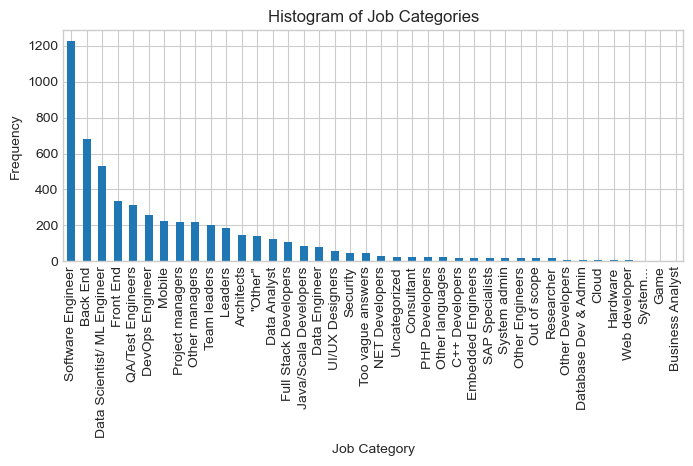

In [306]:
# Plot histogram for the 'job_category' column
plt.figure(figsize=(8, 3))
df_it_uni['job_category'].value_counts().plot(kind='bar')
plt.title('Histogram of Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [307]:
df_it_uni['job_title'][df_it_uni['job_category'] == 'Uncategorized'].tail(50)
#df_it_uni['job_title'][df_it_uni['job_category'] == 'Too vague answers'].tail(50)

89                    account managet
260                         stuttgart
535            chief research officer
795                   tech recruiting
908                     ai management
967                           beikoch
1048           computational linguist
3896                             sdet
3942                              sde
3951                              mts
3977           computational linguist
4079                               pd
4256                              sse
4349                               db
4367                       dwh expert
4399                               1с
4409    ml/research (30 hours weekly)
4476                             sdet
4507                    it специалист
4541                               32
4546               softwareentwickler
4557                               ba
4616                     localization
4954                        mainframe
5514                          desktop
Name: job_title, dtype: object

In [308]:
df_it_uni['job_title'][df_it_uni['job_category'] == 'Database Development/ Admininistration'].head(50)

Series([], Name: job_title, dtype: object)

### AI-Jobs.net

In [310]:
df_ai_uni['job_title'] = df_ai_uni['job_title'].str.replace('senior', '', case=False, regex=False)
df_ai_uni['job_title'] = df_ai_uni['job_title'].str.replace('sr.', '', case=False, regex=False)
df_ai_uni['job_title'] = df_ai_uni['job_title'].str.strip()

In [311]:
df_ai_uni['job_category'] = df_ai_uni['job_title'].apply(lambda x: categorize_job_title_1945(x, job_categories))

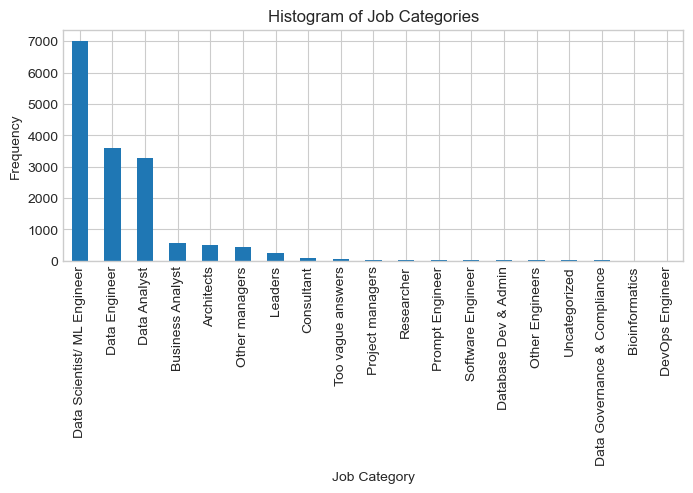

In [312]:
# Plot histogram for the 'job_category' column
plt.figure(figsize=(8, 3))
df_ai_uni['job_category'].value_counts().plot(kind='bar')
plt.title('Histogram of Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [313]:
df_ai_uni['job_title'][df_ai_uni['job_category'] == 'Uncategorized'].head(50)
#df_ai_uni['job_title'][df_ai_uni['job_category'] == 'Too vague answers'].tail(50)

21       encounter data management professional
22       encounter data management professional
101      encounter data management professional
102      encounter data management professional
755                               bear robotics
756                               bear robotics
1203     encounter data management professional
1204     encounter data management professional
11964             autonomous vehicle technician
Name: job_title, dtype: object

### Kaggle

In [315]:
df_k_uni['job_title'] = df_k_uni['job_title'].str.replace('senior', '', case=False, regex=False)
df_k_uni['job_title'] = df_k_uni['job_title'].str.replace('sr.', '', case=False, regex=False)
df_k_uni['job_title'] = df_k_uni['job_title'].str.strip()

In [316]:
df_k_uni['job_category'] = df_k_uni['job_title'].apply(lambda x: categorize_job_title_1945(x, job_categories))

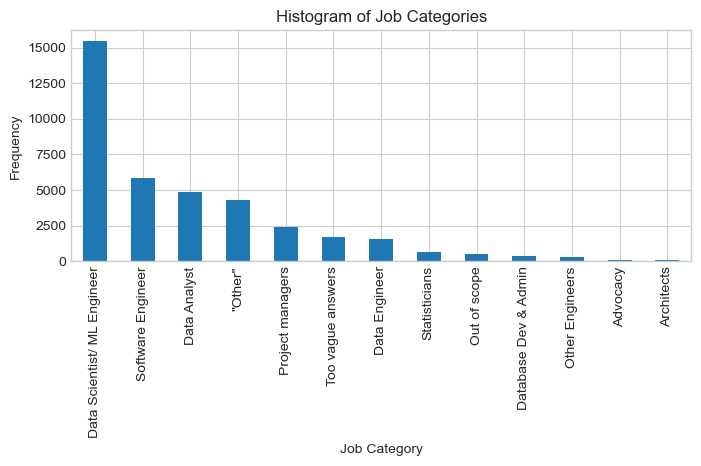

In [317]:
# Plot histogram for the 'job_category' column
plt.figure(figsize=(8, 3))
df_k_uni['job_category'].value_counts().plot(kind='bar')
plt.title('Histogram of Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [318]:
df_k_uni['job_title'][df_k_uni['job_category'] == 'Uncategorized'].tail(50)
#df_k_uni['job_title'][df_k_uni['job_category'] == 'Too vague answers'].head(50)

Series([], Name: job_title, dtype: object)

Optional: Check how these categories got populated actually

In [320]:
#for category in job_categories:
#    unique_titles = df_it_uni['job_title'][df_it_uni['job_category'] == category].unique()
#    print(f"{category}: {unique_titles}")

In [321]:
#for category in job_categories:
#    unique_titles = df_ai_uni['job_title'][df_ai_uni['job_category'] == category].unique()
#    print(f"{category}: {unique_titles}")

In [322]:
#for category in job_categories:
#    unique_titles = df_k_uni['job_title'][df_k_uni['job_category'] == category].unique()
#    print(f"{category}: {unique_titles}")

## Western Countries

In [324]:
western_countries = [
    'al', 'ad', 'am', 'at', 'az', 'by', 'be', 'ba', 'bg', 'hr',
    'cy', 'cz', 'dk', 'ee', 'fi', 'fr', 'ge', 'de', 'gr', 'hu',
    'is', 'ie', 'it', 'kz', 'xk', 'lv', 'li', 'lt', 'lu', 'mt',
    'md', 'mc', 'me', 'nl', 'mk', 'no', 'pl', 'pt', 'ro', 'ru',
    'sm', 'rs', 'sk', 'si', 'es', 'se', 'ch', 'tr', 'ua', 'gb',
    'va', 'ca', 'au', 'us'
]

In [325]:
developed_countries = ['de', 'gb', 'nl', 'se', 'dk', 'be', 'fi', 'at', 'ch', 'ie', 'ca', 'au', 'us']

## Log-transformed salary

The reasonability of this step was assessed later, in the Analysis part, and iteratively added back to here.

In [328]:
dataframes = [df_k_uni, df_it_uni, df_ai_uni]
columns_to_transform = ['salary', 'salary_2024', 'salary_norm', 'salary_norm_2024', 'salary_normmed_2024', 'salary_normmean_2024', 'salary_normgdp_2024', 'salary_normse_2024']

for df in dataframes:
    for col in columns_to_transform:
        df[f'{col}_log'] = np.log(df[col])

<div class="c">
Log-transformation was later discovered to be a not just a <u>practical</u> but also a <b>necessary</b> step.<br>
But of course, this realization was born later, and the transformation step inserted here to give the project a more logically followable structure.
</div> 

# Outlier detection

<div class="c">
To detect outliers, besides Z-score, the literature often advises the use of modified Z-score, which is basically its nonparameteric counterpart, operating with medians instead of means.<br>
Furthermore, a signed-modified-Z-score is also calculated, as the modified-Z-score loses the sign-dependence (will not distinguish between outliers that are too-low or too-high). <br>
Another popular approach can be the 1.5 IQR interval. Using Z-scores was a design choice.
</div> 

In [332]:
def add_z_scores(data, numerical_column):
    # Calculate Z-scores
    mean = data[numerical_column].mean()
    std = data[numerical_column].std()
    z_scores = (data[numerical_column] - mean) / std
    data['z_score'] = z_scores
    
    # Calculate modified Z-scores
    # 0.6745 * (xi - median)/MAD, where xi is the actual row that the Z-score will be calculated to. MAD is the median absolute deviation.
    median = data[numerical_column].median()
    mad = np.median(np.abs(data[numerical_column] - median))
    modif_z_scores = 0.6745 * np.abs(data[numerical_column] - median) / mad
    data['modif_z_score'] = modif_z_scores

    modif_z_scores_signed = 0.6745 * (data[numerical_column] - median) / mad
    data['modif_z_score_signed'] = modif_z_scores_signed
    
    return data

In [333]:
def detect_outliers(data):
    threshold = 10  # Adjust threshold as needed
    median = data.median()
    median_absolute_deviation = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * np.abs(data - median) / median_absolute_deviation
    return modified_z_scores > threshold

In [334]:
def detect_outliers_1006_2035(data, numerical_column, lower_threshold=-3, upper_threshold=10):
    median = data[numerical_column].median()
    mad = np.median(np.abs(data[numerical_column] - median))
    modif_z_scores_signed = 0.6745 * (data[numerical_column] - median) / mad
    outliers = data[(modif_z_scores_signed < lower_threshold) | (modif_z_scores_signed > upper_threshold)]
    return outliers

## Based on Normalized, Log-transformed salary

### Kaggle

In [337]:
df_k_uni_copy = df_k_uni.copy()
df_ai_uni_copy = df_ai_uni.copy()
df_it_uni_copy = df_it_uni.copy()

In [338]:
# grouped DF
df_k_g = df_k_uni.groupby(['experience'])

# adding Z-scores
df_k_gz = df_k_g.apply(lambda x: add_z_scores(x, 'salary_normmed_2024_log'), include_groups=False).reset_index(drop=True)

# outputting with descending Modified-Z-score order
df_k_gz.sort_values('modif_z_score_signed', ascending=True).head(5)

,age,country,education_level,job_title,job_title_2,company_size,salary_range,year,lower_salary,upper_salary,salary,industry,are_you_student,survey,seniority_level,company_size_category,country_code,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,salary_normmed,salary_normmean,salary_normgdp,salary_normse,salary_norm,salary_2024,salary_norm_2024,salary_normmed_2024,salary_normmean_2024,salary_normgdp_2024,salary_normse_2024,job_category,salary_log,salary_2024_log,salary_norm_log,salary_norm_2024_log,salary_normmed_2024_log,salary_normmean_2024_log,salary_normgdp_2024_log,salary_normse_2024_log,z_score,modif_z_score,modif_z_score_signed
14130,55-59,sg,master’s degree,other,NaN,"1000-9,999 employees",0-999,2020,0.00,999.00,499.50,NaN,NaN,k,executive,l,sg,24525,32700,84734,NaN,0.02,0.02,0.01,NaN,0.01,590.64,0.01,0.02,0.02,0.01,NaN,"""Other""",6.21,6.38,-4.79,-4.62,-3.73,-4.01,-4.97,NaN,-3.22,7.62,-7.62
11674,30-34,sg,bachelor’s degree,dba/database engineer,NaN,"10,000 or more employees",0-999,2021,0.00,999.00,499.50,computers/technology,NaN,k,senior,l,sg,24525,32700,84734,NaN,0.02,0.02,0.01,NaN,0.01,583.64,0.01,0.02,0.02,0.01,NaN,Database Dev & Admin,6.21,6.37,-4.79,-4.63,-3.74,-4.03,-4.98,NaN,-3.63,7.38,-7.38
16652,50-54,us,master’s degree,"data analyst (business, marketing, financial, ...",NaN,"10,000 or more employees",0-999,2022,0.00,999.00,499.50,broadcasting/communications,no,k,executive,l,us,19306,25332,81695,160899.00,0.03,0.02,0.01,0.00,0.01,561.19,0.01,0.03,0.02,0.01,0.00,Data Analyst,6.21,6.33,-5.03,-4.91,-3.54,-3.81,-4.98,-5.66,-3.10,7.37,-7.37
16696,70+,us,doctoral degree,research scientist,NaN,0-49 employees,0-999,2022,0.00,999.00,499.50,medical/pharmaceutical,no,k,executive,s,us,19306,25332,81695,160899.00,0.03,0.02,0.01,0.00,0.01,561.19,0.01,0.03,0.02,0.01,0.00,Data Scientist/ ML Engineer,6.21,6.33,-5.03,-4.91,-3.54,-3.81,-4.98,-5.66,-3.10,7.37,-7.37
16730,60-69,us,master’s degree,teacher / professor,NaN,0-49 employees,0-999,2022,0.00,999.00,499.50,academics/education,no,k,executive,s,us,19306,25332,81695,160899.00,0.03,0.02,0.01,0.00,0.01,561.19,0.01,0.03,0.02,0.01,0.00,Out of scope,6.21,6.33,-5.03,-4.91,-3.54,-3.81,-4.98,-5.66,-3.10,7.37,-7.37


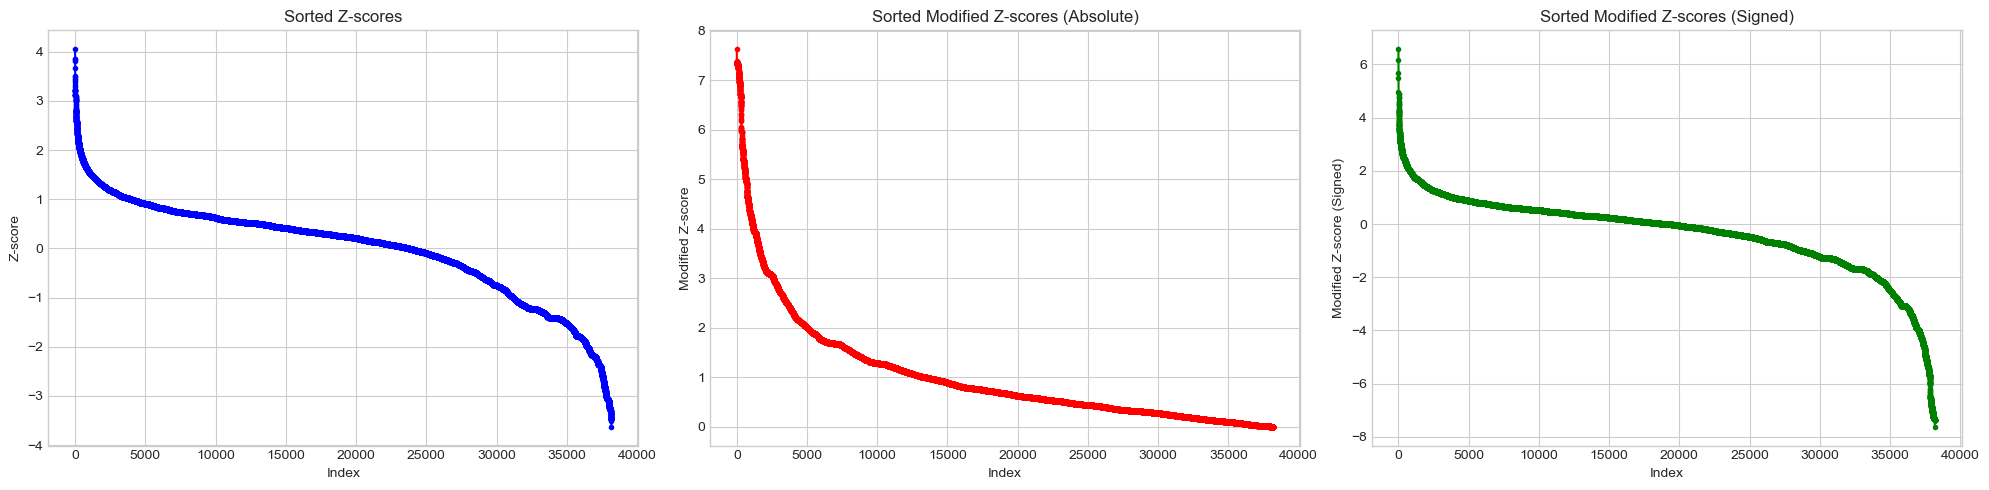

In [339]:
# Sorting the dataframes for plotting
df_k_gzs = df_k_gz['z_score'].sort_values(ascending=False).reset_index(drop=True)
df_k_gmzs = df_k_gz['modif_z_score'].sort_values(ascending=False).reset_index(drop=True)
df_k_gmzs_signed = df_k_gz['modif_z_score_signed'].sort_values(ascending=False).reset_index(drop=True)

# Plotting
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(df_k_gzs, marker='.', linestyle='-', color='b')
plt.title('Sorted Z-scores')
plt.xlabel('Index')
plt.ylabel('Z-score')

plt.subplot(1, 3, 2)
plt.plot(df_k_gmzs, marker='.', linestyle='-', color='r')
plt.title('Sorted Modified Z-scores (Absolute)')
plt.xlabel('Index')
plt.ylabel('Modified Z-score')

plt.subplot(1, 3, 3)
plt.plot(df_k_gmzs_signed, marker='.', linestyle='-', color='g')
plt.title('Sorted Modified Z-scores (Signed)')
plt.xlabel('Index')
plt.ylabel('Modified Z-score (Signed)')

plt.tight_layout()
plt.show()

In [340]:
# Start with the initial DataFrame
len_k_initial = len(df_k_gz)

# Define thresholds
lower_threshold = -0.5
upper_threshold = 3.0

# Boolean masks for outliers
mask_k_small = df_k_gz['modif_z_score_signed'] < lower_threshold
mask_k_large = df_k_gz['modif_z_score_signed'] > upper_threshold

# Count outliers
len_k_outlierdrop_small = mask_k_small.sum()
len_k_outlierdrop_large = mask_k_large.sum()

# Remove outliers
df_k = df_k_gz[~(mask_k_small | mask_k_large)].copy()

# Print results
print(f"{len_k_outlierdrop_small + len_k_outlierdrop_large} outliers removed out of {len_k_initial} rows:")
print(f" - Too small: {len_k_outlierdrop_small} rows removed")
print(f" - Too large: {len_k_outlierdrop_large} rows removed")

# Display the top rows sorted by 'modif_z_score'
df_k.sort_values('modif_z_score', ascending=False).head(2)

13193 outliers removed out of 38184 rows:
 - Too small: 13028 rows removed
 - Too large: 165 rows removed


,age,country,education_level,job_title,job_title_2,company_size,salary_range,year,lower_salary,upper_salary,salary,industry,are_you_student,survey,seniority_level,company_size_category,country_code,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,salary_normmed,salary_normmean,salary_normgdp,salary_normse,salary_norm,salary_2024,salary_norm_2024,salary_normmed_2024,salary_normmean_2024,salary_normgdp_2024,salary_normse_2024,job_category,salary_log,salary_2024_log,salary_norm_log,salary_norm_2024_log,salary_normmed_2024_log,salary_normmean_2024_log,salary_normgdp_2024_log,salary_normse_2024_log,z_score,modif_z_score,modif_z_score_signed
15254,35-39,cn,master’s degree,software engineer,NaN,0-49 employees,"125,000-149,999",2021,125000.00,149999.00,137499.50,accounting/finance,NaN,k,executive,s,cn,2525,4246,24558,NaN,54.46,32.38,5.60,NaN,10.82,160659.92,12.64,63.63,37.84,6.54,NaN,Software Engineer,11.83,11.99,2.38,2.54,4.15,3.63,1.88,NaN,1.61,3.00,3.00
13697,50-54,za,bachelor’s degree,other,237,50-249 employees,"80,000-89,999",2019,80000.00,89999.00,84999.50,NaN,NaN,k,executive,m,za,1624,4081,15847,NaN,52.34,20.83,5.36,NaN,14.16,102317.77,17.05,63.00,25.07,6.46,NaN,"""Other""",11.35,11.54,2.65,2.84,4.14,3.22,1.87,NaN,1.60,2.98,2.98


In [341]:
df_k[df_k['country'].isin(developed_countries)].sort_values('modif_z_score_signed', ascending=True).head(10)

,age,country,education_level,job_title,job_title_2,company_size,salary_range,year,lower_salary,upper_salary,salary,industry,are_you_student,survey,seniority_level,company_size_category,country_code,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,salary_normmed,salary_normmean,salary_normgdp,salary_normse,salary_norm,salary_2024,salary_norm_2024,salary_normmed_2024,salary_normmean_2024,salary_normgdp_2024,salary_normse_2024,job_category,salary_log,salary_2024_log,salary_norm_log,salary_norm_2024_log,salary_normmed_2024_log,salary_normmean_2024_log,salary_normgdp_2024_log,salary_normse_2024_log,z_score,modif_z_score,modif_z_score_signed
14574,55-59,ca,master’s degree,software engineer,NaN,50-249 employees,"70,000-79,999",2020,70000.00,79999.00,74999.50,NaN,NaN,k,executive,m,ca,18652,22042,61582,72110.00,4.02,3.40,1.22,1.04,1.37,88684.00,1.61,4.75,4.02,1.44,1.23,Software Engineer,11.23,11.39,0.31,0.48,1.56,1.39,0.36,0.21,0.02,0.50,-0.50
14963,50-54,ca,bachelor’s degree,data scientist,NaN,0-49 employees,"70,000-79,999",2020,70000.00,79999.00,74999.50,NaN,NaN,k,executive,s,ca,18652,22042,61582,72110.00,4.02,3.40,1.22,1.04,1.37,88684.00,1.61,4.75,4.02,1.44,1.23,Data Scientist/ ML Engineer,11.23,11.39,0.31,0.48,1.56,1.39,0.36,0.21,0.02,0.50,-0.50
19119,22-24,gb,master’s degree,data scientist,-1,0-49 employees,"25,000-29,999",2019,25000.00,29999.00,27499.50,NaN,NaN,k,medior,s,gb,14793,18133,58906,69594.00,1.86,1.52,0.47,0.40,0.60,33102.40,0.72,2.24,1.83,0.56,0.48,Data Scientist/ ML Engineer,10.22,10.41,-0.52,-0.33,0.81,0.60,-0.58,-0.74,-0.04,0.50,-0.50
15057,50-54,at,no degree,software engineer,NaN,"1000-9,999 employees","70,000-79,999",2021,70000.00,79999.00,74999.50,shipping/transportation,NaN,k,executive,l,at,18405,20718,73751,71110.00,4.07,3.62,1.02,1.05,1.44,87632.42,1.68,4.76,4.23,1.19,1.23,Software Engineer,11.23,11.38,0.36,0.52,1.56,1.44,0.17,0.21,0.02,0.50,-0.50
65,22-24,gb,master’s degree,data analyst,-1,250-999 employees,"10,000-14,999",2019,10000.00,14999.00,12499.50,NaN,NaN,k,junior,m,gb,14793,18133,58906,69594.00,0.84,0.69,0.21,0.18,0.27,15046.22,0.33,1.02,0.83,0.26,0.22,Data Analyst,9.43,9.62,-1.31,-1.12,0.02,-0.19,-1.36,-1.53,-0.25,0.50,-0.50
26598,25-29,be,doctoral degree,data engineer,-1,"> 10,000 employees","40,000-49,999",2019,40000.00,49999.00,44999.50,NaN,NaN,k,senior,l,be,16157,17917,70456,49892.00,2.79,2.51,0.64,0.90,0.90,54167.95,1.08,3.35,3.02,0.77,1.09,Data Engineer,10.71,10.90,-0.11,0.08,1.21,1.11,-0.26,0.08,-0.06,0.49,-0.49
11499,25-29,ch,doctoral degree,data scientist,NaN,0-49 employees,"80,000-89,999",2021,80000.00,89999.00,84999.50,academics/education,NaN,k,senior,s,ch,21490,25787,92980,131900.00,3.96,3.30,0.91,0.64,0.91,99316.82,1.06,4.62,3.85,1.07,0.75,Data Scientist/ ML Engineer,11.35,11.51,-0.09,0.06,1.53,1.35,0.07,-0.28,-0.03,0.49,-0.49
18223,22-24,ca,bachelor’s degree,data scientist,-1,"> 10,000 employees","30,000-39,999",2019,30000.00,39999.00,34999.50,NaN,NaN,k,medior,l,ca,18652,22042,61582,72110.00,1.88,1.59,0.57,0.49,0.64,42130.49,0.77,2.26,1.91,0.68,0.58,Data Scientist/ ML Engineer,10.46,10.65,-0.45,-0.27,0.81,0.65,-0.38,-0.54,-0.04,0.49,-0.49
17737,25-29,ca,doctoral degree,other,121,0-49 employees,"30,000-39,999",2019,30000.00,39999.00,34999.50,NaN,NaN,k,medior,s,ca,18652,22042,61582,72110.00,1.88,1.59,0.57,0.49,0.64,42130.49,0.77,2.26,1.91,0.68,0.58,"""Other""",10.46,10.65,-0.45,-0.27,0.81,0.65,-0.38,-0.54,-0.04,0.49,-0.49
28415,35-39,us,master’s degree,data scientist,NaN,250-999 employees,"50,000-59,999",2020,50000.00,59999.00,54999.50,NaN,NaN,k,senior,m,us,19306,25332,81695,160899.00,2.85,2.17,0.67,0.34,0.72,65034.78,0.85,3.37,2.57,0.80,0.40,Data Scientist/ ML Engineer,10.92,11.08,-0.33,-0.16,1.21,0.94,-0.23,-0.91,-0.06,0.49,-0.49


### DE-IT

In [343]:
# grouped DF
df_it_g = df_it_uni.groupby(['seniority_level'])

# adding Z-scores
df_it_gz = df_it_g.apply(lambda x: add_z_scores(x, 'salary_normmed_2024_log'), include_groups=False).reset_index()

# outputting with descending Modified-Z-score order
df_it_gz.sort_values('modif_z_score', ascending=False).head()

,seniority_level,level_1,age,city,job_title,language_at_work,company_size,company_type,salary,year,country,experience,skills,skills_2,employment_status,years_of_experience_in_germany,job_title_2,your_seniority_level,skills_3,company_industry,survey,city_category,language_category,company_size_category,industry_category,country_code,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,salary_normmed,salary_normmean,salary_normgdp,salary_normse,salary_norm,salary_2024,salary_norm_2024,salary_normmed_2024,salary_normmean_2024,salary_normgdp_2024,salary_normse_2024,job_category,salary_log,salary_2024_log,salary_norm_log,salary_norm_2024_log,salary_normmed_2024_log,salary_normmean_2024_log,salary_normgdp_2024_log,salary_normse_2024_log,z_score,modif_z_score,modif_z_score_signed
1434,medior,812,29.00,cologne,ml engineer,english,up to 10,startup,6272541915.89,2020,de,1.00,julia,NaN,full-time employee,1.00,NaN,NaN,NaN,NaN,it,other,English-speaking (but not german),s,other,de,16845,19730,69338,83332.00,372368.18,317919.00,90463.27,75271.71,128754.68,7417037942.72,152247.43,440310.95,375926.91,106969.31,89005.88,Data Scientist/ ML Engineer,22.56,22.73,11.77,11.93,13.00,12.84,11.58,11.40,20.31,57.54,57.54
1892,medior,2534,NaN,munich,backend developer,"german,russian",11-50,NaN,57.79,2022,de,4.00,other,"java / scala,other",full-time employee,4.00,NaN,NaN,java,NaN,it,munich,German-speaking,s,other,de,16845,19730,69338,83332.00,0.00,0.00,0.00,0.00,0.00,64.92,0.00,0.00,0.00,0.00,0.00,Back End,4.06,4.17,-6.74,-6.62,-5.56,-5.72,-6.97,-7.16,-12.84,36.43,-36.43
2175,medior,3811,NaN,munich,ml engineer,"german,english",1000+,NaN,95.01,2023,de,1.00,python,"azure,kubernetes,terraform,docker,other,python",full/part-time employee,1.00,NaN,NaN,NaN,"manufacturing, transportation, or supply chain",it,munich,German-speaking,l,"manufacturing, transportation, or supply chain",de,16845,19730,69338,83332.00,0.01,0.00,0.00,0.00,0.00,99.76,0.00,0.01,0.01,0.00,0.00,Data Scientist/ ML Engineer,4.55,4.60,-6.24,-6.19,-5.13,-5.29,-6.54,-6.73,-12.08,34.25,-34.25
4301,senior,3510,NaN,other,network / security engineer / system administr...,"english,russian",11-50,NaN,77.74,2023,de,15.00,bash,"docker,aws",full/part-time employee,2.00,NaN,NaN,NaN,"information services, it, software development...",it,other,English-speaking (but not german),s,information technology,de,16845,19730,69338,83332.00,0.00,0.00,0.00,0.00,0.00,81.62,0.00,0.00,0.00,0.00,0.00,Security,4.35,4.40,-6.44,-6.39,-5.33,-5.49,-6.74,-6.93,-13.71,33.11,-33.11
1989,medior,2893,NaN,berlin,software engineer,english,1000+,NaN,115.57,2022,de,10.00,c / c++,"python,php,swift,rust",full-time employee,4.00,NaN,NaN,NaN,NaN,it,berlin,English-speaking (but not german),l,other,de,16845,19730,69338,83332.00,0.01,0.01,0.00,0.00,0.00,129.85,0.00,0.01,0.01,0.00,0.00,Software Engineer,4.75,4.87,-6.04,-5.93,-4.87,-5.02,-6.28,-6.46,-11.61,32.92,-32.92


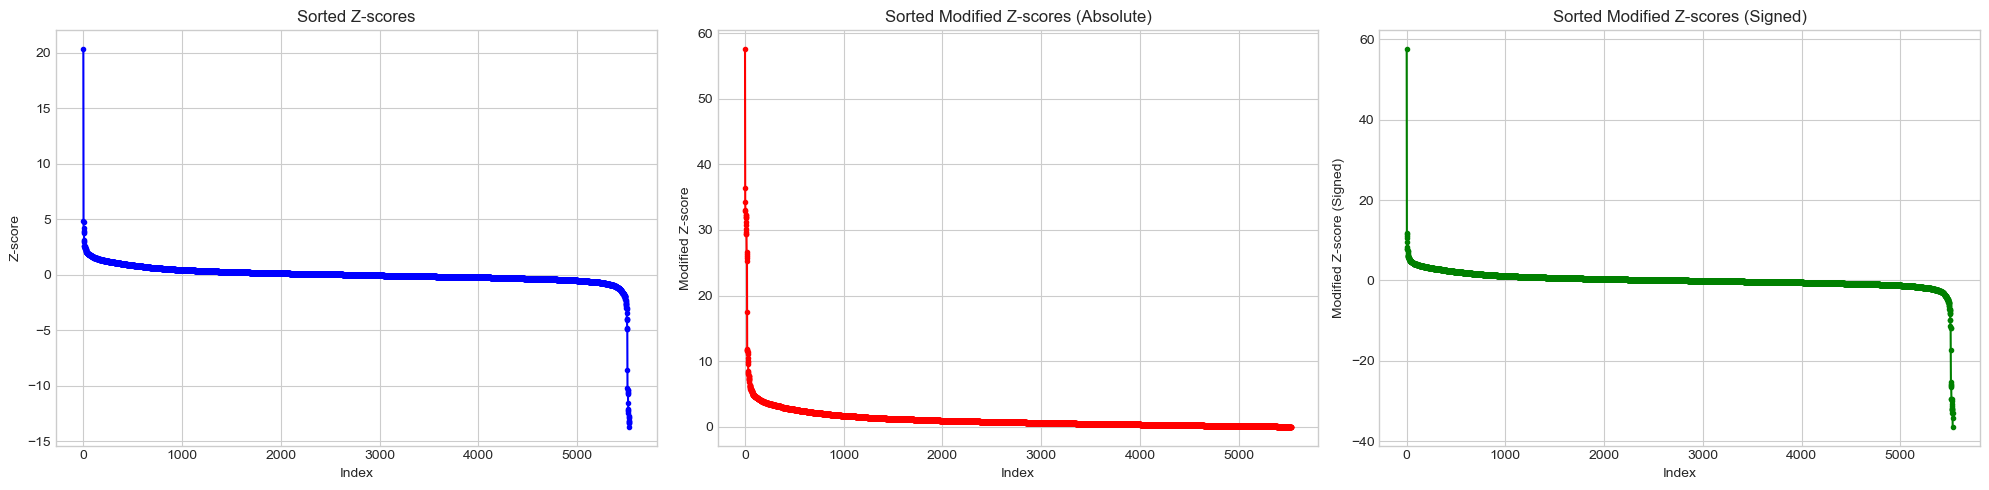

In [344]:
# Sorting the dataframes for plotting
df_it_gzs = df_it_gz['z_score'].sort_values(ascending=False).reset_index(drop=True)
df_it_gmzs = df_it_gz['modif_z_score'].sort_values(ascending=False).reset_index(drop=True)
df_it_gmzs_signed = df_it_gz['modif_z_score_signed'].sort_values(ascending=False).reset_index(drop=True)

# Plotting
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(df_it_gzs, marker='.', linestyle='-', color='b')
plt.title('Sorted Z-scores')
plt.xlabel('Index')
plt.ylabel('Z-score')

plt.subplot(1, 3, 2)
plt.plot(df_it_gmzs, marker='.', linestyle='-', color='r')
plt.title('Sorted Modified Z-scores (Absolute)')
plt.xlabel('Index')
plt.ylabel('Modified Z-score')

plt.subplot(1, 3, 3)
plt.plot(df_it_gmzs_signed, marker='.', linestyle='-', color='g')
plt.title('Sorted Modified Z-scores (Signed)')
plt.xlabel('Index')
plt.ylabel('Modified Z-score (Signed)')

plt.tight_layout()
plt.show()

In [345]:
# Start with the initial DataFrame
len_it_initial = len(df_it_gz)

# Define thresholds
lower_threshold = -3.0
upper_threshold = 3.0

# Boolean masks for outliers
mask_it_small = df_it_gz['modif_z_score_signed'] < lower_threshold
mask_it_large = df_it_gz['modif_z_score_signed'] > upper_threshold

# Count outliers
len_it_outlierdrop_small = mask_it_small.sum()
len_it_outlierdrop_large = mask_it_large.sum()

# Remove outliers
df_it = df_it_gz[~(mask_it_small | mask_it_large)].copy()

# Print results
print(f"{len_it_outlierdrop_small + len_it_outlierdrop_large} outliers removed out of {len_it_initial} rows:")
print(f" - Too small: {len_it_outlierdrop_small} rows removed")
print(f" - Too large: {len_it_outlierdrop_large} rows removed")

# Display the top 2 rows sorted by 'modif_z_score'
df_it.sort_values('modif_z_score', ascending=False).head(2)

369 outliers removed out of 5532 rows:
 - Too small: 103 rows removed
 - Too large: 266 rows removed


,seniority_level,level_1,age,city,job_title,language_at_work,company_size,company_type,salary,year,country,experience,skills,skills_2,employment_status,years_of_experience_in_germany,job_title_2,your_seniority_level,skills_3,company_industry,survey,city_category,language_category,company_size_category,industry_category,country_code,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,salary_normmed,salary_normmean,salary_normgdp,salary_normse,salary_norm,salary_2024,salary_norm_2024,salary_normmed_2024,salary_normmean_2024,salary_normgdp_2024,salary_normse_2024,job_category,salary_log,salary_2024_log,salary_norm_log,salary_norm_2024_log,salary_normmed_2024_log,salary_normmean_2024_log,salary_normgdp_2024_log,salary_normse_2024_log,z_score,modif_z_score,modif_z_score_signed
3777,senior,2409,NaN,berlin,engineering manager,"english,russian",1000+,NaN,176511.16,2022,de,11.00,other,NaN,full-time employee,0.00,NaN,NaN,NaN,NaN,it,berlin,English-speaking (but not german),l,other,de,16845,19730,69338,83332.00,10.48,8.95,2.55,2.12,3.62,198310.29,4.07,11.77,10.05,2.86,2.38,Other managers,12.08,12.20,1.29,1.40,2.47,2.31,1.05,0.87,1.19,3.00,3.00
1885,medior,2513,NaN,berlin,engineering manager,english,101-1000,NaN,138687.34,2022,de,15.00,php,go,full-time employee,7.00,NaN,NaN,NaN,NaN,it,berlin,English-speaking (but not german),m,other,de,16845,19730,69338,83332.00,8.23,7.03,2.00,1.66,2.85,155815.23,3.20,9.25,7.90,2.25,1.87,Other managers,11.84,11.96,1.05,1.16,2.22,2.07,0.81,0.63,1.06,2.99,2.99


### AI-Jobs.net

In [347]:
# grouped DF
df_ai_g = df_ai_uni.groupby(['seniority_level'], observed=False)

# adding Z-scores
df_ai_gz = df_ai_g.apply(lambda x: add_z_scores(x, 'salary_normmed_2024_log'), include_groups=False).reset_index()

# outputting with descending Modified-Z-score order
df_ai_gz.sort_values('modif_z_score_signed', ascending=True).head()

,seniority_level,level_1,year,employment_status,job_title,salary_in_currency,salary_currency,salary,country,remote_ratio,company_location,company_size,ratio,survey,company_size_category,country_code,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,salary_normmed,salary_normmean,salary_normgdp,salary_normse,salary_norm,salary_2024,salary_norm_2024,salary_normmed_2024,salary_normmean_2024,salary_normgdp_2024,salary_normse_2024,job_category,salary_log,salary_2024_log,salary_norm_log,salary_norm_2024_log,salary_normmed_2024_log,salary_normmean_2024_log,salary_normgdp_2024_log,salary_normse_2024_log,z_score,modif_z_score,modif_z_score_signed
5814,senior,444,2024,ft,data architect,25000,usd,25000,us,0,us,m,1.00,ai,m,us,19306,25332,81695,160899.00,1.29,0.99,0.31,0.16,0.33,25000.00,0.33,1.29,0.99,0.31,0.16,Architects,10.13,10.13,-1.12,-1.12,0.26,-0.01,-1.18,-1.86,-4.81,5.19,-5.19
6514,senior,1696,2024,ft,data quality engineer,25000,usd,25000,us,0,us,m,1.00,ai,m,us,19306,25332,81695,160899.00,1.29,0.99,0.31,0.16,0.33,25000.00,0.33,1.29,0.99,0.31,0.16,Data Analyst,10.13,10.13,-1.12,-1.12,0.26,-0.01,-1.18,-1.86,-4.81,5.19,-5.19
15767,senior,15555,2022,ft,data engineer,25000,usd,25000,us,100,us,m,1.00,ai,m,us,19306,25332,81695,160899.00,1.29,0.99,0.31,0.16,0.33,28087.50,0.37,1.45,1.11,0.34,0.17,Data Engineer,10.13,10.24,-1.12,-1.00,0.37,0.10,-1.07,-1.75,-4.51,4.87,-4.87
11985,senior,10402,2023,ft,data lead,38000,usd,38000,us,0,us,m,1.00,ai,m,us,19306,25332,81695,160899.00,1.97,1.50,0.47,0.24,0.50,39900.00,0.52,2.07,1.58,0.49,0.25,Leaders,10.55,10.59,-0.70,-0.65,0.73,0.45,-0.72,-1.39,-3.62,3.90,-3.90
5848,senior,524,2024,ft,data scientist,25000,gbp,31250,gb,0,gb,m,1.25,ai,m,gb,14793,18133,58906,69594.00,2.11,1.72,0.53,0.45,0.68,31250.00,0.68,2.11,1.72,0.53,0.45,Data Scientist/ ML Engineer,10.35,10.35,-0.39,-0.39,0.75,0.54,-0.63,-0.80,-3.56,3.84,-3.84


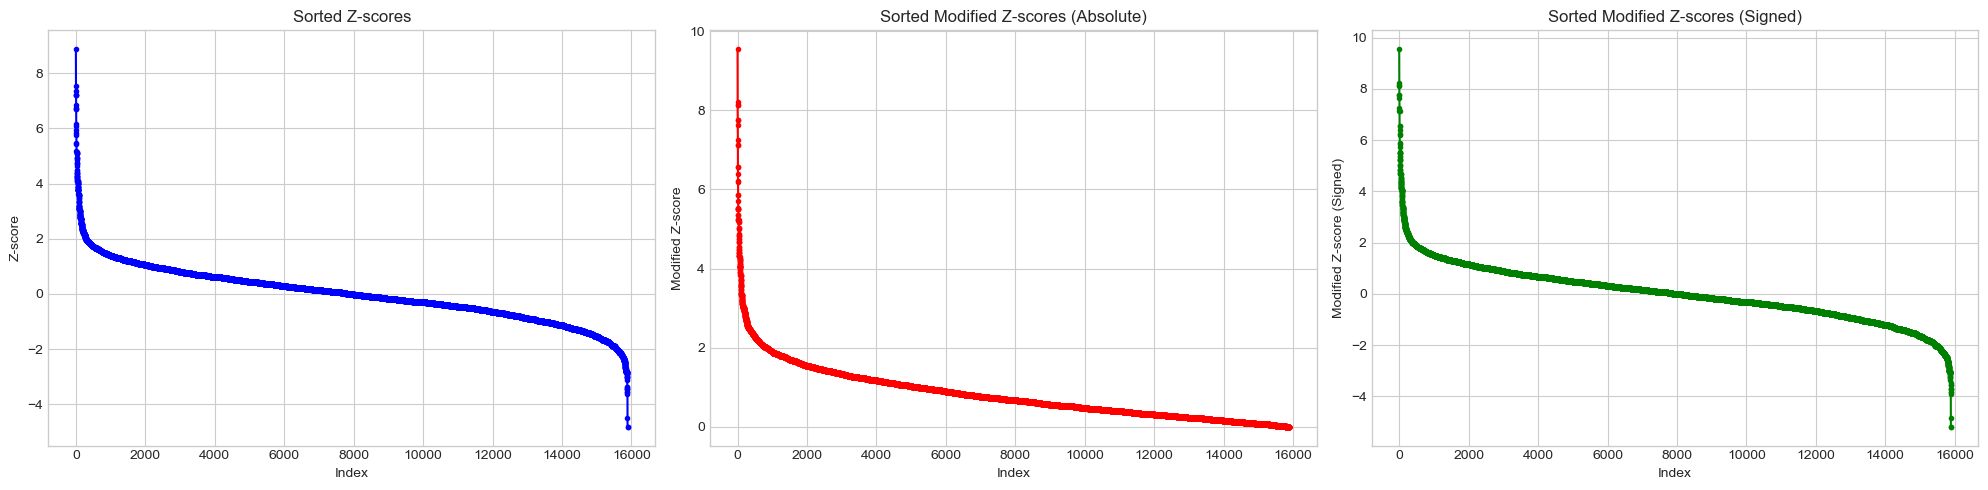

In [348]:
# Sorting the dataframes for plotting
df_ai_gzs = df_ai_gz['z_score'].sort_values(ascending=False).reset_index(drop=True)
df_ai_gmzs = df_ai_gz['modif_z_score'].sort_values(ascending=False).reset_index(drop=True)
df_ai_gmzs_signed = df_ai_gz['modif_z_score_signed'].sort_values(ascending=False).reset_index(drop=True)

# Plotting
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(df_ai_gzs, marker='.', linestyle='-', color='b')
plt.title('Sorted Z-scores')
plt.xlabel('Index')
plt.ylabel('Z-score')

plt.subplot(1, 3, 2)
plt.plot(df_ai_gmzs, marker='.', linestyle='-', color='r')
plt.title('Sorted Modified Z-scores (Absolute)')
plt.xlabel('Index')
plt.ylabel('Modified Z-score')

plt.subplot(1, 3, 3)
plt.plot(df_ai_gmzs_signed, marker='.', linestyle='-', color='g')
plt.title('Sorted Modified Z-scores (Signed)')
plt.xlabel('Index')
plt.ylabel('Modified Z-score (Signed)')

plt.tight_layout()
plt.show()

In [349]:
# Start with the initial DataFrame
len_ai_initial = len(df_ai_gz)

# Define thresholds
lower_threshold = -3.0
upper_threshold = 3.0

# Boolean masks for outliers
mask_ai_small = df_ai_gz['modif_z_score_signed'] < lower_threshold
mask_ai_large = df_ai_gz['modif_z_score_signed'] > upper_threshold

# Count outliers
len_ai_outlierdrop_small = mask_ai_small.sum()
len_ai_outlierdrop_large = mask_ai_large.sum()

# Remove outliers
df_ai = df_ai_gz[~(mask_ai_small | mask_ai_large)].copy()

# Print results
print(f"{len_ai_outlierdrop_small + len_ai_outlierdrop_large} outliers removed out of {len_ai_initial} rows:")
print(f" - Too small: {len_ai_outlierdrop_small} rows removed")
print(f" - Too large: {len_ai_outlierdrop_large} rows removed")

# Display the top 2 rows sorted by 'modif_z_score'
df_ai.sort_values('modif_z_score', ascending=False).head(2)

181 outliers removed out of 15891 rows:
 - Too small: 54 rows removed
 - Too large: 127 rows removed


,seniority_level,level_1,year,employment_status,job_title,salary_in_currency,salary_currency,salary,country,remote_ratio,company_location,company_size,ratio,survey,company_size_category,country_code,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,salary_normmed,salary_normmean,salary_normgdp,salary_normse,salary_norm,salary_2024,salary_norm_2024,salary_normmed_2024,salary_normmean_2024,salary_normgdp_2024,salary_normse_2024,job_category,salary_log,salary_2024_log,salary_norm_log,salary_norm_2024_log,salary_normmed_2024_log,salary_normmean_2024_log,salary_normgdp_2024_log,salary_normse_2024_log,z_score,modif_z_score,modif_z_score_signed
15889,senior,15887,2020,ft,data scientist,412000,usd,412000,us,100,us,l,1.00,ai,l,us,19306,25332,81695,160899.00,21.34,16.26,5.04,2.56,5.40,487174.05,6.38,25.23,19.23,5.96,3.03,Data Scientist/ ML Engineer,12.93,13.10,1.69,1.85,3.23,2.96,1.79,1.11,2.78,2.99,2.99
8892,senior,6027,2023,ft,business intelligence analyst,33000,gbp,40603,gb,0,gb,m,1.23,ai,m,gb,14793,18133,58906,69594.00,2.74,2.24,0.69,0.58,0.88,42633.15,0.92,2.88,2.35,0.72,0.61,Business Analyst,10.61,10.66,-0.13,-0.08,1.06,0.85,-0.32,-0.49,-2.77,2.98,-2.98


#### Final check 

In [351]:
df_k[df_k['country'].isin(developed_countries)].sort_values('modif_z_score_signed', ascending=True).head(20)

,age,country,education_level,job_title,job_title_2,company_size,salary_range,year,lower_salary,upper_salary,salary,industry,are_you_student,survey,seniority_level,company_size_category,country_code,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,salary_normmed,salary_normmean,salary_normgdp,salary_normse,salary_norm,salary_2024,salary_norm_2024,salary_normmed_2024,salary_normmean_2024,salary_normgdp_2024,salary_normse_2024,job_category,salary_log,salary_2024_log,salary_norm_log,salary_norm_2024_log,salary_normmed_2024_log,salary_normmean_2024_log,salary_normgdp_2024_log,salary_normse_2024_log,z_score,modif_z_score,modif_z_score_signed
14574,55-59,ca,master’s degree,software engineer,NaN,50-249 employees,"70,000-79,999",2020,70000.00,79999.00,74999.50,NaN,NaN,k,executive,m,ca,18652,22042,61582,72110.00,4.02,3.40,1.22,1.04,1.37,88684.00,1.61,4.75,4.02,1.44,1.23,Software Engineer,11.23,11.39,0.31,0.48,1.56,1.39,0.36,0.21,0.02,0.50,-0.50
14963,50-54,ca,bachelor’s degree,data scientist,NaN,0-49 employees,"70,000-79,999",2020,70000.00,79999.00,74999.50,NaN,NaN,k,executive,s,ca,18652,22042,61582,72110.00,4.02,3.40,1.22,1.04,1.37,88684.00,1.61,4.75,4.02,1.44,1.23,Data Scientist/ ML Engineer,11.23,11.39,0.31,0.48,1.56,1.39,0.36,0.21,0.02,0.50,-0.50
19119,22-24,gb,master’s degree,data scientist,-1,0-49 employees,"25,000-29,999",2019,25000.00,29999.00,27499.50,NaN,NaN,k,medior,s,gb,14793,18133,58906,69594.00,1.86,1.52,0.47,0.40,0.60,33102.40,0.72,2.24,1.83,0.56,0.48,Data Scientist/ ML Engineer,10.22,10.41,-0.52,-0.33,0.81,0.60,-0.58,-0.74,-0.04,0.50,-0.50
15057,50-54,at,no degree,software engineer,NaN,"1000-9,999 employees","70,000-79,999",2021,70000.00,79999.00,74999.50,shipping/transportation,NaN,k,executive,l,at,18405,20718,73751,71110.00,4.07,3.62,1.02,1.05,1.44,87632.42,1.68,4.76,4.23,1.19,1.23,Software Engineer,11.23,11.38,0.36,0.52,1.56,1.44,0.17,0.21,0.02,0.50,-0.50
65,22-24,gb,master’s degree,data analyst,-1,250-999 employees,"10,000-14,999",2019,10000.00,14999.00,12499.50,NaN,NaN,k,junior,m,gb,14793,18133,58906,69594.00,0.84,0.69,0.21,0.18,0.27,15046.22,0.33,1.02,0.83,0.26,0.22,Data Analyst,9.43,9.62,-1.31,-1.12,0.02,-0.19,-1.36,-1.53,-0.25,0.50,-0.50
26598,25-29,be,doctoral degree,data engineer,-1,"> 10,000 employees","40,000-49,999",2019,40000.00,49999.00,44999.50,NaN,NaN,k,senior,l,be,16157,17917,70456,49892.00,2.79,2.51,0.64,0.90,0.90,54167.95,1.08,3.35,3.02,0.77,1.09,Data Engineer,10.71,10.90,-0.11,0.08,1.21,1.11,-0.26,0.08,-0.06,0.49,-0.49
11499,25-29,ch,doctoral degree,data scientist,NaN,0-49 employees,"80,000-89,999",2021,80000.00,89999.00,84999.50,academics/education,NaN,k,senior,s,ch,21490,25787,92980,131900.00,3.96,3.30,0.91,0.64,0.91,99316.82,1.06,4.62,3.85,1.07,0.75,Data Scientist/ ML Engineer,11.35,11.51,-0.09,0.06,1.53,1.35,0.07,-0.28,-0.03,0.49,-0.49
18223,22-24,ca,bachelor’s degree,data scientist,-1,"> 10,000 employees","30,000-39,999",2019,30000.00,39999.00,34999.50,NaN,NaN,k,medior,l,ca,18652,22042,61582,72110.00,1.88,1.59,0.57,0.49,0.64,42130.49,0.77,2.26,1.91,0.68,0.58,Data Scientist/ ML Engineer,10.46,10.65,-0.45,-0.27,0.81,0.65,-0.38,-0.54,-0.04,0.49,-0.49
17737,25-29,ca,doctoral degree,other,121,0-49 employees,"30,000-39,999",2019,30000.00,39999.00,34999.50,NaN,NaN,k,medior,s,ca,18652,22042,61582,72110.00,1.88,1.59,0.57,0.49,0.64,42130.49,0.77,2.26,1.91,0.68,0.58,"""Other""",10.46,10.65,-0.45,-0.27,0.81,0.65,-0.38,-0.54,-0.04,0.49,-0.49
28415,35-39,us,master’s degree,data scientist,NaN,250-999 employees,"50,000-59,999",2020,50000.00,59999.00,54999.50,NaN,NaN,k,senior,m,us,19306,25332,81695,160899.00,2.85,2.17,0.67,0.34,0.72,65034.78,0.85,3.37,2.57,0.80,0.40,Data Scientist/ ML Engineer,10.92,11.08,-0.33,-0.16,1.21,0.94,-0.23,-0.91,-0.06,0.49,-0.49


In [352]:
df_ai.sort_values('modif_z_score', ascending=False).head(5)

,seniority_level,level_1,year,employment_status,job_title,salary_in_currency,salary_currency,salary,country,remote_ratio,company_location,company_size,ratio,survey,company_size_category,country_code,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,salary_normmed,salary_normmean,salary_normgdp,salary_normse,salary_norm,salary_2024,salary_norm_2024,salary_normmed_2024,salary_normmean_2024,salary_normgdp_2024,salary_normse_2024,job_category,salary_log,salary_2024_log,salary_norm_log,salary_norm_2024_log,salary_normmed_2024_log,salary_normmean_2024_log,salary_normgdp_2024_log,salary_normse_2024_log,z_score,modif_z_score,modif_z_score_signed
15889,senior,15887,2020,ft,data scientist,412000,usd,412000,us,100,us,l,1.00,ai,l,us,19306,25332,81695,160899.00,21.34,16.26,5.04,2.56,5.40,487174.05,6.38,25.23,19.23,5.96,3.03,Data Scientist/ ML Engineer,12.93,13.10,1.69,1.85,3.23,2.96,1.79,1.11,2.78,2.99,2.99
8892,senior,6027,2023,ft,business intelligence analyst,33000,gbp,40603,gb,0,gb,m,1.23,ai,m,gb,14793,18133,58906,69594.00,2.74,2.24,0.69,0.58,0.88,42633.15,0.92,2.88,2.35,0.72,0.61,Business Analyst,10.61,10.66,-0.13,-0.08,1.06,0.85,-0.32,-0.49,-2.77,2.98,-2.98
5751,senior,355,2024,ft,research engineer,485000,usd,485000,us,0,us,m,1.00,ai,m,us,19306,25332,81695,160899.00,25.12,19.15,5.94,3.01,6.35,485000.00,6.35,25.12,19.15,5.94,3.01,Data Scientist/ ML Engineer,13.09,13.09,1.85,1.85,3.22,2.95,1.78,1.10,2.77,2.98,2.98
6841,senior,2295,2024,ft,data operations specialist,55720,usd,55720,us,100,us,m,1.00,ai,m,us,19306,25332,81695,160899.00,2.89,2.20,0.68,0.35,0.73,55720.00,0.73,2.89,2.20,0.68,0.35,Data Engineer,10.93,10.93,-0.31,-0.31,1.06,0.79,-0.38,-1.06,-2.76,2.98,-2.98
5037,medior,13689,2023,ft,machine learning engineer,50000,usd,50000,am,0,am,s,1.00,ai,s,am,2216,2810,23055,NaN,22.56,17.79,2.17,NaN,7.12,52500.00,7.48,23.69,18.68,2.28,NaN,Data Scientist/ ML Engineer,10.82,10.87,1.96,2.01,3.17,2.93,0.82,NaN,2.79,2.98,2.98


In [353]:
df_it.sort_values('modif_z_score', ascending=False).head(5)

,seniority_level,level_1,age,city,job_title,language_at_work,company_size,company_type,salary,year,country,experience,skills,skills_2,employment_status,years_of_experience_in_germany,job_title_2,your_seniority_level,skills_3,company_industry,survey,city_category,language_category,company_size_category,industry_category,country_code,median_income_2020_usd,mean_income_2020_usd,gdp_ppp_usd,glassdoor_software_engineer_usd,salary_normmed,salary_normmean,salary_normgdp,salary_normse,salary_norm,salary_2024,salary_norm_2024,salary_normmed_2024,salary_normmean_2024,salary_normgdp_2024,salary_normse_2024,job_category,salary_log,salary_2024_log,salary_norm_log,salary_norm_2024_log,salary_normmed_2024_log,salary_normmean_2024_log,salary_normgdp_2024_log,salary_normse_2024_log,z_score,modif_z_score,modif_z_score_signed
3777,senior,2409,NaN,berlin,engineering manager,"english,russian",1000+,NaN,176511.16,2022,de,11.00,other,NaN,full-time employee,0.00,NaN,NaN,NaN,NaN,it,berlin,English-speaking (but not german),l,other,de,16845,19730,69338,83332.00,10.48,8.95,2.55,2.12,3.62,198310.29,4.07,11.77,10.05,2.86,2.38,Other managers,12.08,12.20,1.29,1.40,2.47,2.31,1.05,0.87,1.19,3.00,3.00
1885,medior,2513,NaN,berlin,engineering manager,english,101-1000,NaN,138687.34,2022,de,15.00,php,go,full-time employee,7.00,NaN,NaN,NaN,NaN,it,berlin,English-speaking (but not german),m,other,de,16845,19730,69338,83332.00,8.23,7.03,2.00,1.66,2.85,155815.23,3.20,9.25,7.90,2.25,1.87,Other managers,11.84,11.96,1.05,1.16,2.22,2.07,0.81,0.63,1.06,2.99,2.99
2564,medior,5247,22.00,amsterdam,frontend developer,english,1000+,product,129348.45,2019,de,5.00,javascript / typescript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,it,other,English-speaking (but not german),l,other,de,16845,19730,69338,83332.00,7.68,6.56,1.87,1.55,2.66,155702.63,3.20,9.24,7.89,2.25,1.87,Front End,11.77,11.96,0.98,1.16,2.22,2.07,0.81,0.63,1.06,2.99,2.99
2369,medior,4511,26.00,berlin,qa,english,51-100,product,38976.30,2018,de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,it,berlin,English-speaking (but not german),m,other,de,16845,19730,69338,83332.00,2.31,1.98,0.56,0.47,0.80,47808.98,0.98,2.84,2.42,0.69,0.57,QA/Test Engineers,10.57,10.77,-0.22,-0.02,1.04,0.89,-0.37,-0.56,-1.05,2.99,-2.99
5496,senior,5465,30.00,berlin,sre,english,1000+,product,164401.32,2019,de,11.00,kubernetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,it,berlin,English-speaking (but not german),l,other,de,16845,19730,69338,83332.00,9.76,8.33,2.37,1.97,3.37,197897.36,4.06,11.75,10.03,2.85,2.37,DevOps Engineer,12.01,12.20,1.22,1.40,2.46,2.31,1.05,0.86,1.18,2.99,2.99


<div class="c">
Conclusion:<br>
The commonly used modified-Z-score loses the sign-dependence, which is a crucial information here (so it will not distinguish between a too-low and a too-high salary).<br>
Sign dependence gives significant information here, as no matter log-transformation or not, the distribution of salaries will always be closed in one-end (the lower end) and open by the higher end.<br>
Manual inspection shows that with a symmetric modif-Z-score cutoff, the irrealistically low answers are not dropped. <br>
This is most notable for the Kaggle surveys:<br> As the survey did not clearly specify whether the salary question is asking a yearly or a monthly value! This is an trivial yet enormous error in survey design<br>
<br>
To counteract this, I used a strict cutoff limit for the lower outlier for Kaggle. This was done iteratively paired with careful manual inspection.
</div> 

# Data Quality Metrics

<div class="c">
Through the cleaning steps, several 'len_' variables were introduced which tracked the length of each survey as the cleaning step was applied.<br>
In this chapter, these counters are collected.<br>
<br>
This is not done quite elegantly, but this ugly approach enables enormous flexibility in reorganizing the cleaning steps, and injecting new steps.
</div> 

## Germany-It Survey

In [358]:
cleaning_steps = [
    'Salary-nulls',
    'Employment-nulls',
    'Students',  
    'Never have coded',
    'Country-nulls',
    'Seniority-nulls',
    'Job-title-nulls',
    'Outliers: Too small salary',
    'Outliers: Too large salary'
]

In [359]:
len_it_ini = sum([
    len_it18_ini,
    len_it19_ini,
    len_it20_ini,
    len_it21_ini,
    len_it22_ini,
    len_it23_ini
])

len_it18_salarydrop = len_it18_salarydrop1 - len_it18_salarydrop2
len_it19_salarydrop = len_it19_salarydrop1 - len_it19_salarydrop2
len_it20_salarydrop = len_it20_salarydrop1 - len_it20_salarydrop2
len_it21_salarydrop = len_it21_salarydrop1 - len_it21_salarydrop2
len_it22_salarydrop = len_it22_salarydrop1 - len_it22_salarydrop2
len_it23_salarydrop = len_it23_salarydrop1 - len_it23_salarydrop2

len_it_salarydrop = sum([
    len_it18_salarydrop,
    len_it19_salarydrop,
    len_it20_salarydrop,
    len_it21_salarydrop,
    len_it22_salarydrop,
    len_it23_salarydrop
])

len_it_employmentdrop  = len_it_employmentdrop1  - len_it_employmentdrop2
len_it_studentdrop     = len_it_studentdrop1     - len_it_studentdrop2
len_it_noncoderdrop    = 0
len_it_countrydrop     = len_it_countrydrop1     - len_it_countrydrop2
len_it_senioritydrop   = len_it_senioritydrop1   - len_it_senioritydrop2
len_it_jobtitledrop    = len_it_jobtitledrop1    - len_it_jobtitledrop2
#len_it_outlierdrop     = len_it_outlierdrop1     - len_it_outlierdrop2
#len_it_outlierdropnorm = len_it_outlierdropnorm1 - len_it_outlierdropnorm2

len_it_clean = (len(df_it))

it_difference  = len_it_ini - len_it_clean
it_cleanedaway = [
    len_it_salarydrop,
    len_it_employmentdrop,
    len_it_studentdrop,   
    len_it_noncoderdrop,
    len_it_countrydrop,
    len_it_senioritydrop,
    len_it_jobtitledrop,
    len_it_outlierdrop_small,
    len_it_outlierdrop_large
]

In [360]:
print(f'Initial survey length: {len_it_ini}')
# Printing each variable in the list
for idx, value in enumerate(it_cleanedaway):
    print(f'Cleaning step {idx + 1}: {value}')
    
print(f'Final survey length: {len_it_clean}')
print(f'The difference between final and initial: {it_difference}')
print(f'Summing the individual cleaning steps: {sum(it_cleanedaway)}')

Initial survey length: 5764
Cleaning step 1: 72
Cleaning step 2: 17
Cleaning step 3: 84
Cleaning step 4: 0
Cleaning step 5: 0
Cleaning step 6: 41
Cleaning step 7: 18
Cleaning step 8: 103
Cleaning step 9: 266
Final survey length: 5163
The difference between final and initial: 601
Summing the individual cleaning steps: 601


## Kaggle

In [362]:
len_k_ini = sum([
    len_k19_ini,
    len_k20_ini,
    len_k21_ini,
    len_k22_ini
])

len_k19_salarydrop = len_k19_salarydrop1 - len_k19_salarydrop2
len_k20_salarydrop = len_k20_salarydrop1 - len_k20_salarydrop2
len_k21_salarydrop = len_k21_salarydrop1 - len_k21_salarydrop2
len_k22_salarydrop = len_k22_salarydrop1 - len_k22_salarydrop2

len_k_salarydrop = sum([
    len_k19_salarydrop,
    len_k20_salarydrop,
    len_k21_salarydrop,
    len_k22_salarydrop
])

len_k_employmentdrop  = 0
len_k_studentdrop     = 0
len_k_noncoderdrop    = len_k_noncoderdrop1    - len_k_noncoderdrop2
len_k_countrydrop     = len_k_countrydrop1     - len_k_countrydrop2
len_k_senioritydrop   = len_k_senioritydrop1   - len_k_senioritydrop2
len_k_jobtitledrop    = len_k_jobtitledrop1    - len_k_jobtitledrop2
#len_k_outlierdrop     = len_k_outlierdrop1     - len_k_outlierdrop2
#len_k_outlierdropnorm = len_k_outlierdropnorm1 - len_k_outlierdropnorm2

len_k_clean = (len(df_k))

k_difference  = len_k_ini - len_k_clean
k_cleanedaway = [
    len_k_salarydrop,
    len_k_employmentdrop,
    len_k_studentdrop,   
    len_k_noncoderdrop,
    len_k_countrydrop,
    len_k_senioritydrop,
    len_k_jobtitledrop,
    len_k_outlierdrop_small,
    len_k_outlierdrop_large
]

k_salarydrops = [
    len_k19_salarydrop,
    len_k20_salarydrop,
    len_k21_salarydrop,
    len_k22_salarydrop
]

In [363]:
print(f'Initial survey length: {len_k_ini}')
# Printing each variable in the list
for idx, value in enumerate(k_cleanedaway):
    print(f'Cleaning step {idx + 1}: {value}')
    
print(f'Final survey length: {len_k_clean}')
print(f'The difference between final and initial: {k_difference}')
print(f'Summing the individual cleaning steps: {sum(k_cleanedaway)}')

Initial survey length: 89727
Cleaning step 1: 42970
Cleaning step 2: 0
Cleaning step 3: 0
Cleaning step 4: 2758
Cleaning step 5: 2698
Cleaning step 6: 993
Cleaning step 7: 0
Cleaning step 8: 13028
Cleaning step 9: 165
Final survey length: 24991
The difference between final and initial: 64736
Summing the individual cleaning steps: 62612


## AI-Jobs.net

In [365]:
#len_ai_ini
len_ai_salarydrop = 0

len_ai_employmentdrop  = len_ai_employmentdrop1  - len_ai_employmentdrop2
len_ai_studentdrop     = len_ai_studentdrop1     - len_ai_studentdrop2
len_ai_noncoderdrop    = 0
len_ai_countrydrop     = len_ai_countrydrop1     - len_ai_countrydrop2
len_ai_senioritydrop   = len_ai_senioritydrop1   - len_ai_senioritydrop2
len_ai_jobtitledrop    = len_ai_jobtitledrop1    - len_ai_jobtitledrop2
#len_ai_outlierdrop     = len_ai_outlierdrop1     - len_ai_outlierdrop2
#len_ai_outlierdropnorm = len_ai_outlierdropnorm1 - len_ai_outlierdropnorm2

len_ai_clean = (len(df_ai))

ai_difference  = len_ai_ini - len_ai_clean
ai_cleanedaway = [
    len_ai_salarydrop,
    len_ai_employmentdrop,
    len_ai_studentdrop,   
    len_ai_noncoderdrop,
    len_ai_countrydrop,
    len_ai_senioritydrop,
    len_ai_jobtitledrop,
    len_ai_outlierdrop_small,
    len_ai_outlierdrop_large
]

In [366]:
print(f'Initial survey length: {len_ai_ini}')
# Printing each variable in the list
for idx, value in enumerate(ai_cleanedaway):
    print(f'Cleaning step {idx + 1}: {value}')
    
print(f'Final survey length: {len_ai_clean}')
print(f'The difference between final and initial: {ai_difference}')
print(f'Summing the individual cleaning steps: {sum(ai_cleanedaway)}')

Initial survey length: 15965
Cleaning step 1: 0
Cleaning step 2: 74
Cleaning step 3: 0
Cleaning step 4: 0
Cleaning step 5: 0
Cleaning step 6: 0
Cleaning step 7: 0
Cleaning step 8: 54
Cleaning step 9: 127
Final survey length: 15710
The difference between final and initial: 255
Summing the individual cleaning steps: 255


## Plots

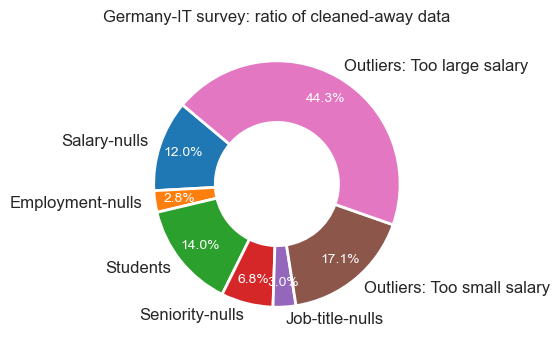

In [368]:
# Data to plot
labels = cleaning_steps
sizes = it_cleanedaway

# Filter out zero segments
non_zero_indices = [i for i, size in enumerate(sizes) if size > 0]
filtered_labels = [labels[i] for i in non_zero_indices]
filtered_sizes = [sizes[i] for i in non_zero_indices]

# Create an explode list to separate slices for better readability
explode = [0.1] * len(filtered_sizes)  # Explode all slices for visibility

# Create the pie chart
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(
    filtered_sizes,
    #explode=explode,
    labels=filtered_labels,
    autopct='%1.1f%%',
    #shadow=True,
    startangle=140,
    pctdistance=0.8,  # Distance of percentage from the center
    labeldistance=1.1,  # Distance of labels from the center
    wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2)  # This creates the ring effect
)

# Formatting labels and percentages
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')

plt.title('Germany-IT survey: ratio of cleaned-away data')
plt.show()


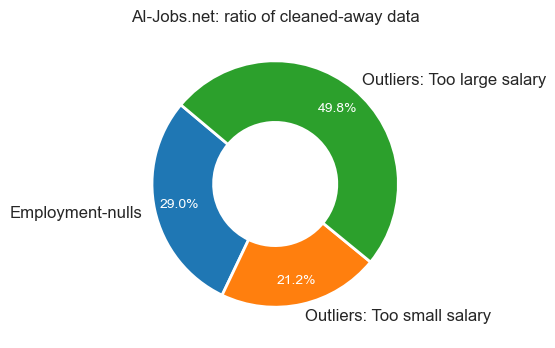

In [369]:
# Data to plot
labels = cleaning_steps
sizes = ai_cleanedaway

# Filter out zero segments
non_zero_indices = [i for i, size in enumerate(sizes) if size > 0]
filtered_labels = [labels[i] for i in non_zero_indices]
filtered_sizes = [sizes[i] for i in non_zero_indices]

# Create an explode list to separate slices for better readability
explode = [0.1] * len(filtered_sizes)  # Explode all slices for visibility

# Create the pie chart
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(
    filtered_sizes,
    #explode=explode,
    labels=filtered_labels,
    autopct='%1.1f%%',
    #shadow=True,
    startangle=140,
    pctdistance=0.8,  # Distance of percentage from the center
    labeldistance=1.1,
    wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2) 
)

# Formatting labels and percentages
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')

plt.title('AI-Jobs.net: ratio of cleaned-away data')
plt.show()

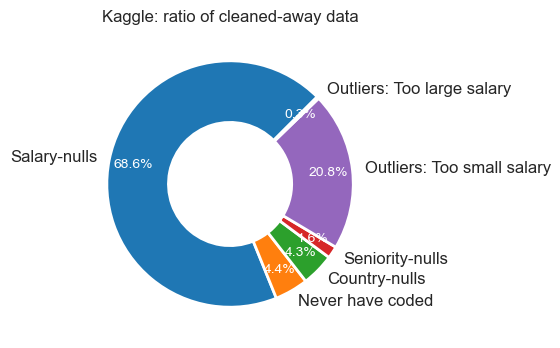

In [370]:
# Data to plot
labels = cleaning_steps
sizes = k_cleanedaway

# Filter out zero segments
non_zero_indices = [i for i, size in enumerate(sizes) if size > 0]
filtered_labels = [labels[i] for i in non_zero_indices]
filtered_sizes = [sizes[i] for i in non_zero_indices]

# Create an explode list to separate slices for better readability
explode = [0.1] * len(filtered_sizes)  # Explode all slices for visibility

# Create the pie chart
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(
    filtered_sizes,
    #explode=explode,
    labels=filtered_labels,
    autopct='%1.1f%%',
    #shadow=True,
    startangle=45,
    pctdistance=0.8,  # Distance of percentage from the center
    labeldistance=1.1,  # Distance of labels from the center
    wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2) 
)

# Formatting labels and percentages
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')

plt.title('Kaggle: ratio of cleaned-away data')
plt.show()

In [371]:
cleaning_steps

['Salary-nulls',
 'Employment-nulls',
 'Students',
 'Never have coded',
 'Country-nulls',
 'Seniority-nulls',
 'Job-title-nulls',
 'Outliers: Too small salary',
 'Outliers: Too large salary']

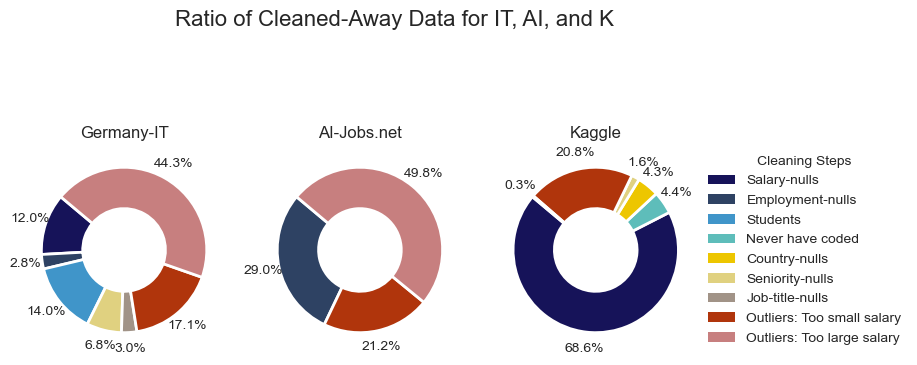

In [372]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

# Assuming your data is defined as follows:
# cleaning_steps = ['Step1', 'Step2', 'Step3', 'Step4', 'Step5', 'Step6', 'Step7']
# it_cleanedaway = [...]
# ai_cleanedaway = [...]
# k_cleanedaway = [...]

labels = cleaning_steps
sizes_it = it_cleanedaway
sizes_ai = ai_cleanedaway
sizes_k = k_cleanedaway

# Define manual colors for each cleaning step
step_colors = {
    'Salary-nulls': '#161359',           # Blue
    'Employment-nulls': '#2e4263',       # Orange
    'Students': '#4095c9',               # Green
    'Never have coded': '#5ebdba',       # Red
    'Country-nulls': '#edc600',          # Purple
    'Seniority-nulls': '#e0d180',        # Brown
    'Job-title-nulls': '#a19387',        # Pink
    'Outliers: Too small salary': '#b0350c',  # Cyan
    'Outliers: Too large salary': '#c77f7f'   # Olive
}

def filter_data(labels, sizes):
    non_zero_indices = [i for i, size in enumerate(sizes) if size > 0]
    filtered_labels = [labels[i] for i in non_zero_indices]
    filtered_sizes = [sizes[i] for i in non_zero_indices]
    return filtered_labels, filtered_sizes

# Filter data for each dataframe
labels_it, sizes_it = filter_data(labels, sizes_it)
labels_ai, sizes_ai = filter_data(labels, sizes_ai)
labels_k, sizes_k = filter_data(labels, sizes_k)

fig, axes = plt.subplots(1, 3, figsize=(8, 5))

# Function to plot pie charts
def plot_pie(ax, sizes, labels, title):
    colors_list = [step_colors[label] for label in labels]
    wedges, _ = ax.pie(
        sizes,
        colors=colors_list,
        startangle=140,
        wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2)
    )
    ax.set_title(title)
    # Add percentages next to the pie
    total = sum(sizes)
    angles = [wedge.theta2 - (wedge.theta2 - wedge.theta1) / 2. for wedge in wedges]
    for i, angle in enumerate(angles):
        x = np.cos(np.deg2rad(angle))
        y = np.sin(np.deg2rad(angle))
        ax.text(1.2 * x, 1.2 * y, f'{(sizes[i] / total) * 100:.1f}%', ha='center', va='center', fontsize=10)

# Plot for IT Cleaned Away
plot_pie(axes[0], sizes_it, labels_it, 'Germany-IT')

# Plot for AI Cleaned Away
plot_pie(axes[1], sizes_ai, labels_ai, 'AI-Jobs.net')

# Plot for K Cleaned Away
plot_pie(axes[2], sizes_k, labels_k, 'Kaggle')

# Create a vertical legend
legend_elements = [Patch(facecolor=step_colors[label], label=label) for label in labels]
fig.legend(
    handles=legend_elements, 
    loc='center right', 
    bbox_to_anchor=(1.15, 0.5), 
    ncol=1, 
    title="Cleaning Steps"
)

# Adjust layout to make space for legend
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space on the right for the legend

# Set the overall title
fig.suptitle('Ratio of Cleaned-Away Data for IT, AI, and K', fontsize=16)

plt.show()

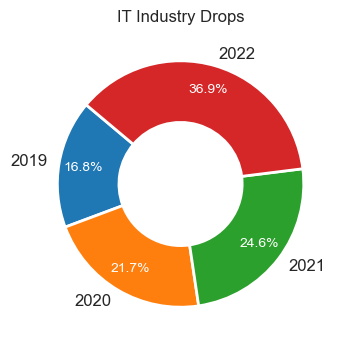

In [373]:
# Data to plot
labels = [2019,2020,2021,2022]
sizes = k_salarydrops

# Filter out zero segments
non_zero_indices = [i for i, size in enumerate(sizes) if size > 0]
filtered_labels = [labels[i] for i in non_zero_indices]
filtered_sizes = [sizes[i] for i in non_zero_indices]

# Create an explode list to separate slices for better readability
explode = [0.1] * len(filtered_sizes)  # Explode all slices for visibility

# Create the pie chart
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(
    filtered_sizes,
    #explode=explode,
    labels=filtered_labels,
    autopct='%1.1f%%',
    #shadow=True,
    startangle=140,
    pctdistance=0.8,  # Distance of percentage from the center
    labeldistance=1.1,  # Distance of labels from the center
    wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2) 
)

# Formatting labels and percentages
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')

plt.title('IT Industry Drops')
plt.show()

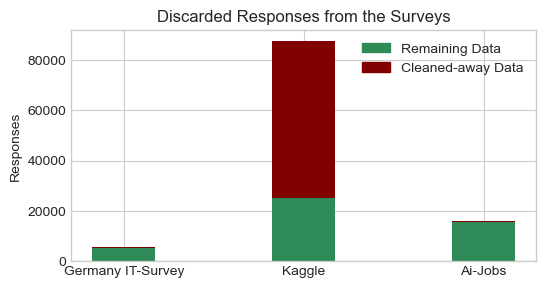

In [374]:
# Data
categories = ['Germany IT-Survey', 'Kaggle', 'Ai-Jobs']
data_points_1 = [len_it_clean, sum(it_cleanedaway)]
data_points_2 = [len_k_clean, sum(k_cleanedaway)]
data_points_3 = [len_ai_clean, sum(ai_cleanedaway)]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 3))
bar_width = 0.35  # Width of the bars

# Colors for the stacks
colors = ['green', 'red']
colors = ['darkgreen', 'firebrick']
colors = ['olive', 'maroon']
colors = ['forestgreen', 'crimson']
colors = ['seagreen', 'darkred']
colors = ['teal', 'darkred']
colors = ['seagreen', 'maroon']

# Plot each bar category
bottom = [0] * len(categories)
for i, category in enumerate(categories):
    for j, value in enumerate([data_points_1, data_points_2, data_points_3][i]):
        ax.bar(category, value, bar_width, bottom=bottom[i], color=colors[j])
        bottom[i] += value

# Adding labels and title
ax.set_ylabel('Responses')
ax.set_title('Discarded Responses from the Surveys')

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = ['Remaining Data', 'Cleaned-away Data']
ax.legend(handles, labels, loc='upper right')

# Show plot
plt.show()

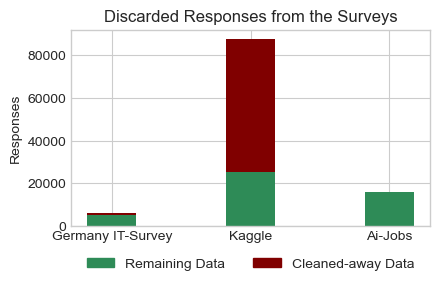

In [375]:
# Create the figure and axis with specified size
fig, ax = plt.subplots(figsize=(4.5, 3))  # Set the figure size here
bar_width = 0.35  # Width of the bars

# Colors for the stacks
colors = ['seagreen', 'maroon']

# Plot each bar category
bottom = [0] * len(categories)
for i, category in enumerate(categories):
    for j, value in enumerate([data_points_1, data_points_2, data_points_3][i]):
        ax.bar(category, value, bar_width, bottom=bottom[i], color=colors[j])
        bottom[i] += value

# Adding labels and title
ax.set_ylabel('Responses')
ax.set_title('Discarded Responses from the Surveys')

# Create custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
labels = ['Remaining Data', 'Cleaned-away Data']
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Adjust layout to fit legend outside the plot
plt.tight_layout()

# Show plot
plt.show()

<div class="c">
Conclusion:<br>
There is a significant disparity in the data quality between the three main sources of surveys.<br>
This can be expected, as Kaggle asked a tremendous amount of questions, and by its nature is targeting the masses.<br>
In contrast, Germany-IT survey seems to have been distributed more personally (or let's say it is not tied to an international social-network).<br>
About AI-Jobs.net's methodology, we do not know much. It is surprisingly clean.
</div> 

# Exporting the cleaned data

In [378]:
import os

# Dictionary of DataFrames and their corresponding filenames
dataframes = {
    'df_k': df_k,
    'df_it': df_it,
    'df_ai': df_ai
    # Add more DataFrames and filenames as needed
}
# Path to the cleaned data folder
cleaned_data_folder = '../data/cleaned/'

# Ensure the folder exists
os.makedirs(cleaned_data_folder, exist_ok=True)

# Loop through the dictionary and export each DataFrame to a CSV file
for filename, dataframe in dataframes.items():
    full_path = os.path.join(cleaned_data_folder, f'{filename}.csv')
    dataframe.to_csv(full_path, index=False)

print(f'Individual DataFrames and combined DataFrame exported to {cleaned_data_folder}')

Individual DataFrames and combined DataFrame exported to ../data/cleaned/


In [379]:
# Combine DataFrames into one
df_combined = pd.concat(dataframes.values(), ignore_index=True)

# Path to the cleaned data folder
cleaned_data_folder = '../data/cleaned/'

# Ensure the folder exists
os.makedirs(cleaned_data_folder, exist_ok=True)

# Export the combined DataFrame to CSV
combined_path = os.path.join(cleaned_data_folder, 'df_combined_tableau.csv')
df_combined.to_csv(combined_path, index=False, encoding='utf-8')

print(f'Individual DataFrames and combined DataFrame exported to {cleaned_data_folder}')

Individual DataFrames and combined DataFrame exported to ../data/cleaned/
